

---


# **Problem Statement**


---



Issuing out home loans is crucial to banks as a means of generating income from interests incurred on the principak amount. Loans can also attract more clients for the banks. The amount of loans given to different clients by banks vary when they consider a few factors that are important for them to decide to give a loan or not respectively. There is also a possibility that the loan might be given to a client who might not be able to return it to the bank or vice-versa. It is therefore important for banks to understand the behavior of their clients before they can reach adecision on loaning out monies for different purposes.


**Task 1:** - Prepare a complete data analysis report on the given data.

**Task 2:** - Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.

**Task 3:** - Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.




**Dataset Link:** [HomeLoanDef](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1006-HomeLoanDef.zip)



**Data Description**

●	application_train.csv
* The main file which contains the Target(1:Defaulter ; 0: Not Defaulter)
* Static data for all applications. One row represents one loan in our data sample.


●	bureau.csv
* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

●	bureau_balance.csv
* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

●	POS_CASH_balance.csv
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

●	credit_card_balance.csv
* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

●	previous_application.csv
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

●	installments_payments.csv
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


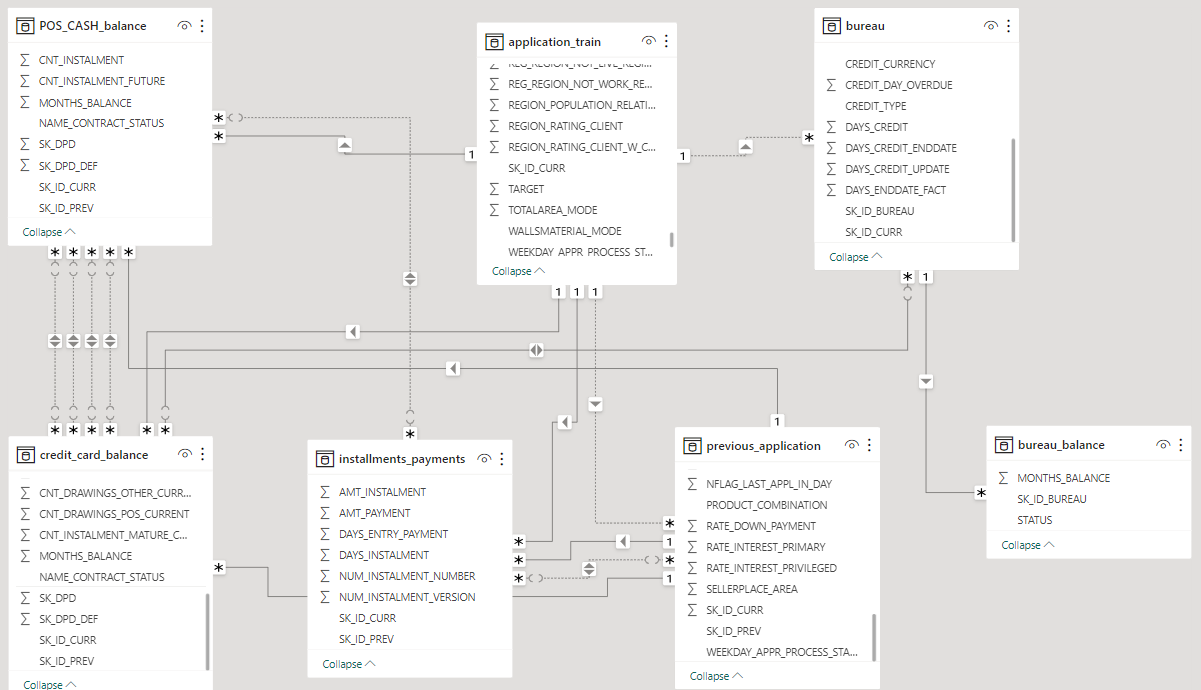



---


#**Project Solution Approach**


---



The project solution approach follows a standard Machine Learning project methodology described below:

* **Data Preparation** - The preparatory stage involves loading relevant libraries needed to perform analysis. If any packages are missing, they must be installed through the !pip package command. The process will be followed by loading the datasets. If there are more than one files, then all need to be imported before we can look at the feature types and number of rows/columns in each file.

* **Exploratory Data Analysis** - After data importing, we can investigate the data and answer questions like- What is the size of the data? How many features are present and how are they interlinked? What is the data quality, are there missing values? What are the different data types, are there many categorical features? Is the data imbalanced? And most importantly, are there any obvious patterns between the predictor and response features?

* **Feature Engineering** - After exploring the data distributions, we can conduct feature engineering to prepare the data for model training. This includes operations like replacing outliers, imputing missing values, one-hot encoding categorical variables, and rescaling the data. Since there are number of relational databases, we can use extract, transform, load (ETL) processes using automated feature Engineering with Featuretools to connect the datasets. The additional features from these datasets will help improve the results over the base case (logistic regression).

* **Model Building and Prediction**  - After the dataset is split into training and testing sets, we can correct the data imbalances by undersampling the majority class. Then, we can training the different classifier models (Logistic Regression, Random Forest, Decision Tree, Gaussian Naive Bayes, XGBoost, Gradient Boosting, LightGBM) and compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC. After choosing the best classifier, we can use K-fold cross validation to select the best model. This will help us choose parameters that correspond to the best performance without creating a separate validation dataset.

* **Hyperparameter Tuning** - The process is done after choosing the binary classifier. Hyperparameters are tuned for improving the model results through grid search, random search, and Bayesian optimization (Hypertopt library). The hyperparameter tuning process uses an objective function on the given domain space, and an optimization algorithm to give the results. The ROC AUC validation scores from all three methods for different iterations can be compared to see trends.




---


#**Findings**


---


The project compared different classifiers based on the generated features. The LightGBM classifier showed the best score for AUC ROC (0.781), hence was choosen as the best model.



---


#**Challenges**


---


The downside of Featuretools is that it isn’t generating features all that intelligently - it simply generates features by applying all the feature primitives to all the features in secondary datasets recursively. This means that the number of features which are generated can be huge! When dealing with large datasets, this means that the feature generation process might take up more memory than is available on a personal computer.

The project kept on crushing after exhausting machine memory. Literature recommends running featuretools on an Amazon Web Services EC2 instance which has enough memory in order to mitigate challenges from run out of memory.

**Other options are:**
* Upgrade to Colab Pro or if your computer itself has more RAM than the VM for Colab, you can connect to your local runtime instead.

* Colab Pro gives about twice as much memory than the free version. If that’s enough, and one is willing to pay $10 per month, that’s probably the easiest way.

* In order to use a local runtime, click the down arrow next to “Connect” in the top right, and choose “Connect to local runtime



---


# **References and Acknowledgements**


---


During the course of the project, authors consulted several sources amongst the ones listed below:

1. [Automated Feature Engineering with Featuretools](https://brendanhasz.github.io/2018/11/11/featuretools)

2. [Featuretools documentation](https://docs.featuretools.com/en/v0.17.0/variables.html)

3. [Introduction To Featuretools: A Python Framework For Automated Feature Engineering](https://analyticsindiamag.com/introduction-to-featuretools-a-python-framework-for-automated-feature-engineering/)

4. [Home credit default risk recognition](https://github.com/abhishekdbihani/Home-Credit-Default-Risk-Recognition/blob/master/Abhishek%20Capstone%20-%20Home%20Credit%20Risk%20v2.ipynb)

5. [Predict loan repayment](https://github.com/alteryx/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb)



---


# **1. Import Libraries**

In [ ]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/HomeLoanDef'

Mounted at /content/gdrive
/content/gdrive/My Drive/HomeLoanDef


In [ ]:
# Install Featuretools library version 0.23.2
"""
Featuretools is a powerful tool that can help to automate the process of feature engineering.
"""

!pip install featuretools==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from timeit import default_timer as timer
import os
import random
import csv
import json
import itertools
import pprint
import gc
import re

In [ ]:
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# import featuretools for automated feature engineering
import featuretools as ft
from featuretools import selection
from featuretools.primitives import make_trans_primitive
import featuretools.variable_types as vtypes


#Import sklearn helper metrics and transformations
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#import library for hyperparameter optimization
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.stochastic import sample

In [ ]:
# confirm version of futuretools
ft.__version__

'0.23.2'



---


# **2. Load Data**
* File containing main application data for each client
* File containing data of clients’ previous credits from financial institutions other than Home Credit
* File containing data about monthly balance about the credits
* File containing monthly data about cash loans or previous point of sale from previous loan data
* File containing data regarding previous credit card loans
* File having data of previous loan applications at Home Credit
* File containing data about payment history for Home Credit’s previous loans

In [ ]:
# load data from CSV files

df1 = pd.read_csv("application_train.csv")
df2 = pd.read_csv("bureau.csv")
df3 = pd.read_csv("bureau_balance.csv")
df4 = pd.read_csv("credit_card_balance.csv")
df5 = pd.read_csv("installments_payments.csv")
df6 = pd.read_csv("POS_CASH_balance.csv")
df7 = pd.read_csv("previous_application.csv")



---


# **3. Assessing the data**

This step involves visually and programmatically examining the data for data quality and tidiness issues.


In [ ]:
# looping through each dataframe and printing the data shape
dfs = [df1, df2, df3, df4, df5, df6, df7]
for df in dfs:
  print(df.shape)
  print('='*20)

(307511, 122)
(1716428, 17)
(27299925, 3)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(1670214, 37)


In [ ]:
# looping through each dataframe and printing the info
for df in dfs:
  print(df.info())
  print('='*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT

In [ ]:
# looping through each dataframe and printing head
for df in dfs:
  print(df.head())
  print('='*40)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [ ]:
# looping through each dataframe and printing summary statistics
for df in dfs:
  print(df.describe())
  print('='*20)

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [ ]:
# check info on the main loan application dataset
df1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            



---


* The application_train dataset consists of 307511 records, each record containing 122 (columns) features.

* 41 features are of data type integer, 65 float and 16 object datatypes.

* The (SK_ID_CURR) column serves as the primary key and TARGET is the outcome or response feature to be predicted.


---



In [ ]:
# Checking the % of count of unique values in each categorical column

cols_cat = df1.select_dtypes(['object'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(df1[i].value_counts(normalize = True))
    print('*'*40)

Unique values in NAME_CONTRACT_TYPE are :
Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
****************************************
Unique values in CODE_GENDER are :
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
****************************************
Unique values in FLAG_OWN_CAR are :
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64
****************************************
Unique values in FLAG_OWN_REALTY are :
Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64
****************************************
Unique values in NAME_TYPE_SUITE are :
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64
****************************************
Unique values in NAME_INCOME_TYPE are :
Working               

**Insights**

* 98% of house types developed by clients are blocks of flats, whilst specific housing and terraced houses constitute 0.98% and 0.79% respectively.

* 98.6% of loan applications are not Emmergency, whilst 1.4% are emmergency.

* Two major wall materials used for construction are panels and stone/brick, constituting 43.7% and 42.9% respectively.

* Other less prominent construction materials are block, wooden, mixed, monolithic and others.

* The borrowers fall under 28 different organization catogories with almost uniform spread.

In [ ]:
# check percentage of missing values
null_df = pd.DataFrame((df1.isnull().sum())*100/len(df1)).reset_index()
headings = ['index','perc_null']
null_df.columns=headings
null_df.head()

index  perc_null
0          SK_ID_CURR        0.0
1              TARGET        0.0
2  NAME_CONTRACT_TYPE        0.0
3         CODE_GENDER        0.0
4        FLAG_OWN_CAR        0.0

(0.0, 100.0)

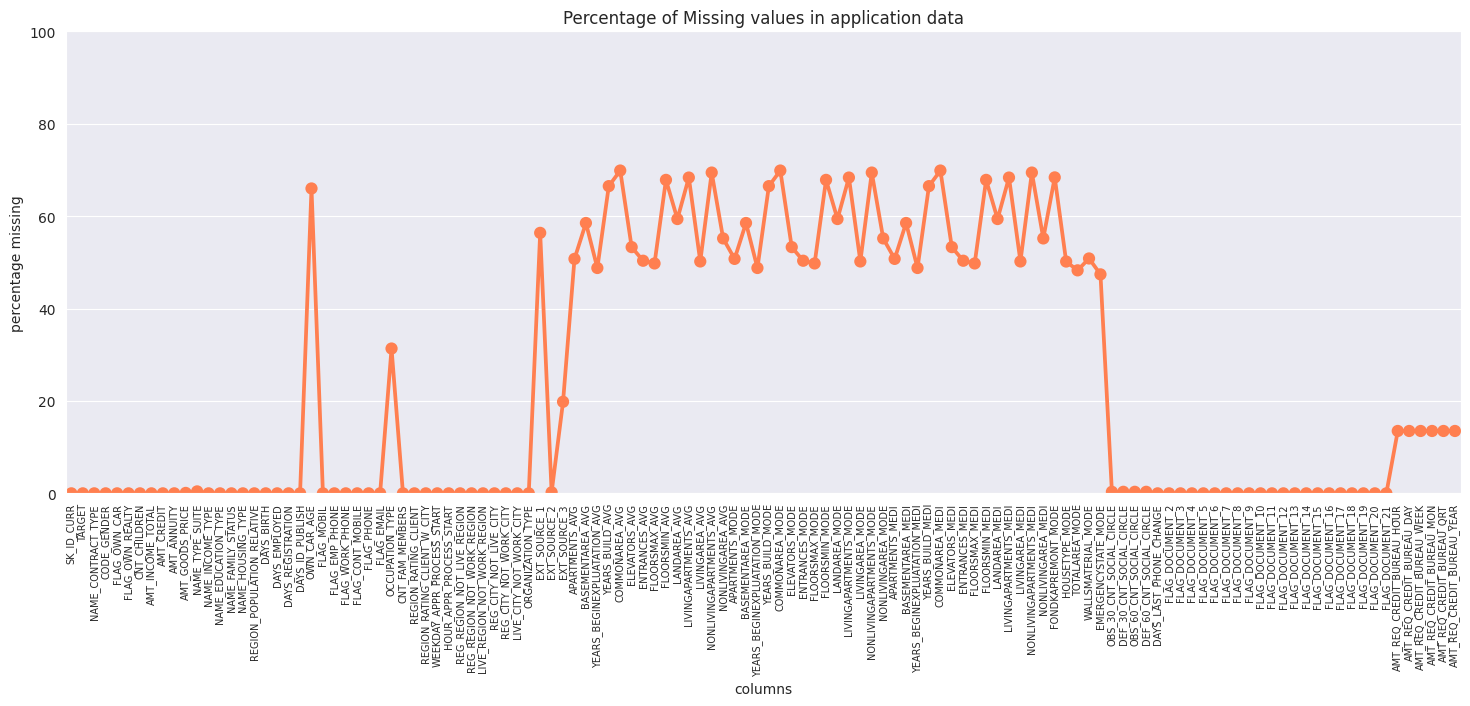

In [ ]:
# Plot Missing data in application (main) dataset

fig = plt.figure(figsize=(18,6))
sns.set_style('darkgrid')
ax = sns.pointplot(x="index",y='perc_null',data=null_df, color='coral')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("percentage missing")
plt.xlabel("columns")
plt.ylim((0,100))

<Figure size 1500x500 with 0 Axes>

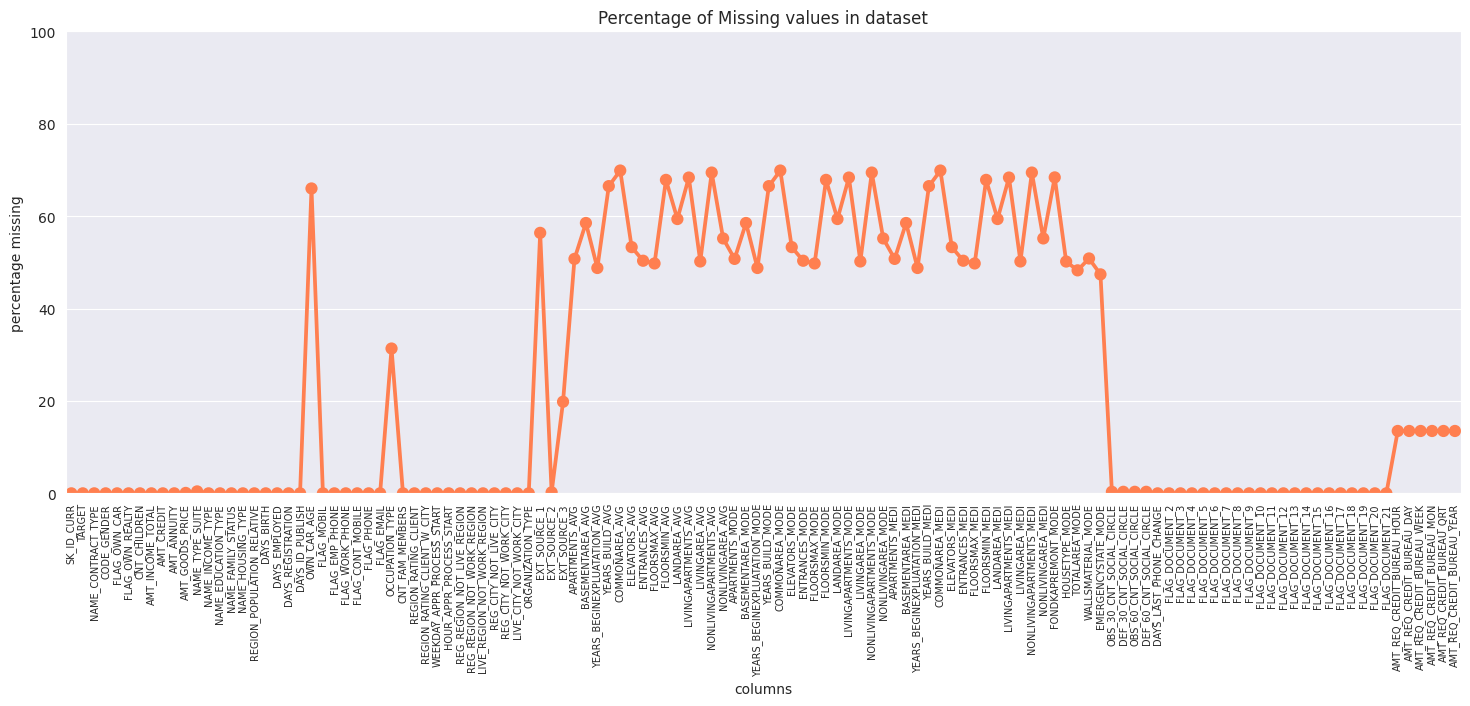

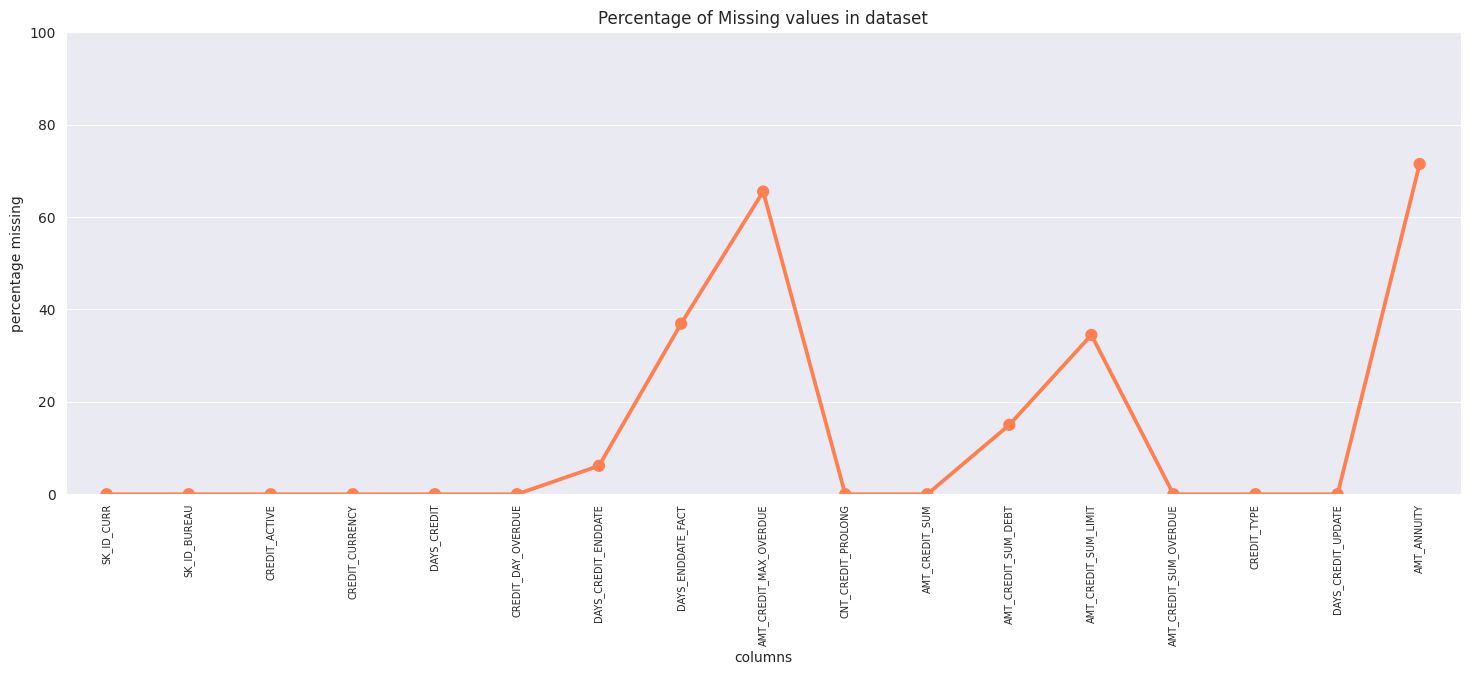

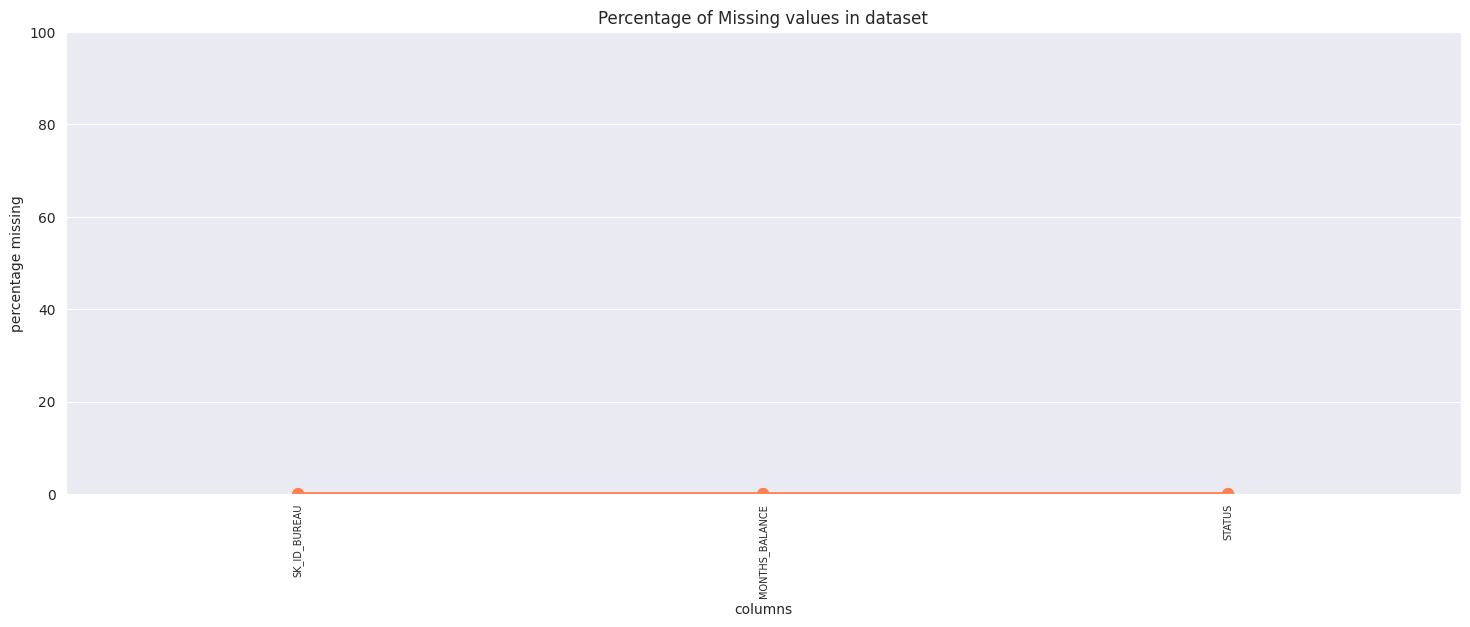

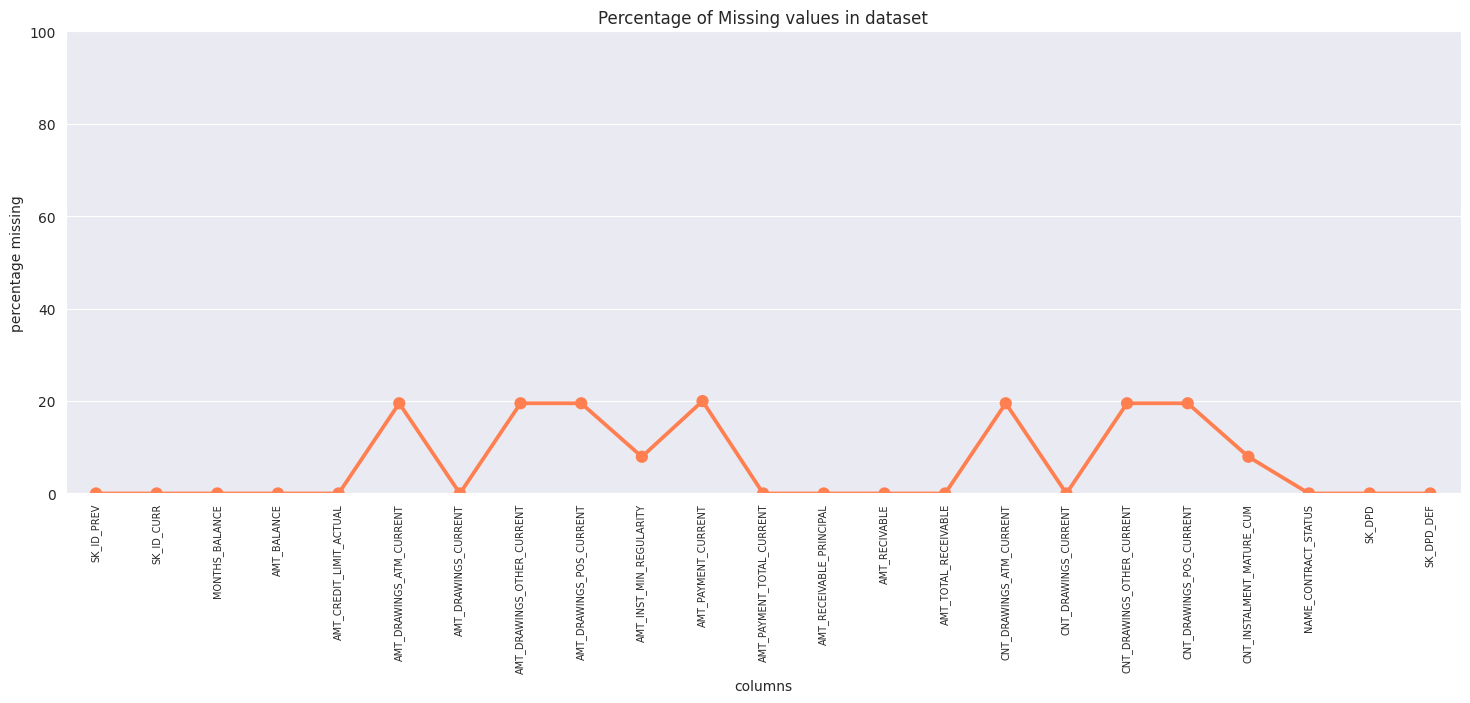

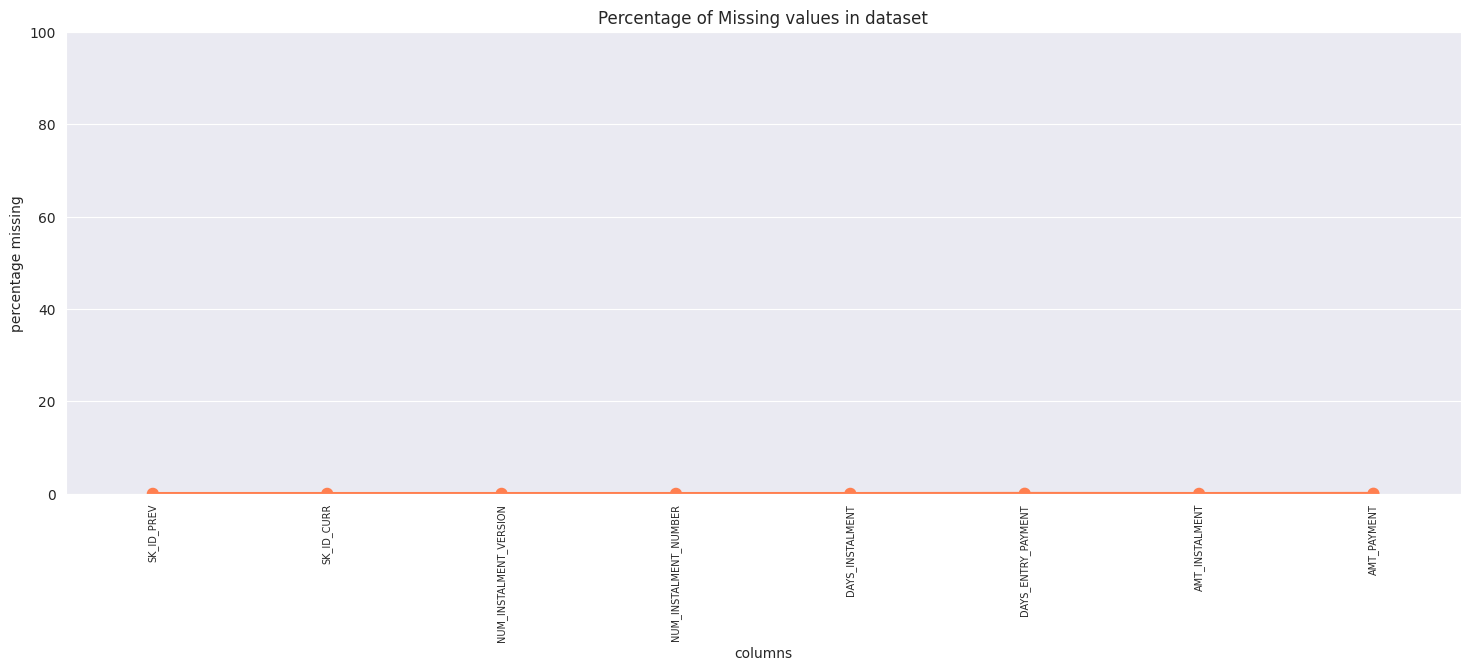

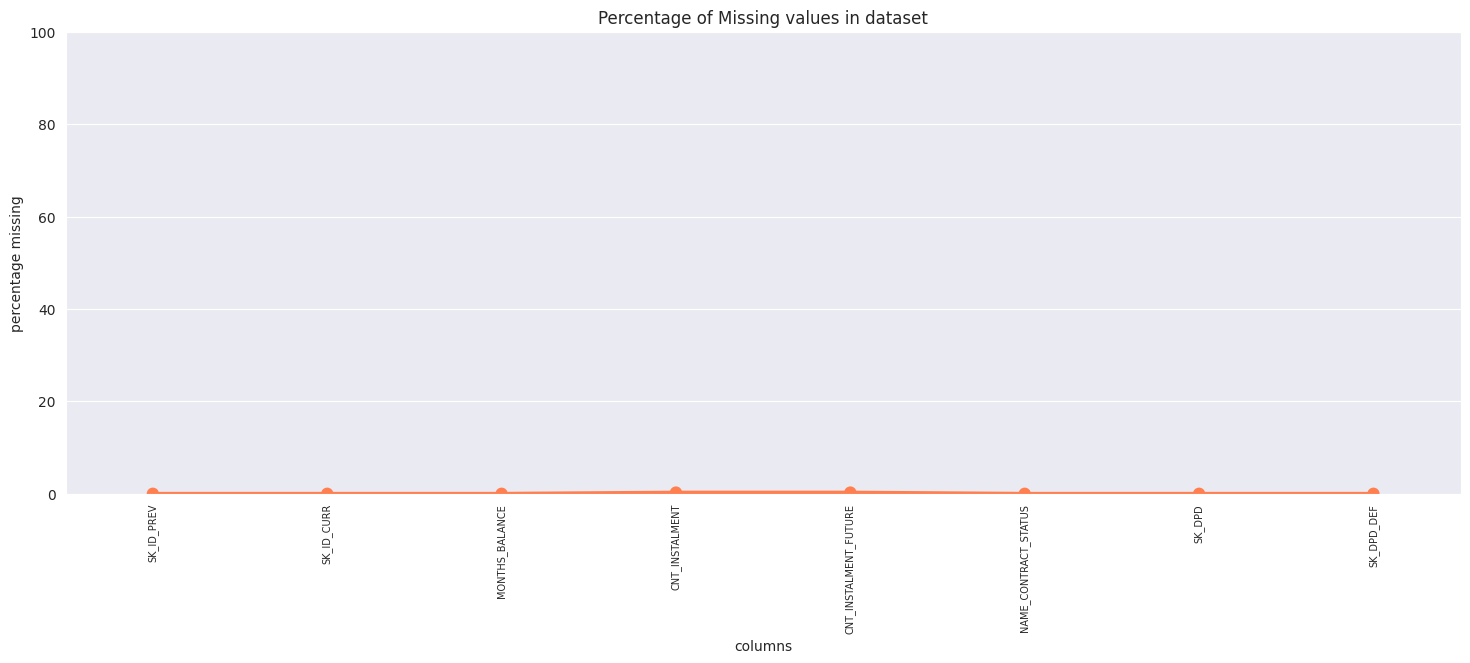

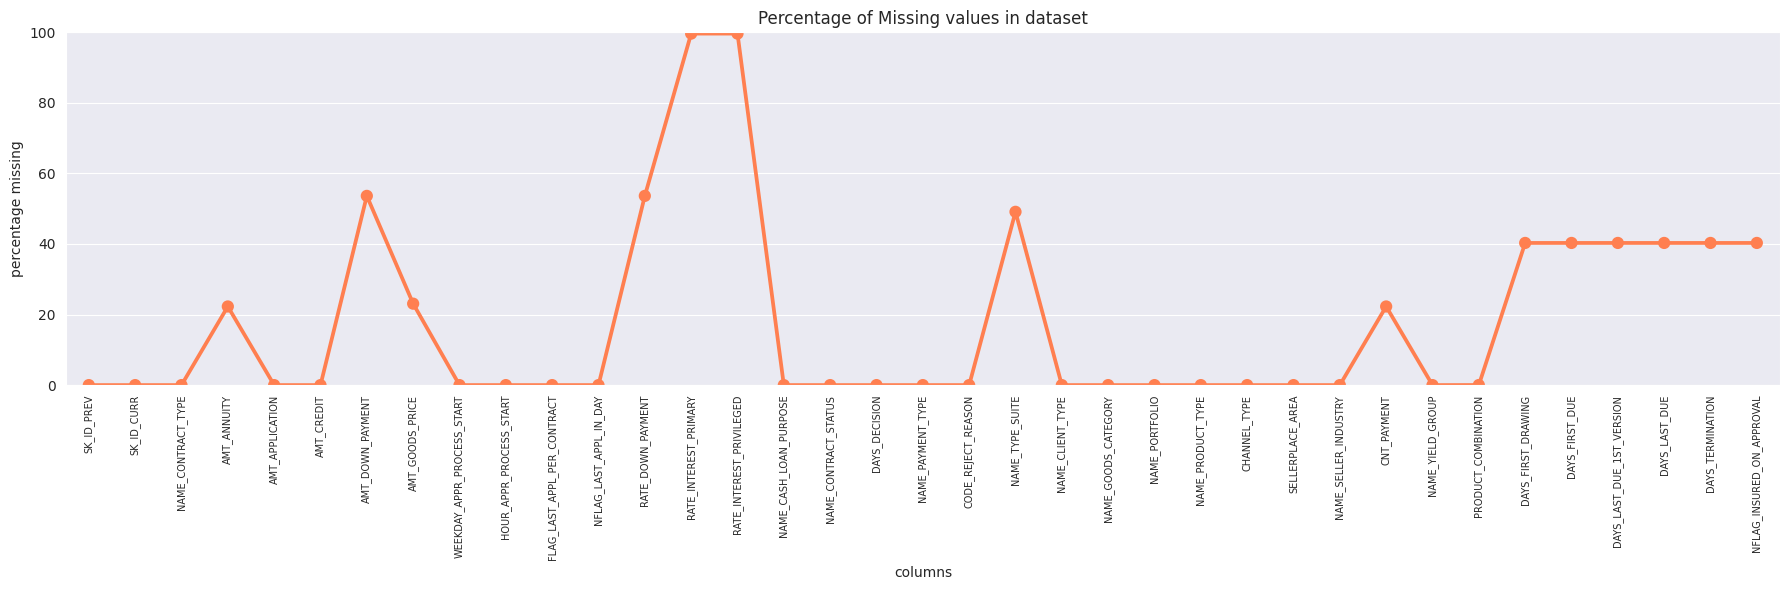

In [ ]:
# Point plot of missing values in each dataset
plt.figure(figsize=(15,5),facecolor='white')
plotnumber=+1

for df in dfs:
  null_df = pd.DataFrame((df.isnull().sum())*100/len(df)).reset_index()
  headings = ['index','perc_null']
  null_df.columns=headings

  # Plot Missing data in application (main) dataset
  fig = plt.figure(figsize=(18,6))
  sns.set_style('darkgrid')
  ax = sns.pointplot(x="index",y='perc_null',data=null_df, color='coral')
  plt.xticks(rotation =90,fontsize =7)
  plt.title("Percentage of Missing values in dataset")
  plt.ylabel("percentage missing")
  plt.xlabel("columns")
  plt.ylim((0,100))
  plotnumber+=1
plt.tight_layout()

### **Insights**
* There are a number of features with missing values almost 50%.

* We must apply methods of handling features with missing data - discard or fill missing values before training any model.

* Similar checks should be performed on the other datasets.

In [ ]:
print('='*100)

In [ ]:
# check shape of df2
df2.shape

(1716428, 17)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
# print all columns in a list
df2.columns.to_list()

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

In [ ]:
# check head for df2
df2.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [ ]:
# unique number of CREDIT_TYPE
df2.CREDIT_TYPE.nunique()

15

In [ ]:
# % count of the unique values by CREDIT_TYPE [value_counts: used to find the count of unique categories]
df2.CREDIT_TYPE.value_counts()* 100 / len(df2)

Consumer credit                                 72.919750
Credit card                                     23.432093
Car loan                                         1.613234
Mortgage                                         1.071469
Microloan                                        0.723188
Loan for business development                    0.115065
Another type of loan                             0.059251
Unknown type of loan                             0.032335
Loan for working capital replenishment           0.027324
Cash loan (non-earmarked)                        0.003263
Real estate loan                                 0.001573
Loan for the purchase of equipment               0.001107
Loan for purchase of shares (margin lending)     0.000233
Mobile operator loan                             0.000058
Interbank credit                                 0.000058
Name: CREDIT_TYPE, dtype: float64

**Insights**

* There are 14 different types known credit and one unknown type.
* Consumer credit is the largest type of credit applied for, accounting for 73%.
* The second largest type of credit being applied for is 23.4%.
* Car loan constitutes 1.6%, Mortgage - 1.1% and Microloan 0.72%.
* The rest of credit types are insignificant.

In [ ]:
# check percentage of missing values
df2.isnull().sum()* 100 / len(df2)

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

**Insights**

* 7 out of 17 columns contain null values.
* AMT_ANNUITY column contain the highest percentage of null values - 71.4%, followed by AMT_CREDIT_MAX_OVERDUE at 65.5%.
* DAYS_ENDDAE_FACT columns has 36.9% null values, which almost tallies with AMT_CREDIT_SUM_LIMIT at 34.4%, whilst AMT_CRWEDIT_SUM_DEBT consist of 15% null values.

In [ ]:
print('='*100)

In [ ]:
# check df3 info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
# Checking the percentage of missing values in the each column of df3.
(df3.isnull().sum()/df3.shape[0] * 100)

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [ ]:
# check head of df3
df3.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [ ]:
# check unique status
df3.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [ ]:
print('='*100)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
# check percentage of missing values
df4.isnull().sum()* 100 / len(df4)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_CURRENT           0.000000
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_CURRENT           0.000000
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
NAME_CONTRACT_STATUS           0.000000
SK_DPD                         0.000000
SK_DPD_DEF                     0.000000
dtype: float64

In [ ]:
# check unique values under NAME_CONTRACT_STATUS
df4.NAME_CONTRACT_STATUS.value_counts()

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
print('='*100)

In [ ]:
# check info
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
# check percentage of missing values
df5.isnull().sum()* 100 / len(df5)

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.021352
dtype: float64

In [ ]:
print('='*100)

In [ ]:
# check info
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
# check percentage of missing values
df6.isnull().sum()* 100 / len(df6)

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [ ]:
print('='*100)

In [ ]:
# check info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
# check percentage of missing values
df7.isnull().sum()* 100 / len(df7)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
# Checking the count of unique values in each categorical column

cols_cat = df7.select_dtypes(['object'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(df7[i].value_counts(normalize = True))
    print('*'*40)

Unique values in NAME_CONTRACT_TYPE are :
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64
****************************************
Unique values in WEEKDAY_APPR_PROCESS_START are :
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
****************************************
Unique values in FLAG_LAST_APPL_PER_CONTRACT are :
Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
****************************************
Unique values in NAME_CASH_LOAN_PURPOSE are :
XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car            

In [ ]:
print('='*100)



---


# **5. Data Cleaning**

After assessing the data, some data quality issues were observed in the dataset and the steps below outline the cleaning process.

* renaming columns
* removing column names from the dataset that are deemed unnecessary for the analysis
* converting data types



---


# **6. Exploratory Data Analysis**

The EDA involved employing a range of techniques such as data visualization and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

## **6.1 Univariate Analysis**

### **6.1.1 Univariate Analysis - Numerical Data**

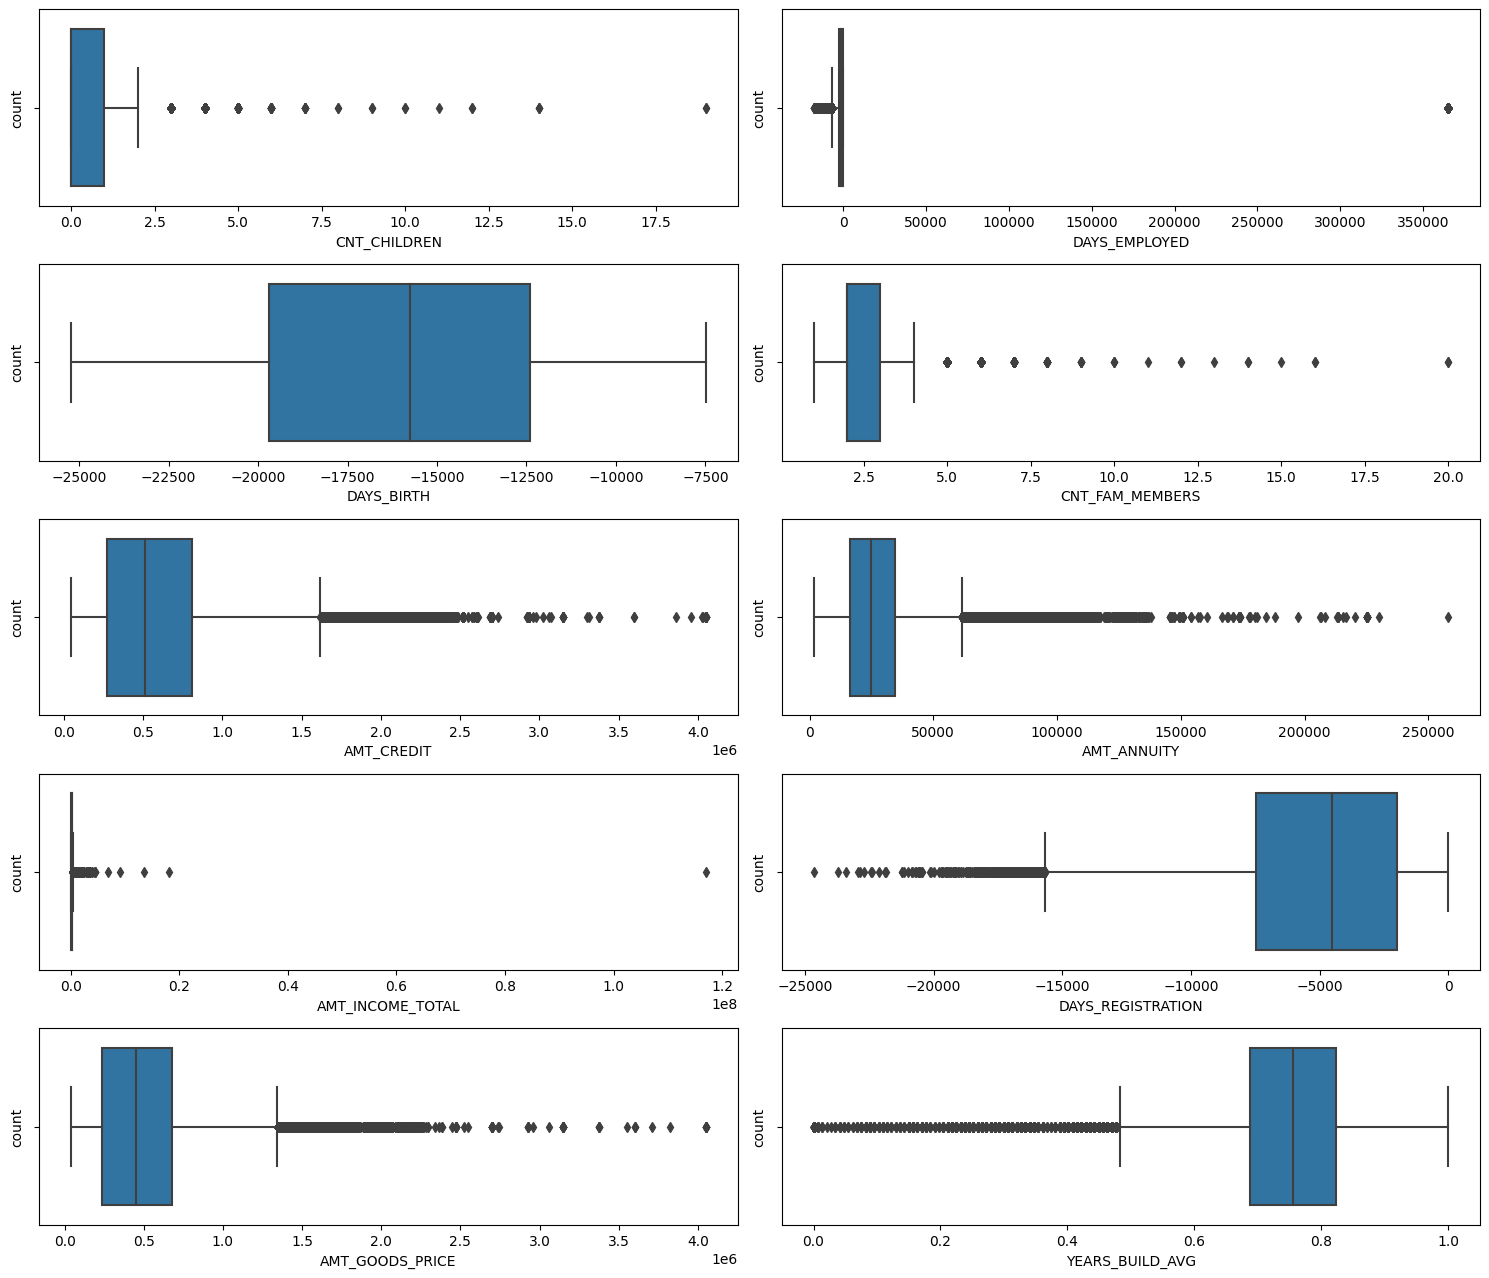

In [ ]:
# plot box plots for selected numerical columns (num_vars)
num_vars = ['CNT_CHILDREN', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL',
            'DAYS_REGISTRATION', 'AMT_GOODS_PRICE', 'YEARS_BUILD_AVG']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=+1
for column in num_vars:
  if plotnumber<18:
    ax=plt.subplot(6,2,plotnumber)
    sns.boxplot(x=df1[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber+=1
plt.tight_layout()


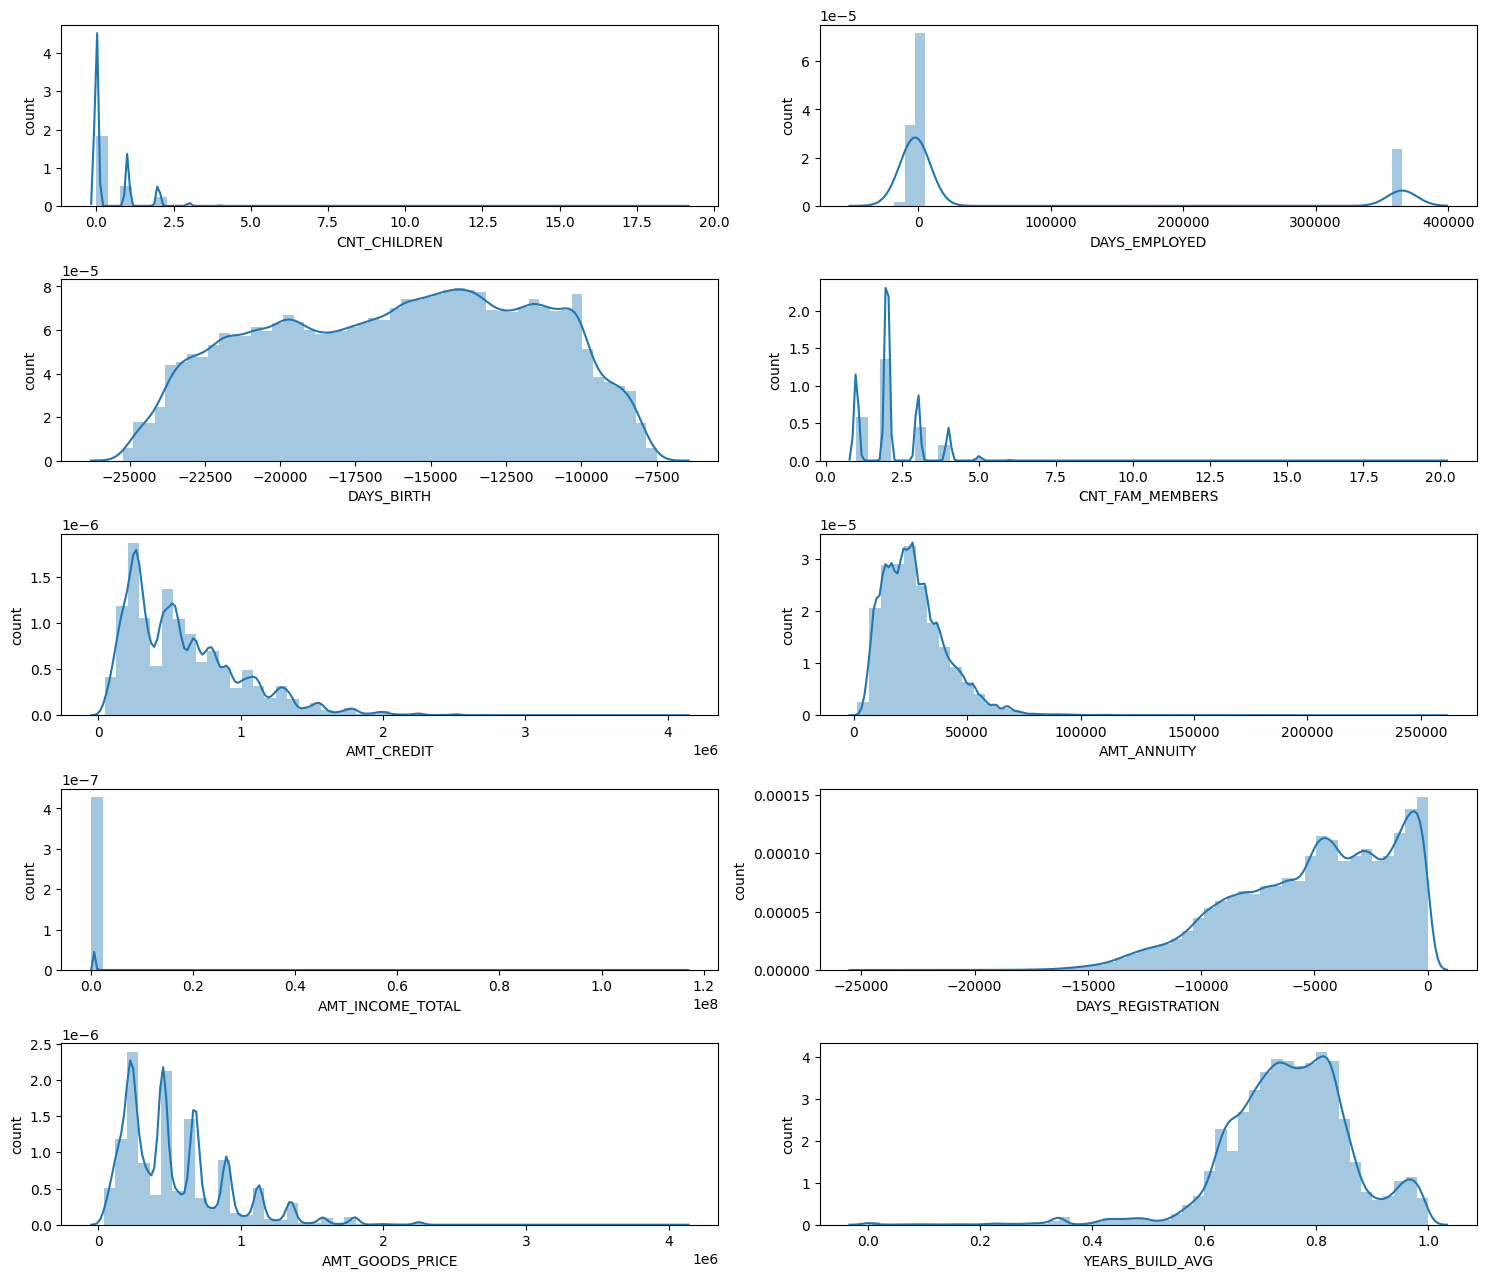

In [ ]:
# plot distribution plots for selected numerical columns (num_vars)
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=+1
for column in num_vars:
  if plotnumber<18:
    ax=plt.subplot(6,2,plotnumber)
    sns.distplot(x=df1[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber+=1
plt.tight_layout()


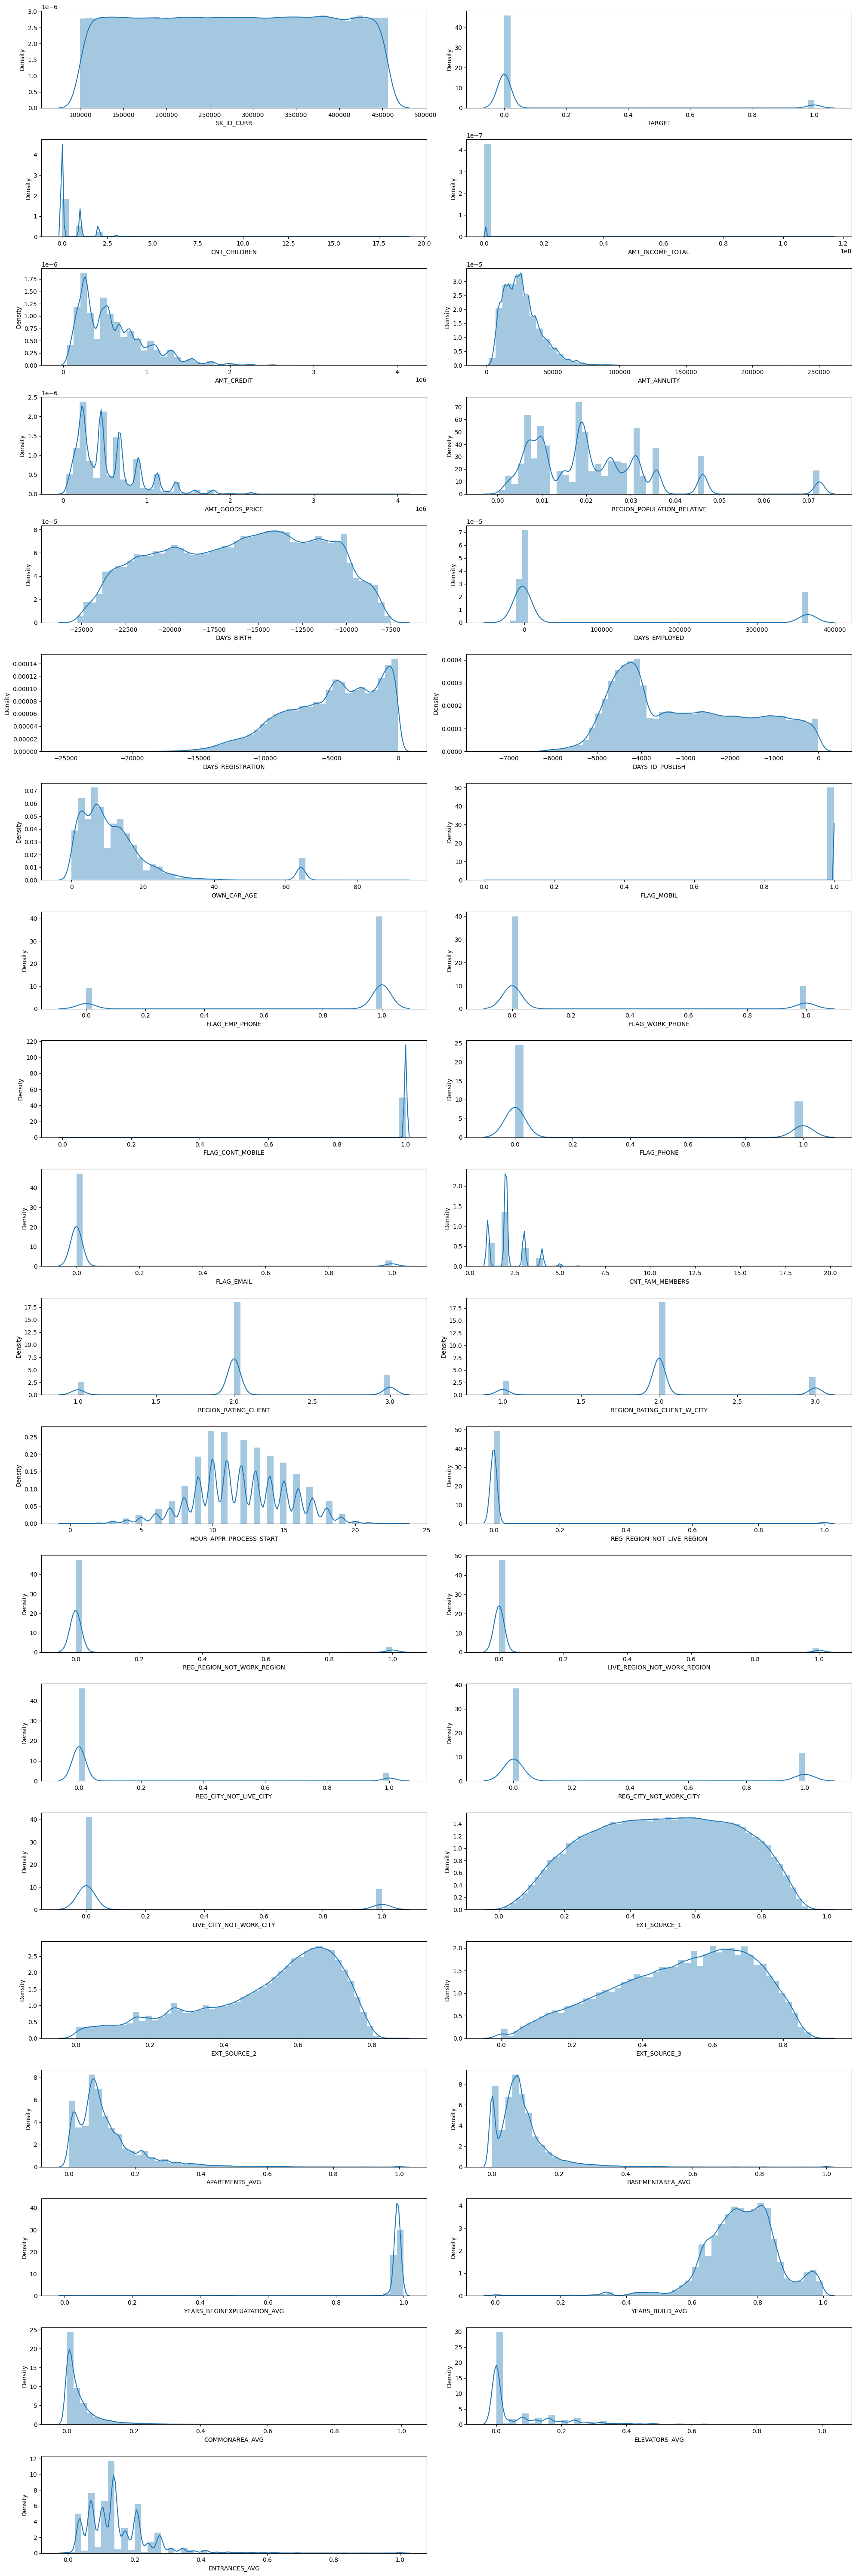

In [ ]:
# create new df based on numerical variables (float and int data type),
cvar_df1 = df1.select_dtypes(include=['float64','int64'])
cvar_df1

# plot distribution plots for selected numerical columnc (num_vars)
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=+1
for column in cvar_df1:
  if plotnumber<40:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=df1[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Density',fontsize=10)
  plotnumber+=1
plt.tight_layout()



---


# Analyze the loan defaults - TARGET


In [ ]:
# check unique values of TARGET
df1.TARGET.nunique()

2

In [ ]:
# count the unique numbers by TARGET [value_counts: used to find the count of unique categories]
df1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

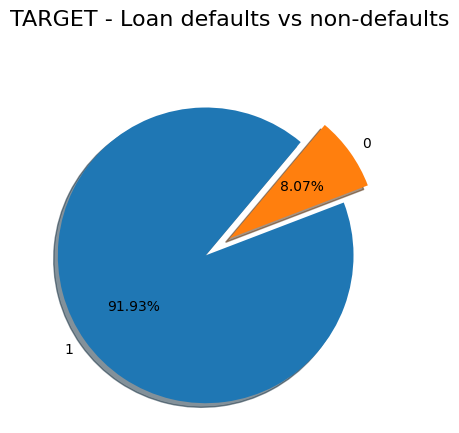

In [ ]:
# pie chart of the Target
expl = (0.2,0)
labels = df1.TARGET.unique()

plt.pie(
    x=df1.TARGET.value_counts(),
    labels=labels,
    autopct='%1.2f%%',
    startangle=50,
    shadow=True,
    # Add space around only one slice
    explode=expl
)

# Add Title
plt.title(
    label='TARGET - Loan defaults vs non-defaults',
    fontdict={"fontsize":16},
    pad=20
)
plt.show()

**Insights**

8% of client are defaulted. 92% of them are non_defaulted.

---


# Analyze the contracts - NAME_CONTRACT_TYPE


In [ ]:
# count the unique numbers by NAME_CONTRACT_TYPE [value_counts: used to find the count of unique categories]
df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

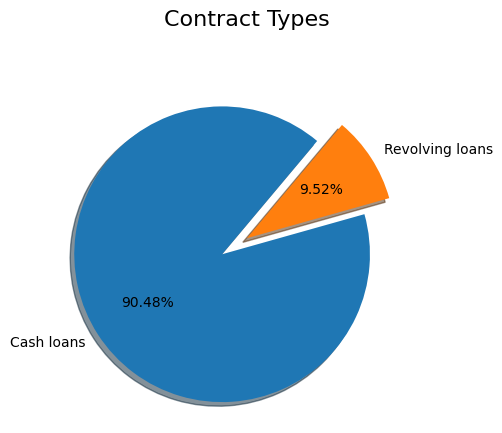

In [ ]:
# pie chart of the contract types
expl = (0.2,0)
labels = df1.NAME_CONTRACT_TYPE.unique()

plt.pie(
    x=df1.NAME_CONTRACT_TYPE.value_counts(),
    labels=labels,
    autopct='%1.2f%%',
    startangle=50,
    shadow=True,
    # Add space around only one slice
    explode=expl
)

# Add Title
plt.title(
    label='Contract Types',
    fontdict={"fontsize":16},
    pad=20
)
plt.show()

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

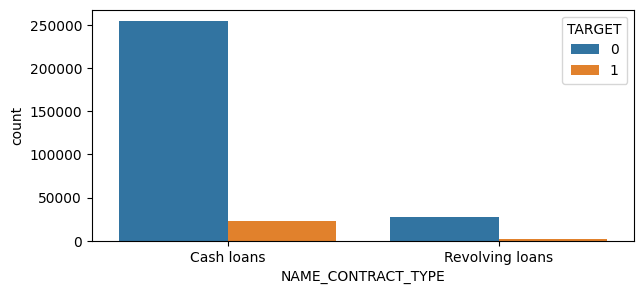

In [ ]:
# contract type by defaulters and non_defaulters
plt.figure(figsize=(7,3))
sns.countplot(data=df1,x='NAME_CONTRACT_TYPE',hue='TARGET')

<Axes: xlabel='TARGET', ylabel='count'>

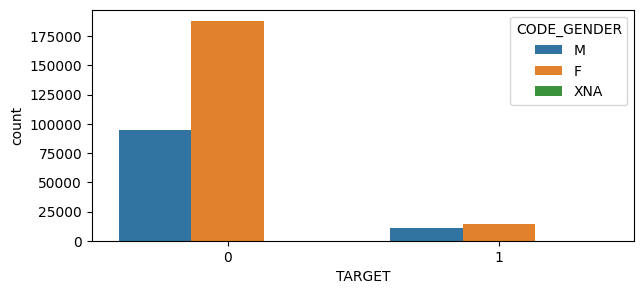

In [ ]:
# plot of TARGET by CODE_GENDER
plt.figure(figsize=(7,3))
sns.countplot(data=df1,x='TARGET',hue='CODE_GENDER')

In [ ]:
# seperate defaulters dataset
defaulters = df1[df1.TARGET == 1]
defaulters.shape

(24825, 122)

In [ ]:
# seperate non-defaulters dataset
non_defaulters = df1[df1.TARGET == 0]
non_defaulters.shape

(282686, 122)

**Insights**
* The dataset is imbalanced in favor of non-defaulters (TARGET = 1).

* The ratio of non-defaulters against defaulters exceeds 10:1.

* For further analysis, We'll need to resample the data by undersampling the majority class to make the data more balanced. This helps us not to lose too much valuable data.

* We'll keep the number of majority class samples as twice the number of the minority class.


---



### **6.1.2 Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 9) # annotate the percentage

    plt.show() # show the plot

<Figure size 1500x1000 with 0 Axes>

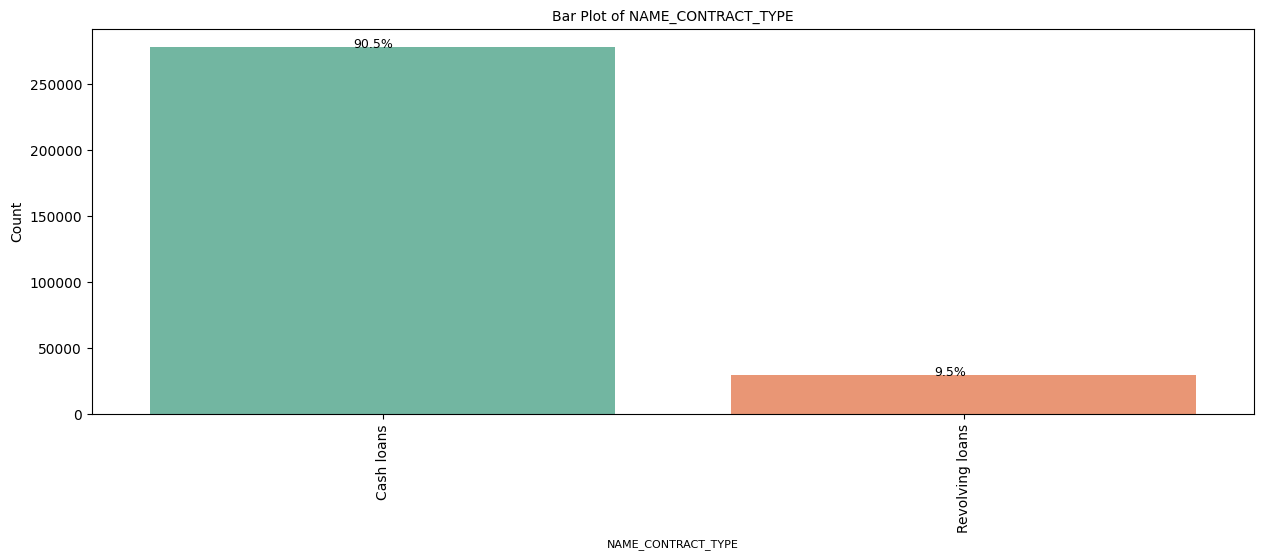

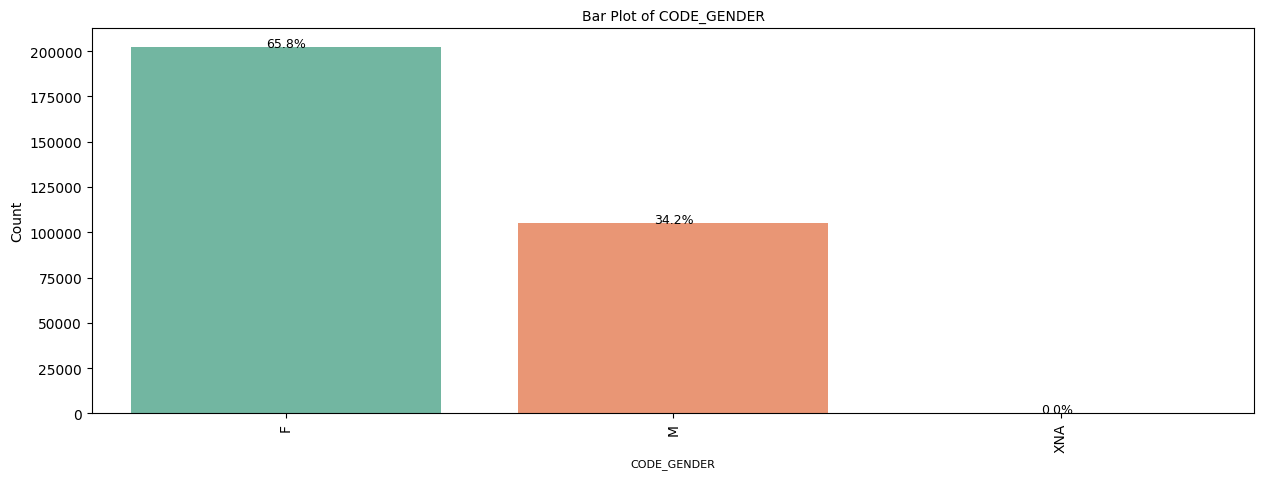

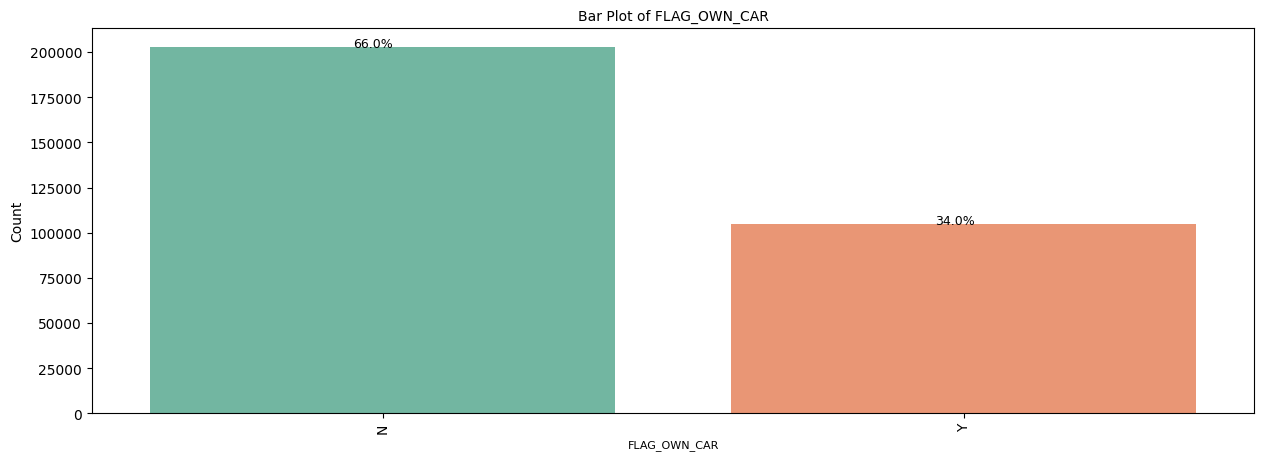

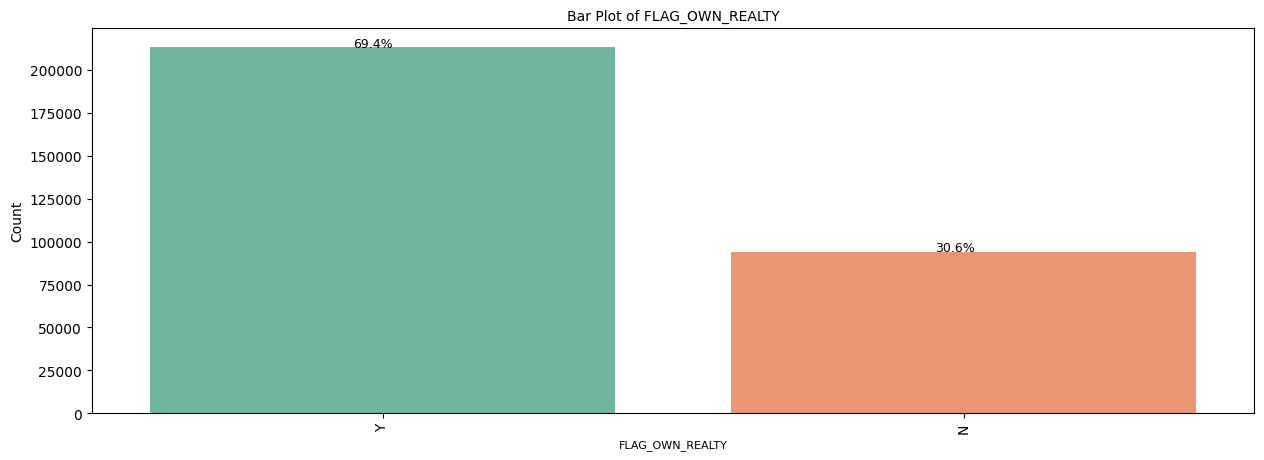

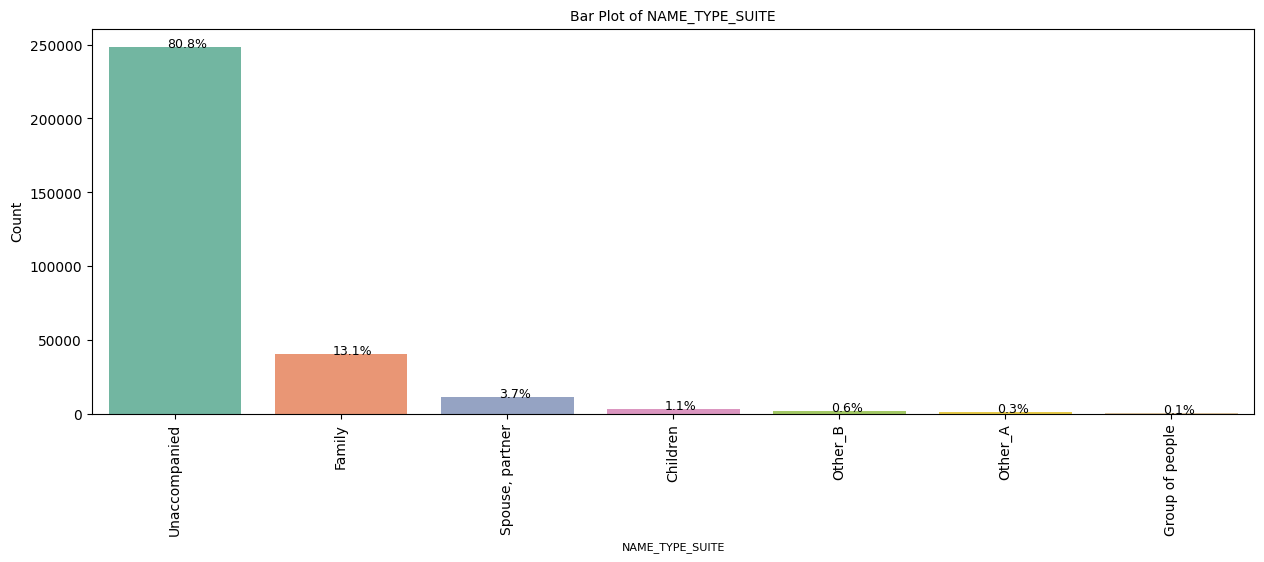

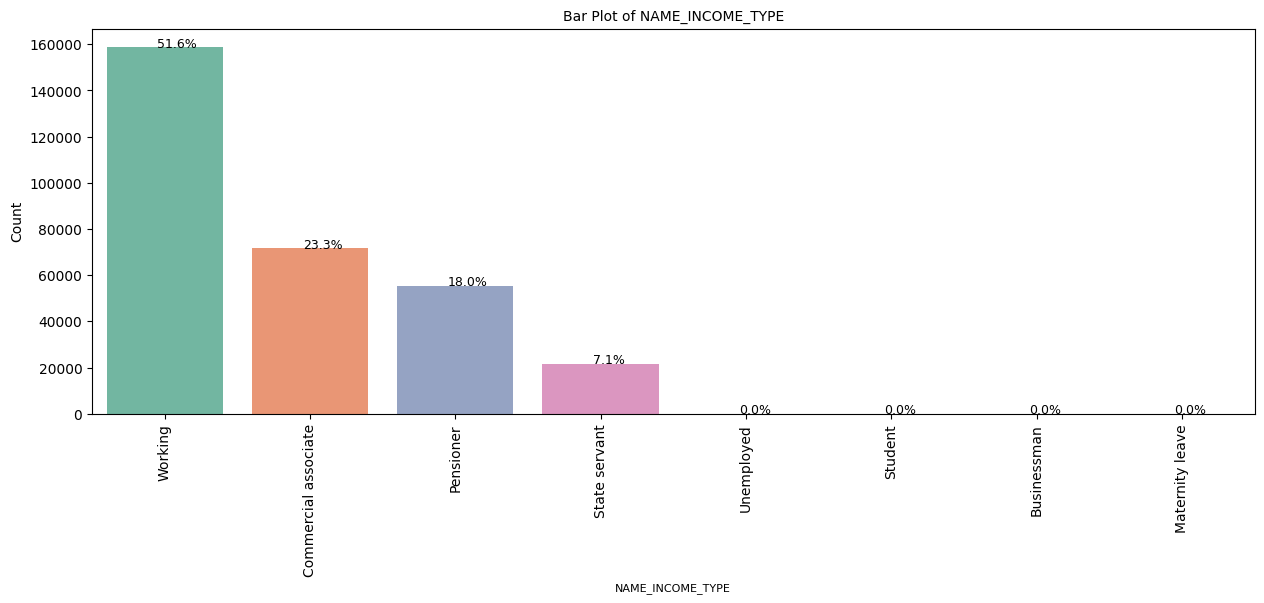

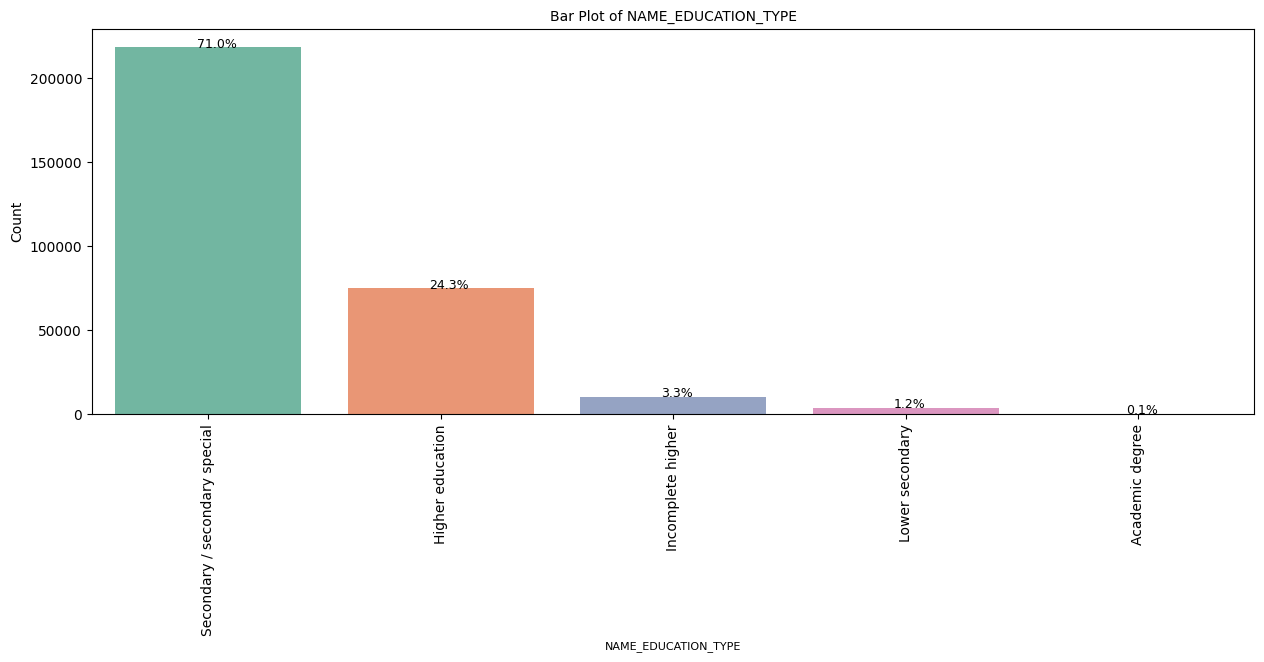

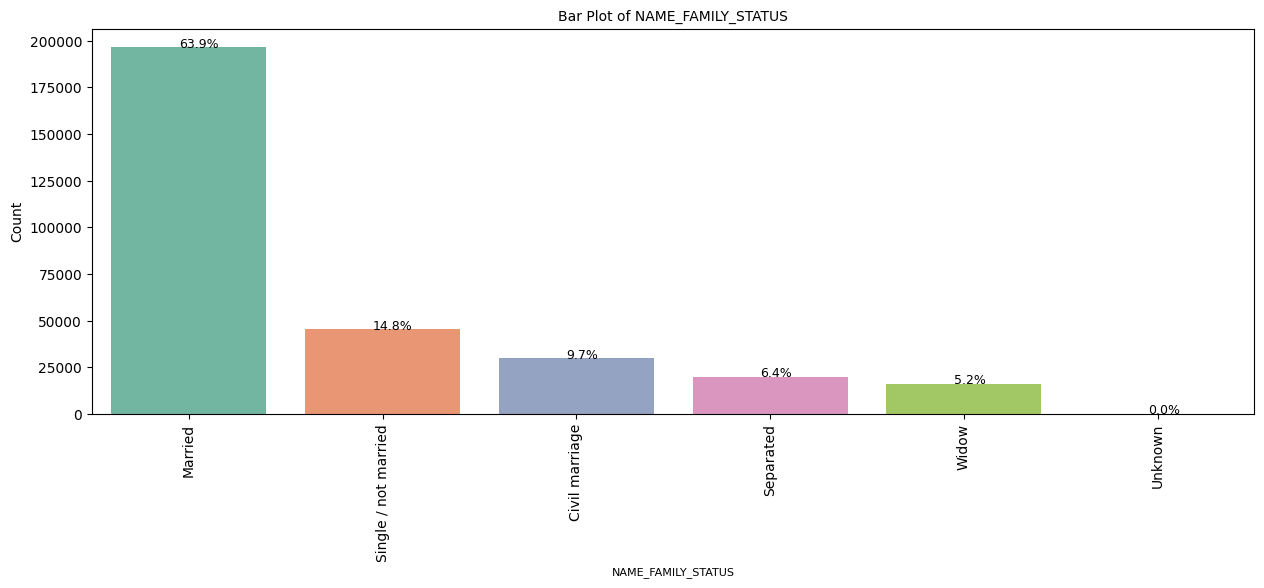

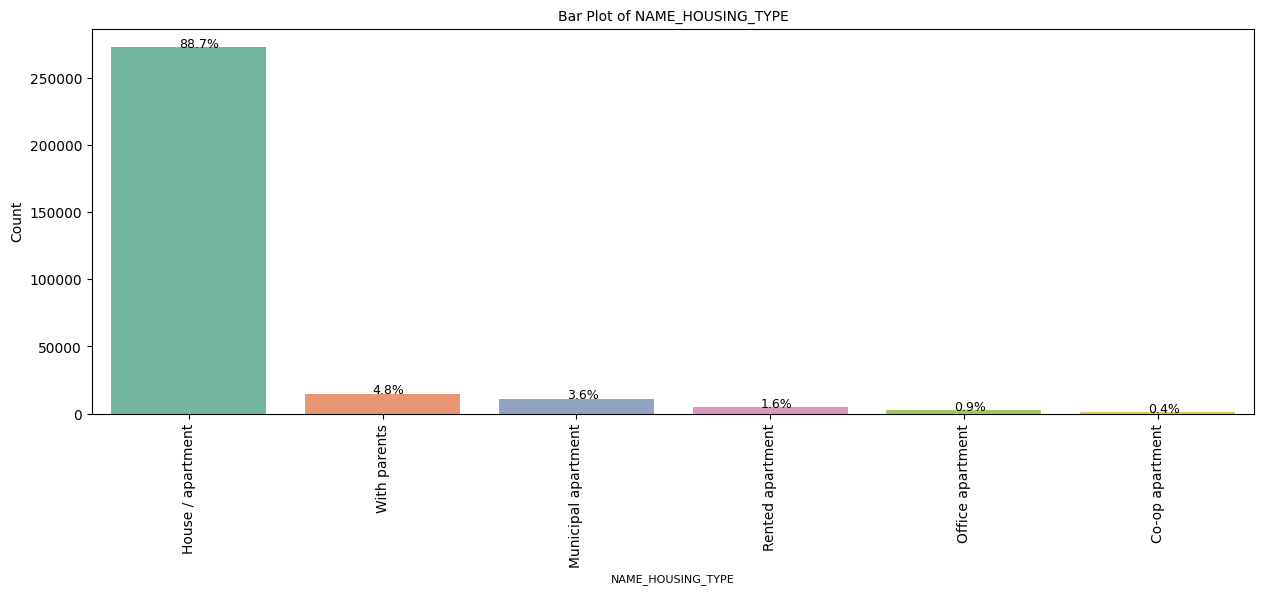

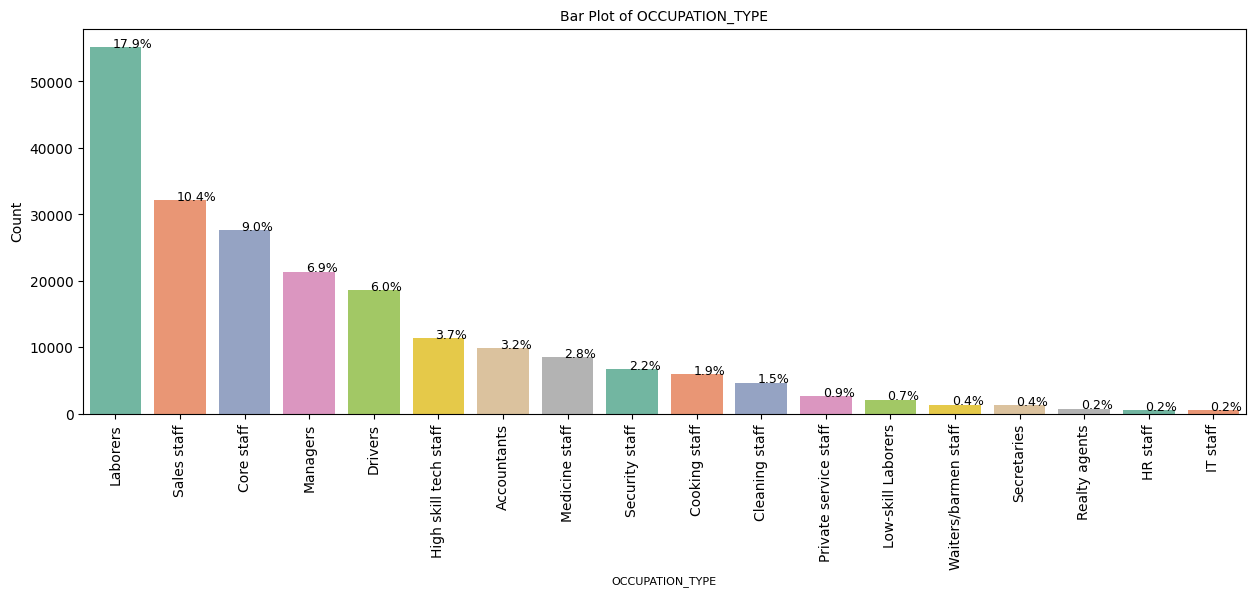

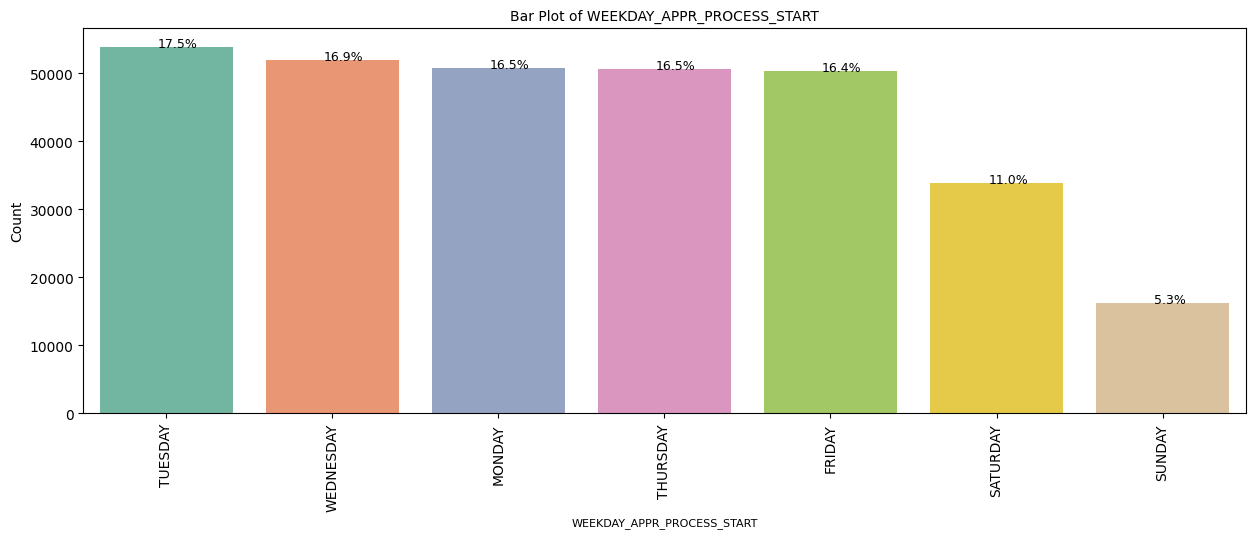

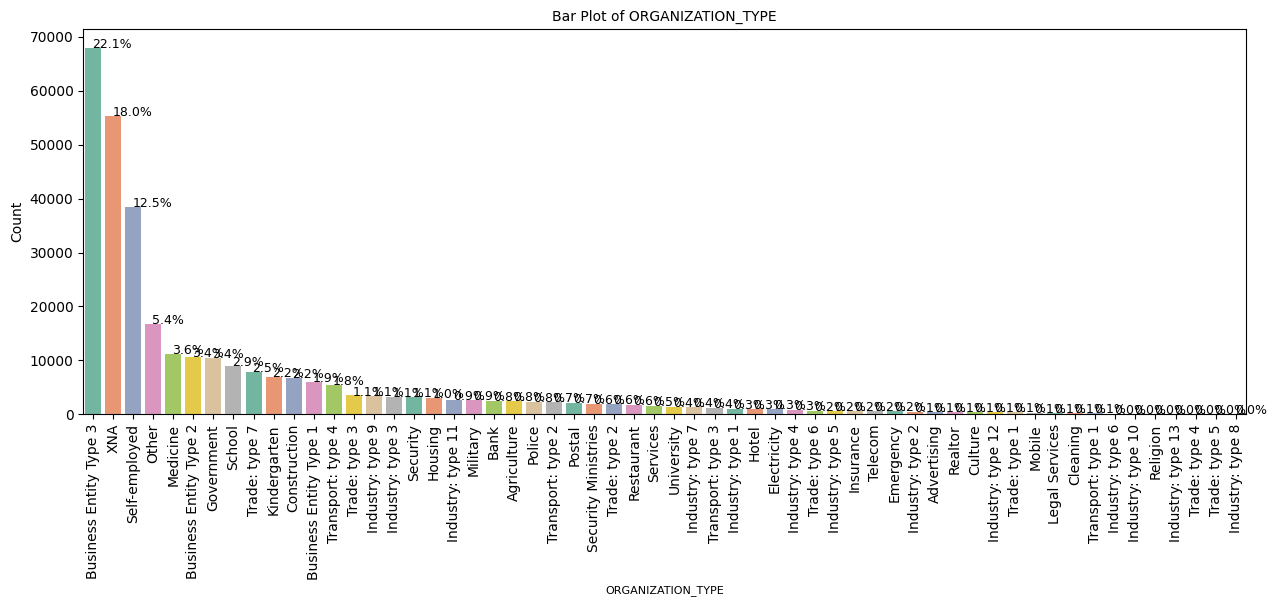

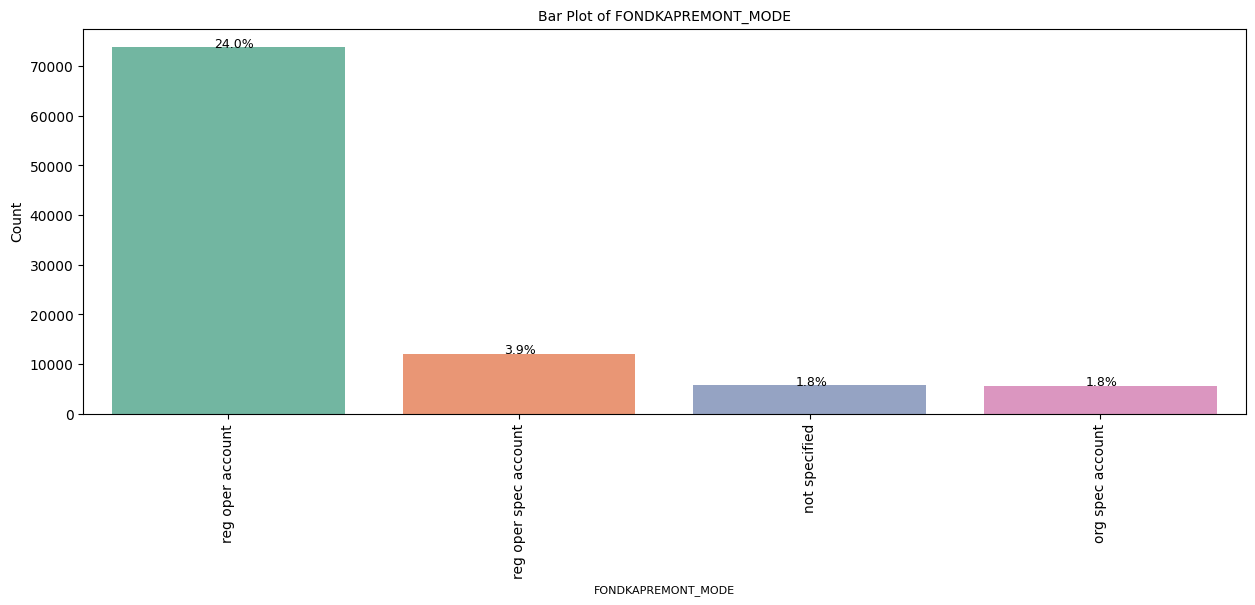

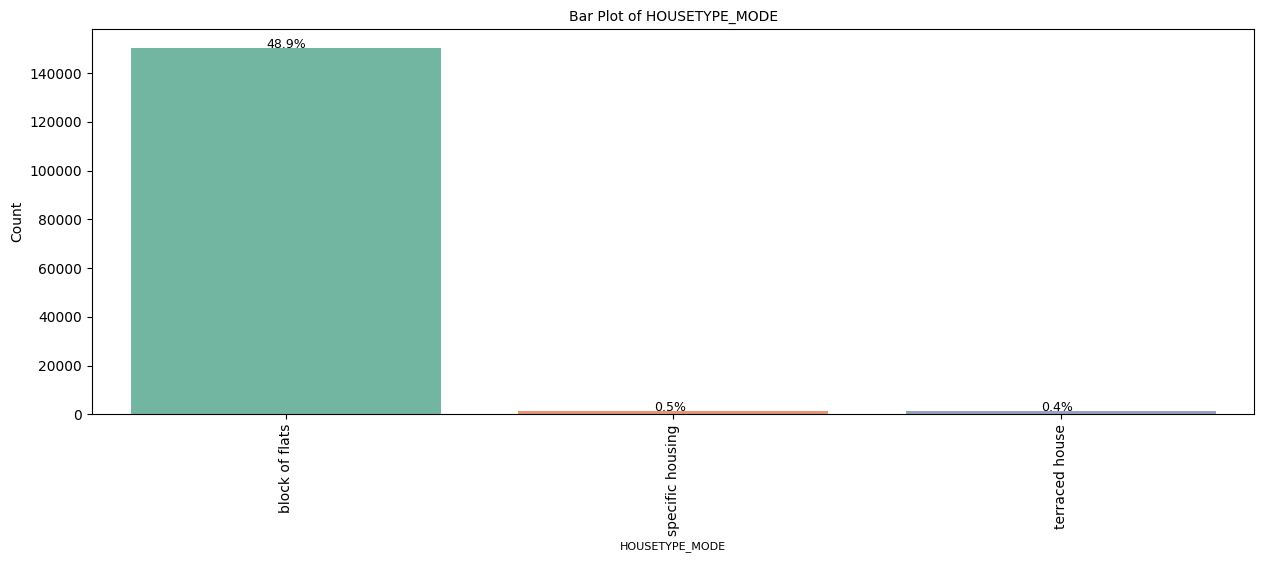

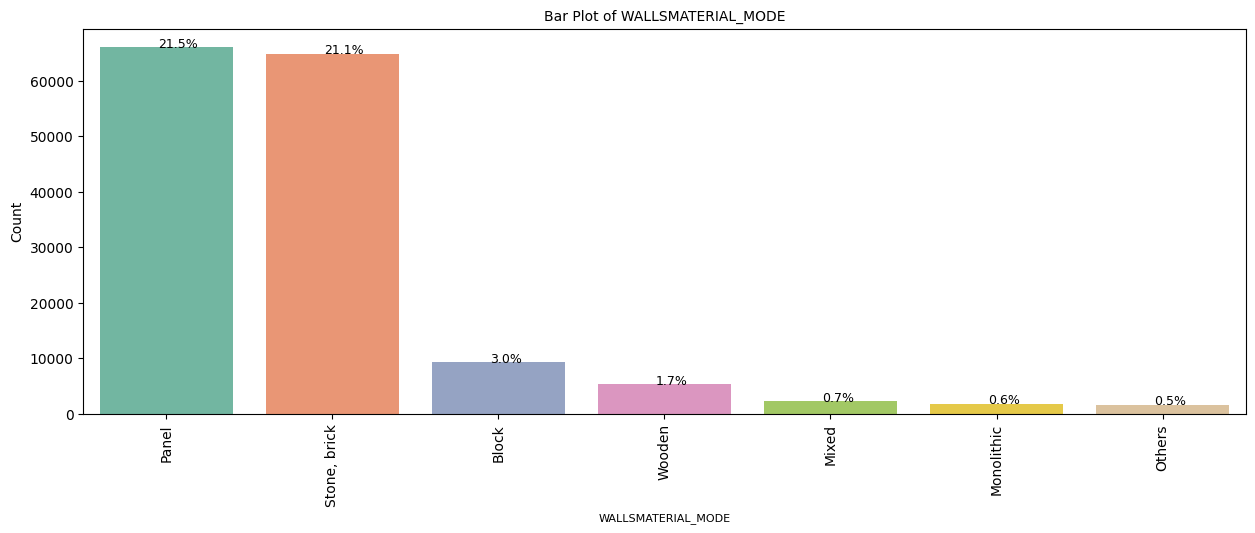

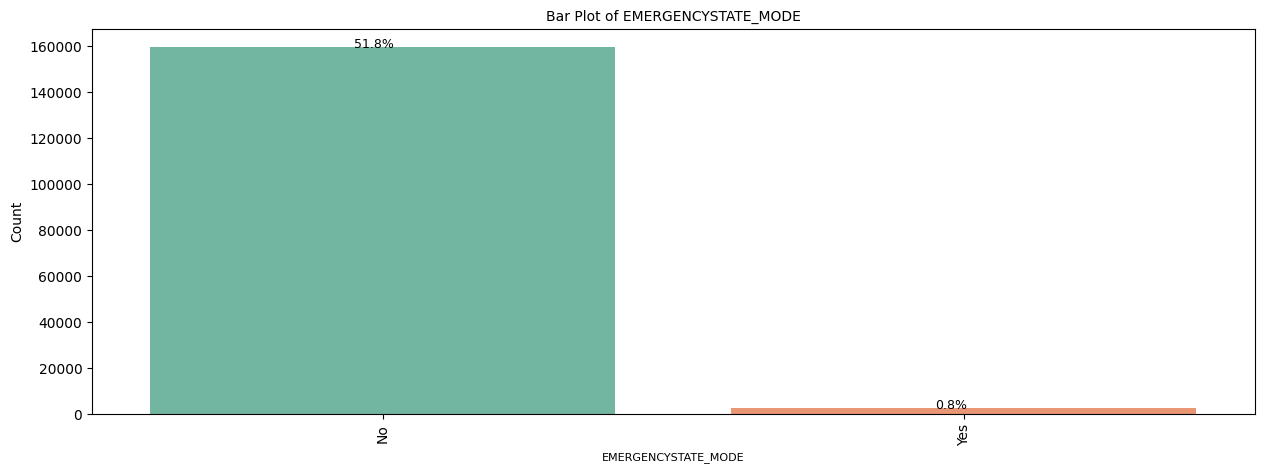

<Figure size 640x480 with 0 Axes>

In [ ]:
# create a bar plot for if column is categorical (object type),
cat_df=df1.select_dtypes(include=['object'])
cat_df

plt.figure(figsize=(15,10),facecolor='white')
plotnumber=+1

for column in cat_df.columns:
  plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
  ax=sns.countplot(x=cat_df[column], data=cat_df, palette='Set2', order=cat_df[column].value_counts().index)
  plt.xlabel(column,fontsize=8)
  plt.ylabel('Count',fontsize=10)
  plt.title(f'Bar Plot of {column}',fontsize=10)
  plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
  plotnumber+=1
  perc_on_bar(ax,cat_df[column])
plt.tight_layout()

### **Insights**

* 90.5% are cash loans whilst the remaining 9.5 are revolving.

* 65.8% of borowers are female and 34.2% are male.

* Only 34% of flagged borowers own car whilst 66% do not.

* 69.4% of flagged borrowers own realty whilst 30.6% do not.

* 80.8% of NAME_TYPE_SUITE are unaccompanied, followed by Family and Spouse partner with 13.1% and 3.7% respectively. The rest constitute insignificant weights.

* Most of the borrowers' income come from Working, commercial associate, pension, and state servant with 51.6%, 23.3%, 18%,and 7.1% respectively.

* 71% of borrowers have Secondary/ Secondary special education, followed by Higher education at 24.3%, Incomplete higher at 3.3%, whilst the other two are insignificant.

* 63.9% of borrowers are married, 14.8% are single/ not married, 9.7% Civil marriage, 6.4% separated and 5.2% widow.

* House/ appartment constitute 88.7% of House Types among the borrowers.

* Laborers are the largest borrowers at 17.9%, followed by Sales staff at 10.4% and Core staff at 9.0% whilst the rest have low percenytages.

* Three prominent Organization Types among borrowers are Business entity type 3 at 22.1%, XNA at 18% and Self employed 12.5%.

* Most borrowers build Blocks of Flats.

## **6.2 Bivariate Analysis**

### **6.2.1 Bivariate Analysis: Continuous and Categorical Variables**
Analyze TARGET vs AMT_CREDIT, AMT_ANNUITY, AMT_INCOME_TOTAL, AMT_GOODS_PRICE

<Figure size 1500x500 with 0 Axes>

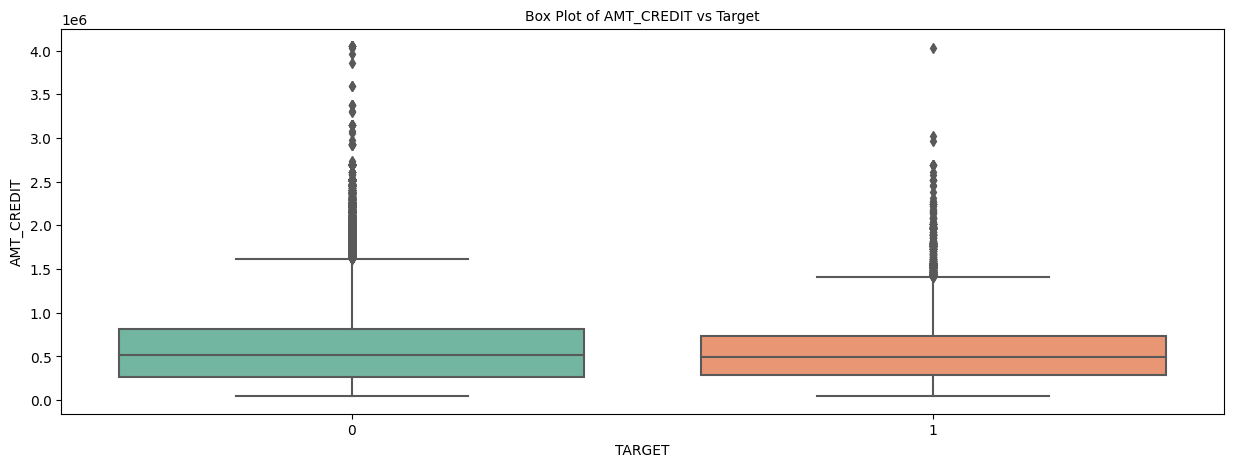

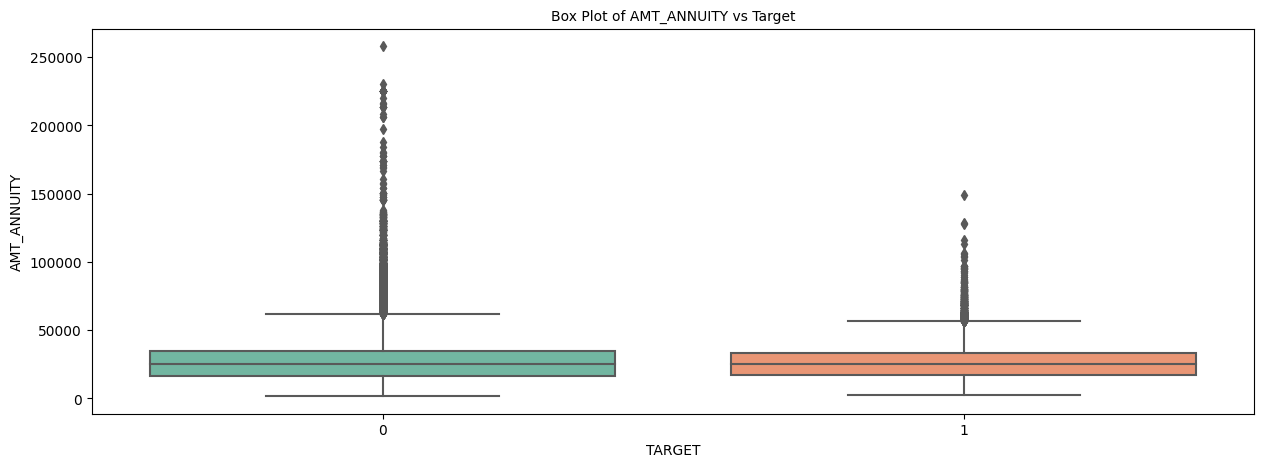

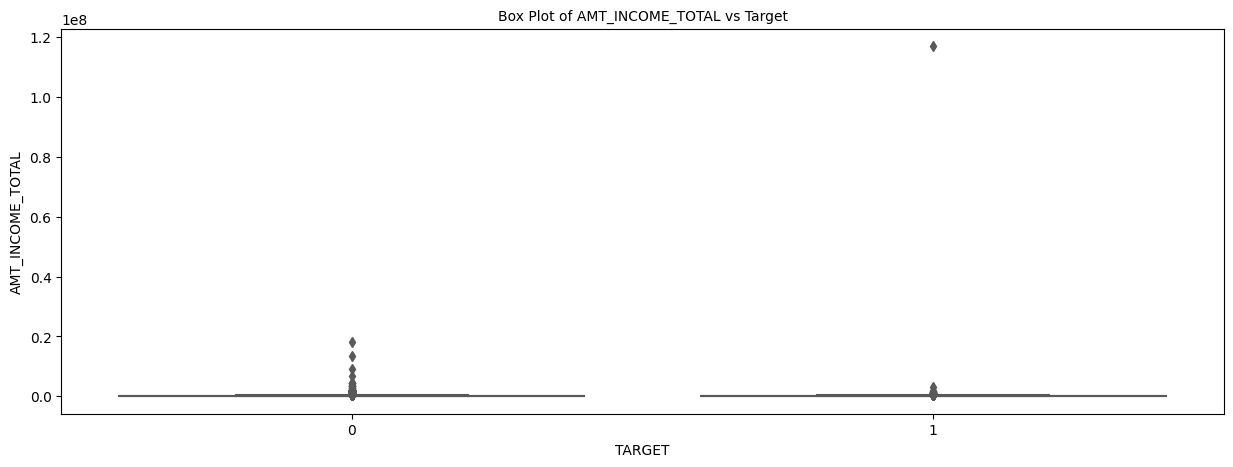

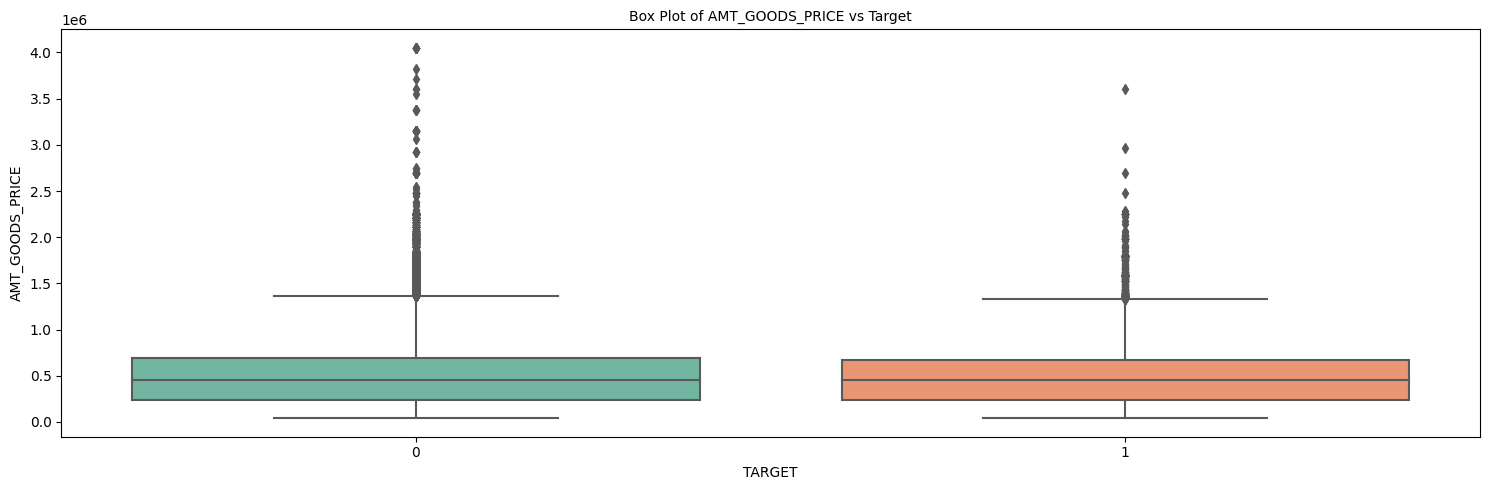

In [ ]:
# create a box plot for Target vs select continuous variables,
cont_vars = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']

plt.figure(figsize=(15,5),facecolor='white')
plotnumber=+1

for column in cont_vars:
  plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
  ax=sns.boxplot(x='TARGET', y=df1[column], data=df1, palette='Set2')
  plt.xlabel('TARGET',fontsize=10)
  plt.ylabel(column,fontsize=10)
  plt.title(f'Box Plot of {column} vs Target',fontsize=10)
  plotnumber+=1
plt.tight_layout()

### **Insights**

TARGET vs AMT_CREDIT: it seems that independently of the type of client (defaulted or not) they receive the same amount of loans.

TARGET vs AMT_ANNUITY: it seems that independently of the type of client (defaulted or not) they have the same amount.

TARGET vs AMT_GOODS_PRICE: it seems that independently of the type of client (defaulted or not) there is no difference in the value of goods.

### **6.2.2 Bivariate Analysis: Two Continuous Variables**
Analyze AMNT_CREDIT vs AMNT_ANNUITY, AMNT_INCOME_TOTAL, AMNT_GOODS_PRICE


<Figure size 1500x500 with 0 Axes>

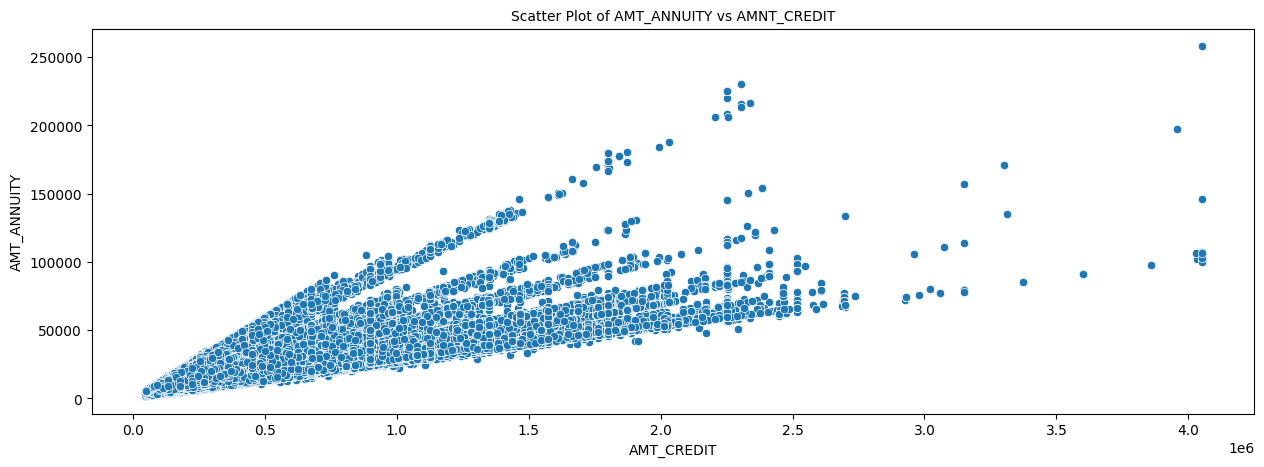

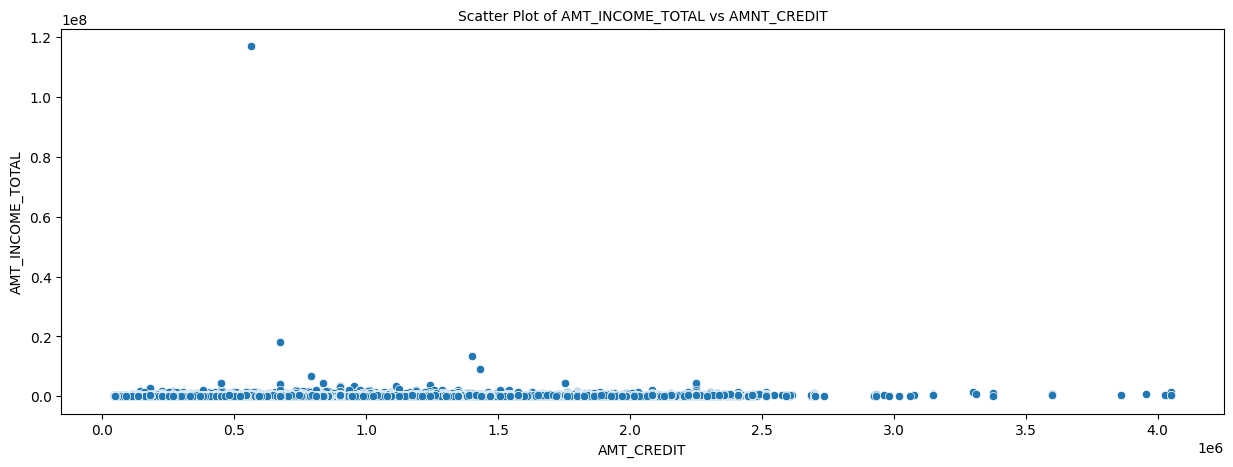

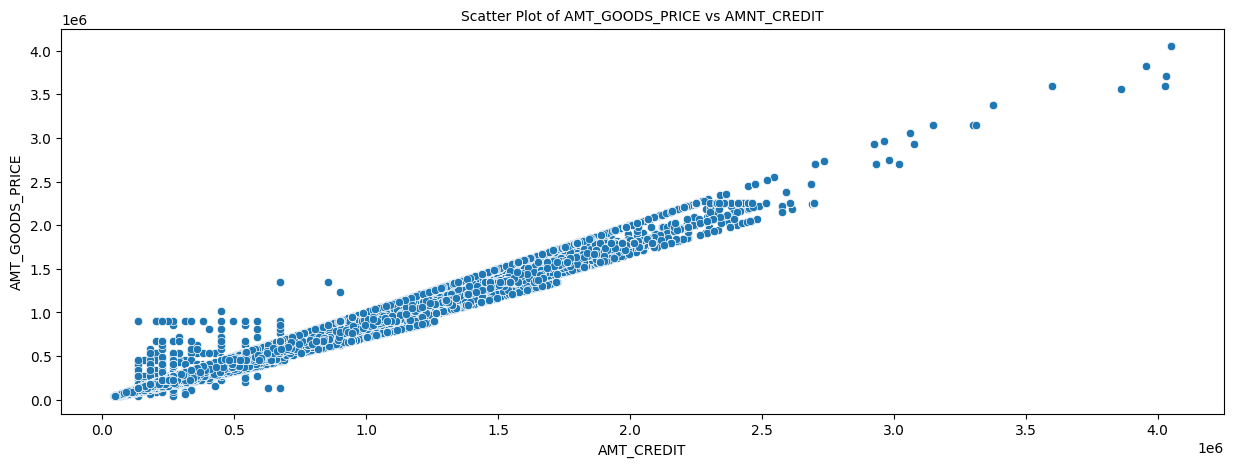

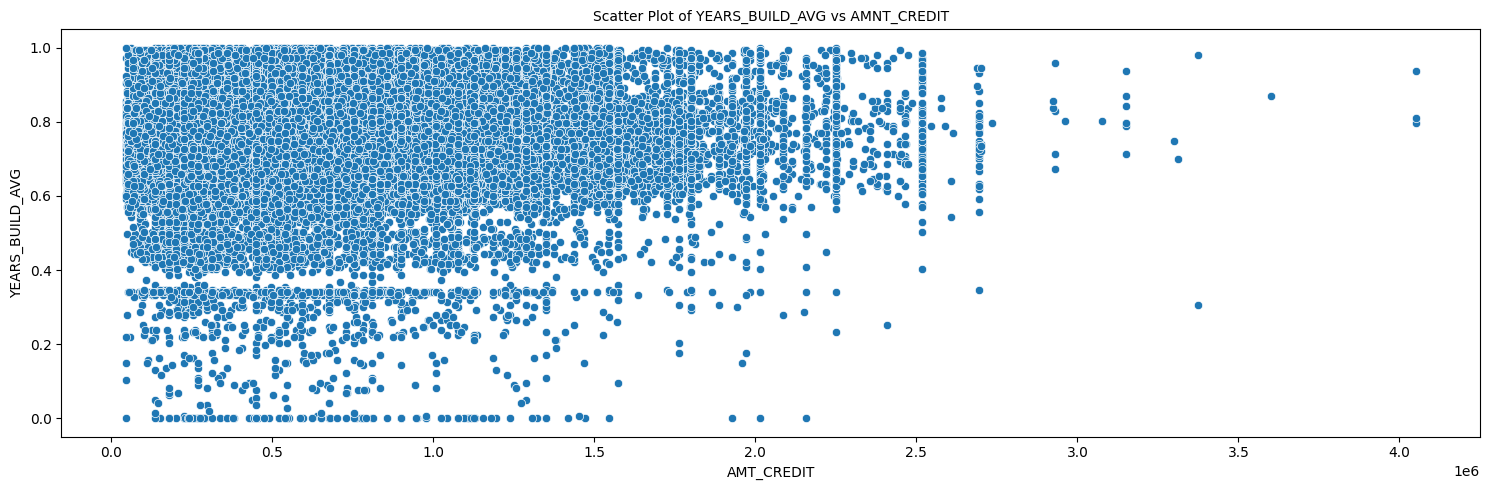

In [ ]:
# create a scatter plot for AMT_CREDIT vs select continuous variables,
bicont_vars = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BUILD_AVG']

plt.figure(figsize=(15,5),facecolor='white')
plotnumber=+1

for column in bicont_vars:
  plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
  ax=sns.scatterplot(x='AMT_CREDIT', y=df1[column], data=df1, palette='Set2')
  plt.xlabel('AMT_CREDIT',fontsize=10)
  plt.ylabel(column,fontsize=10)
  plt.title(f'Scatter Plot of {column} vs AMNT_CREDIT',fontsize=10)
  plotnumber+=1
plt.tight_layout()

### **Insights:**

There is a linear correlation between the variables AMT_CREDIT and AMT_ANNUITY.

There is a linear correlation between the variables AMT_CREDIT and AMT_GOODS_PRICE.

There is no linear correlation between any other pair of variables.

### **6.2.3 Bivariate Analysis: TARGET vs Categorical Variables**
The stacked bar chart

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df1['TARGET'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df1['TARGET'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

TARGET            0      1     All
CODE_GENDER                       
F            188278  14170  202448
M             94404  10655  105059
XNA               4      0       4
All          282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


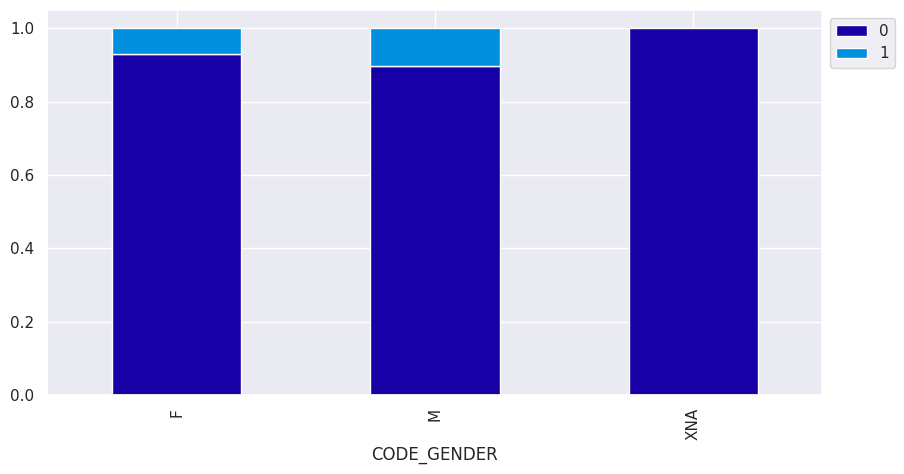

TARGET                           0      1     All
REG_REGION_NOT_LIVE_REGION                       
0                           278462  24392  302854
1                             4224    433    4657
All                         282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


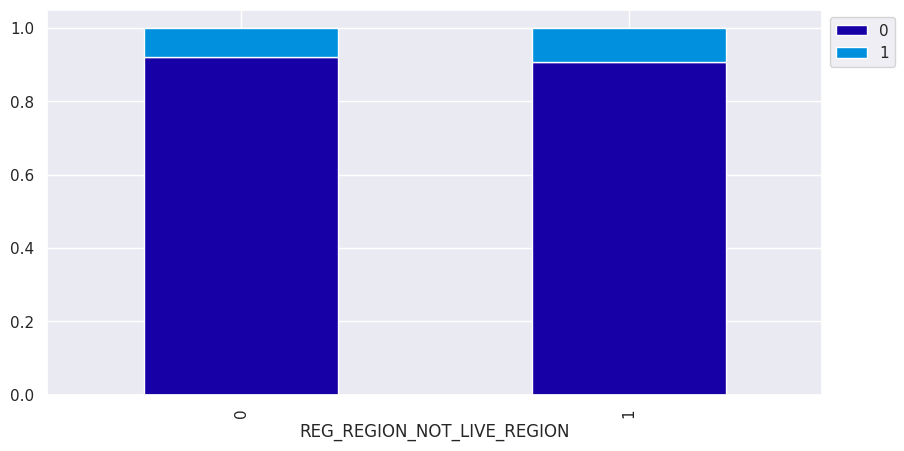

TARGET                           0      1     All
REG_REGION_NOT_WORK_REGION                       
0                           268462  23437  291899
1                            14224   1388   15612
All                         282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


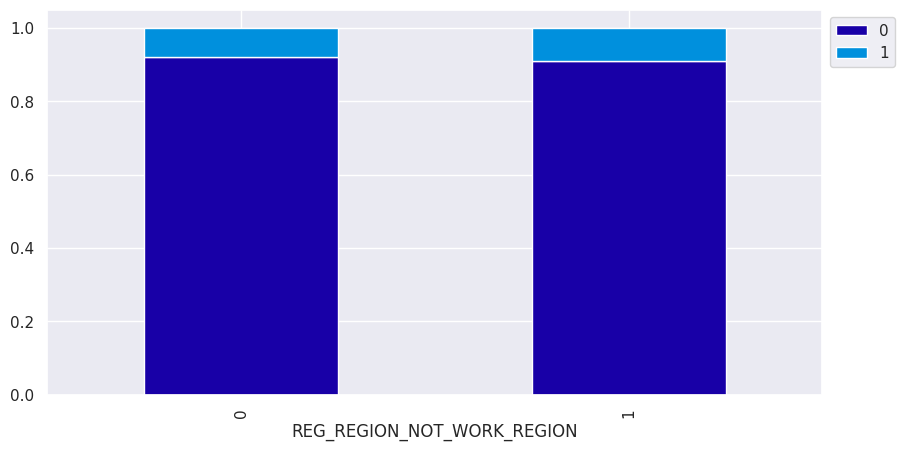

TARGET                       0      1     All
REG_CITY_NOT_LIVE_CITY                       
0                       261586  21886  283472
1                        21100   2939   24039
All                     282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


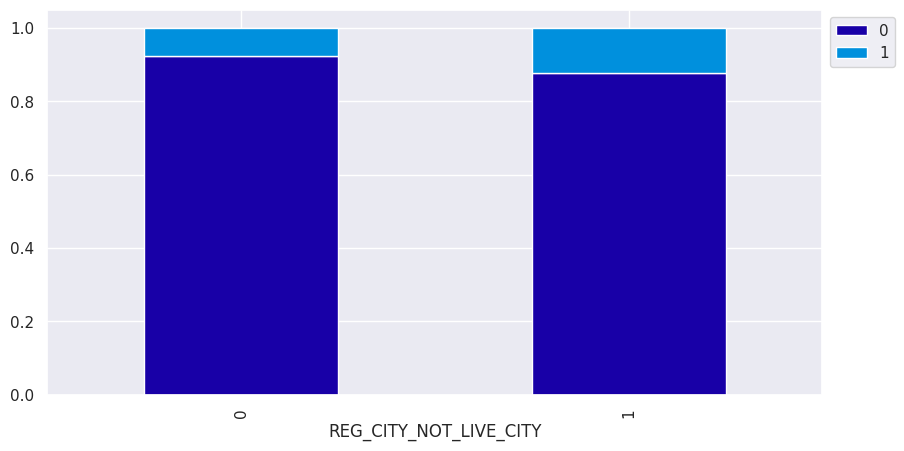

TARGET                       0      1     All
REG_CITY_NOT_WORK_CITY                       
0                       219339  17305  236644
1                        63347   7520   70867
All                     282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


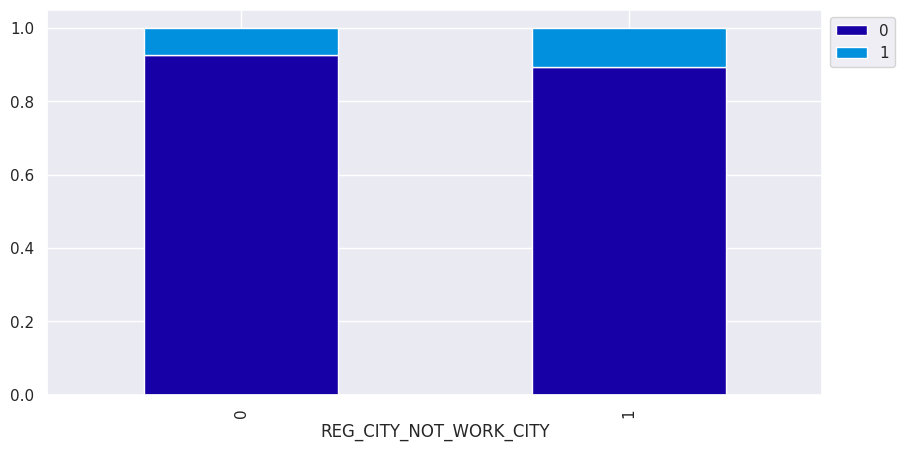

TARGET                0      1     All
NAME_TYPE_SUITE                       
Children           3026    241    3267
Family            37140   3009   40149
Group of people     248     23     271
Other_A             790     76     866
Other_B            1596    174    1770
Spouse, partner   10475    895   11370
Unaccompanied    228189  20337  248526
All              281464  24755  306219
------------------------------------------------------------------------------------------------------------------------


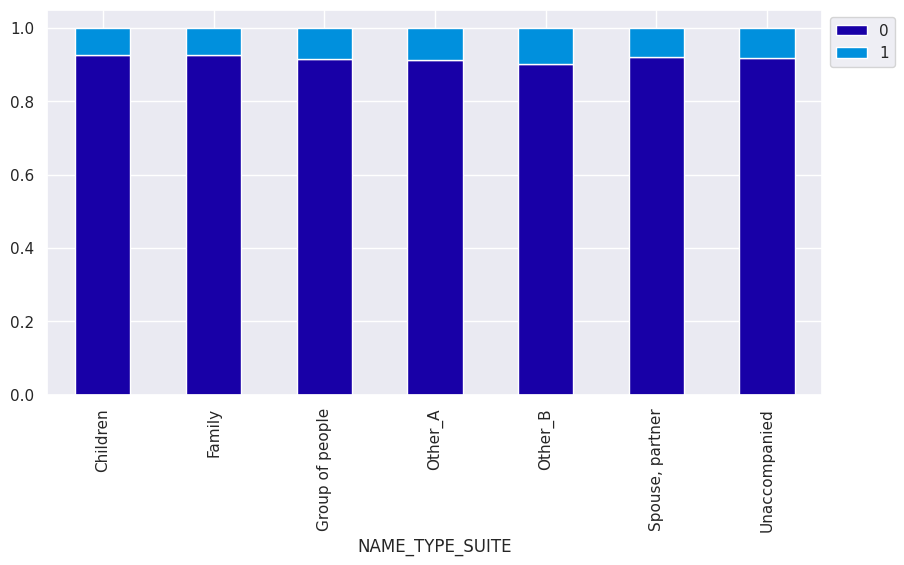

TARGET                     0      1     All
NAME_INCOME_TYPE                           
Businessman               10      0      10
Commercial associate   66257   5360   71617
Maternity leave            3      2       5
Pensioner              52380   2982   55362
State servant          20454   1249   21703
Student                   18      0      18
Unemployed                14      8      22
Working               143550  15224  158774
All                   282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


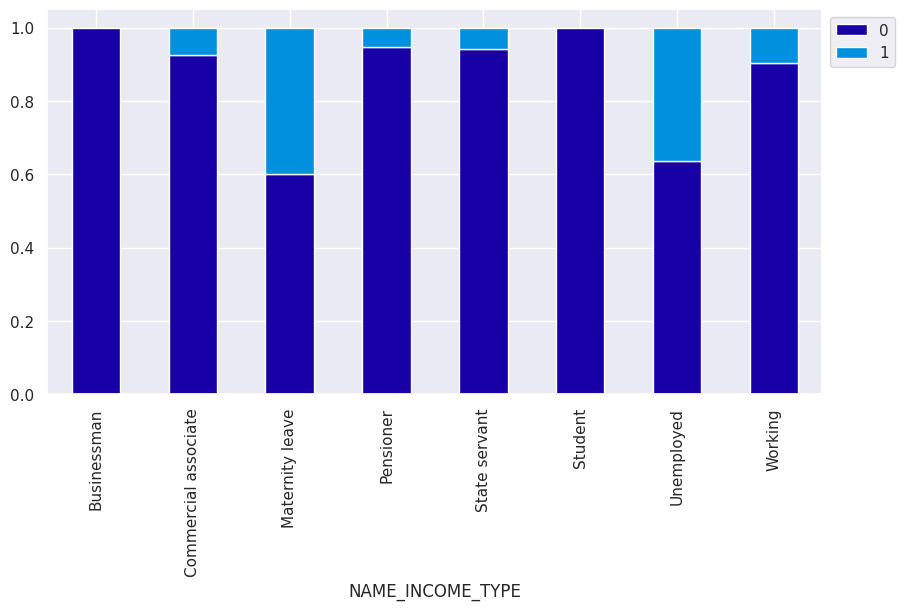

TARGET                              0      1     All
NAME_EDUCATION_TYPE                                 
Academic degree                   161      3     164
Higher education                70854   4009   74863
Incomplete higher                9405    872   10277
Lower secondary                  3399    417    3816
Secondary / secondary special  198867  19524  218391
All                            282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


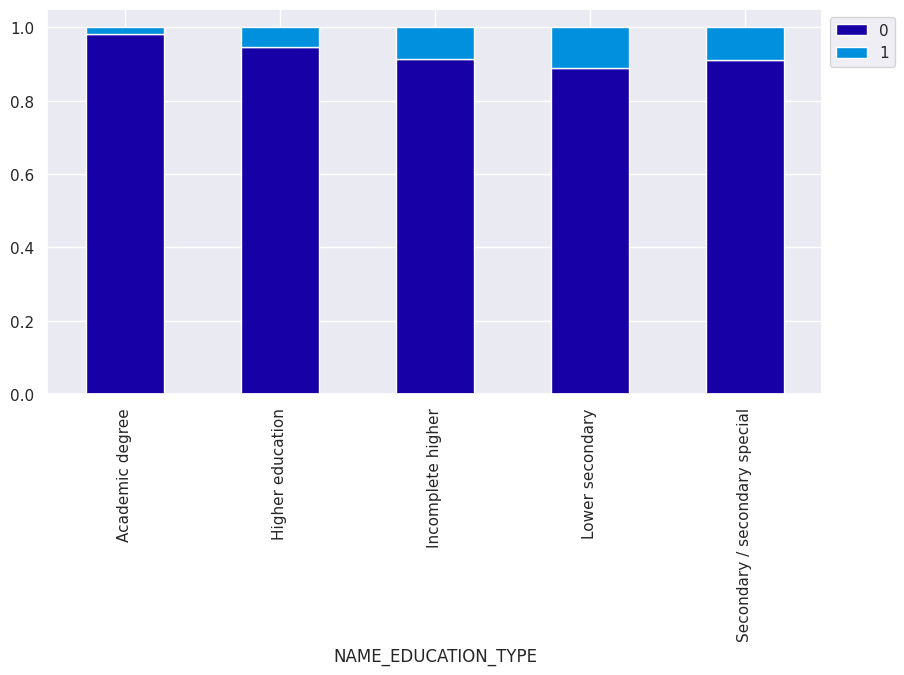

TARGET                     0      1     All
NAME_FAMILY_STATUS                         
Civil marriage         26814   2961   29775
Married               181582  14850  196432
Separated              18150   1620   19770
Single / not married   40987   4457   45444
Unknown                    2      0       2
Widow                  15151    937   16088
All                   282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


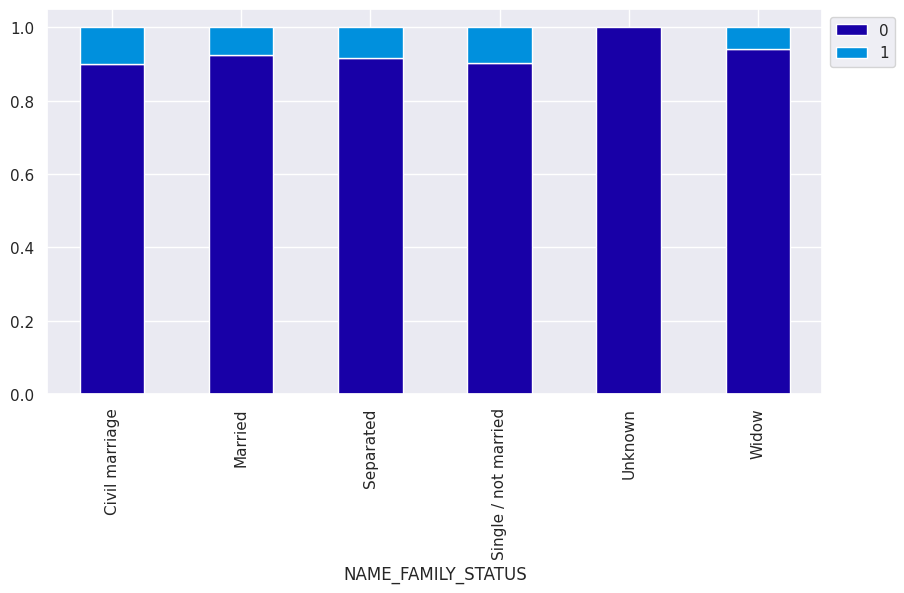

TARGET                    0      1     All
NAME_HOUSING_TYPE                         
Co-op apartment        1033     89    1122
House / apartment    251596  21272  272868
Municipal apartment   10228    955   11183
Office apartment       2445    172    2617
Rented apartment       4280    601    4881
With parents          13104   1736   14840
All                  282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


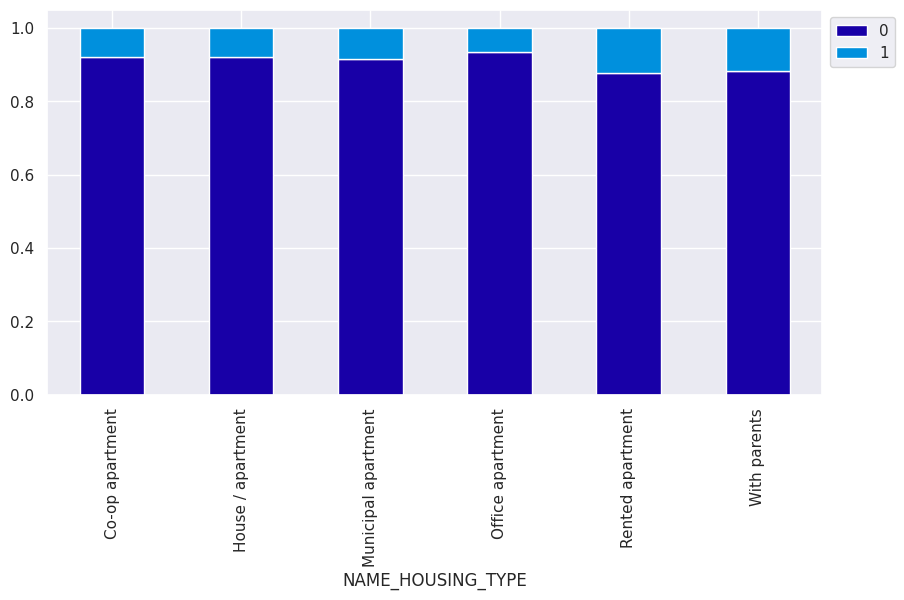

TARGET                      0      1     All
OCCUPATION_TYPE                             
Accountants              9339    474    9813
Cleaning staff           4206    447    4653
Cooking staff            5325    621    5946
Core staff              25832   1738   27570
Drivers                 16496   2107   18603
HR staff                  527     36     563
High skill tech staff   10679    701   11380
IT staff                  492     34     526
Laborers                49348   5838   55186
Low-skill Laborers       1734    359    2093
Managers                20043   1328   21371
Medicine staff           7965    572    8537
Private service staff    2477    175    2652
Realty agents             692     59     751
Sales staff             29010   3092   32102
Secretaries              1213     92    1305
Security staff           5999    722    6721
Waiters/barmen staff     1196    152    1348
All                    192573  18547  211120
-------------------------------------------------------

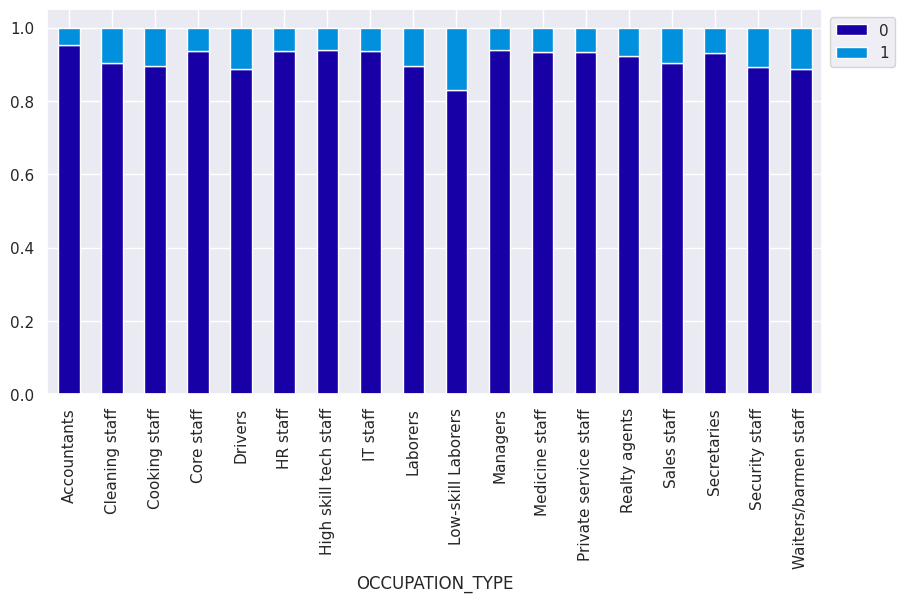

TARGET                       0      1     All
ORGANIZATION_TYPE                            
Advertising                394     35     429
Agriculture               2197    257    2454
Bank                      2377    130    2507
Business Entity Type 1    5497    487    5984
Business Entity Type 2    9653    900   10553
Business Entity Type 3   61669   6323   67992
Cleaning                   231     29     260
Construction              5936    785    6721
Culture                    358     21     379
Electricity                887     63     950
Emergency                  520     40     560
Government                9678    726   10404
Hotel                      904     62     966
Housing                   2723    235    2958
Industry: type 1           924    115    1039
Industry: type 10          102      7     109
Industry: type 11         2470    234    2704
Industry: type 12          355     14     369
Industry: type 13           58      9      67
Industry: type 2           425    

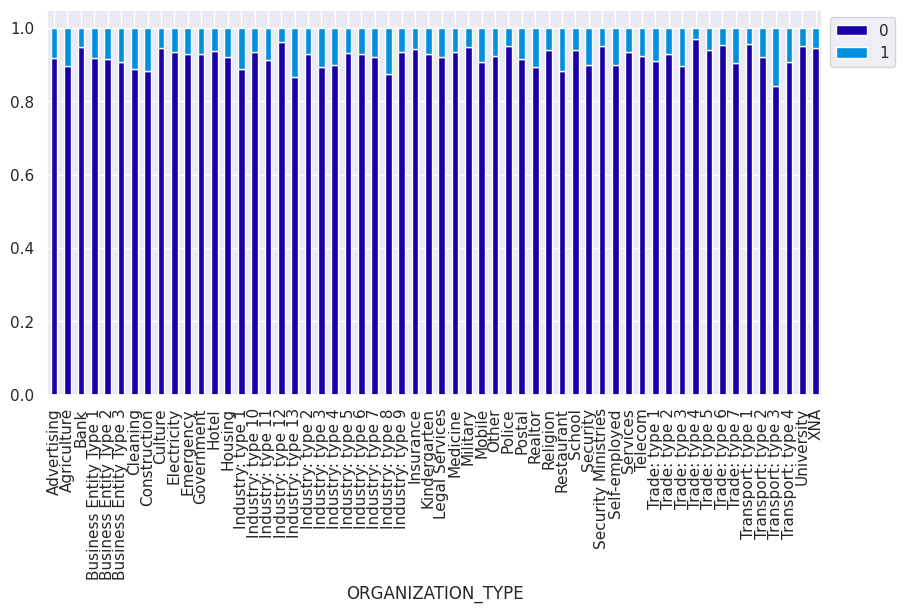

TARGET                0      1     All
CNT_FAM_MEMBERS                       
1.0               62172   5675   67847
2.0              146348  12009  158357
3.0               47993   4608   52601
4.0               22561   2136   24697
5.0                3151    327    3478
6.0                 353     55     408
7.0                  75      6      81
8.0                  14      6      20
9.0                   6      0       6
10.0                  2      1       3
11.0                  0      1       1
12.0                  2      0       2
13.0                  0      1       1
14.0                  2      0       2
15.0                  1      0       1
16.0                  2      0       2
20.0                  2      0       2
All              282684  24825  307509
------------------------------------------------------------------------------------------------------------------------


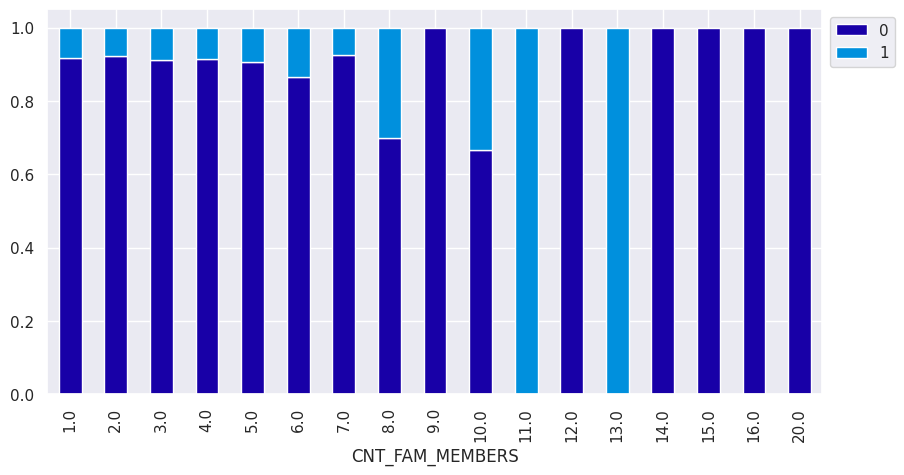

TARGET             0      1     All
CNT_CHILDREN                       
0             198762  16609  215371
1              55665   5454   61119
2              24416   2333   26749
3               3359    358    3717
4                374     55     429
5                 77      7      84
6                 15      6      21
7                  7      0       7
8                  2      0       2
9                  0      2       2
10                 2      0       2
11                 0      1       1
12                 2      0       2
14                 3      0       3
19                 2      0       2
All           282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


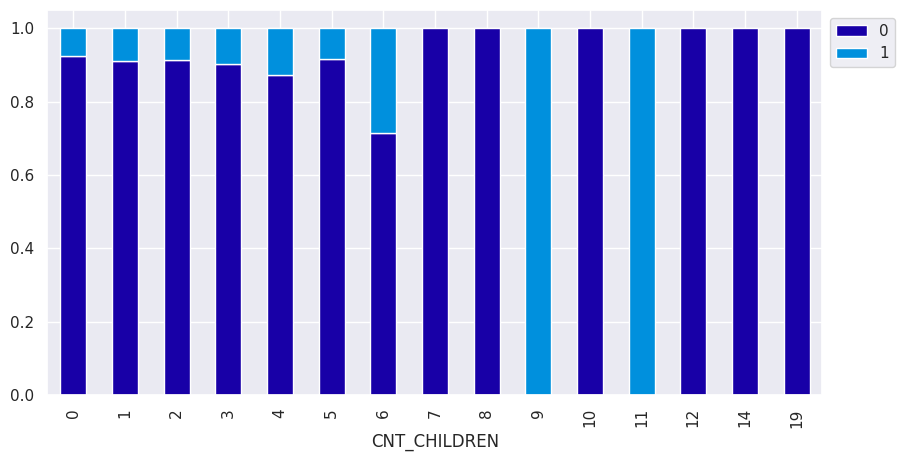

In [ ]:
# Plotting stacked bar plot for TARGET and selected categorical columns
cat_vars = ['CODE_GENDER', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
            'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
            'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'CONTRACT_TYPE', 'CREDIT_TYPE']

for x in cat_vars:
  stacked_plot(df1[x])




### **Insights**

* There are more female borrowers than males, whilst more males default.

* Borrowers on Maternity Leave and Unemployed are the largest defaulters.

* Borrowers staying in Rented Apartments and those living with Parents default more compared to other NAME_HOUSING_TYPE.

* Borrowers with more children dfault more than those with fewer number of children.

* Low skilled laborers default more compared to other OCCUPATION_TYPE.

* Accountants and Managers are the least loan defaulting OCCUPATION_TYPE.

* Largest proportion of defaulters have lower secondary education type and of occupation type low skill laborer.

* Transport Type 3 is the largest loan defaulting organization type whilst Industry Type 12 is the most non-defaulting organization type.

* Borrowers whose region_not_living_region (0) are taking more loans and there are more defaults by those whose region_not_living_region is (1), i.e those who don't live in same region.

* Borrowers whose region_not_work_region (0) are taking more loans and there are more defaults by those whose region_not_work_region is (1), i.e those who don't work in same region.

* Borrowers whose city_not_living_city (0) are taking more loans and there are more defaults by those whose city_not_living_city is (1), i.e who don't live in same city.

## **6.3 Multivariate Analysis**
Analyze Correlation Heatmap for Numerical Variables

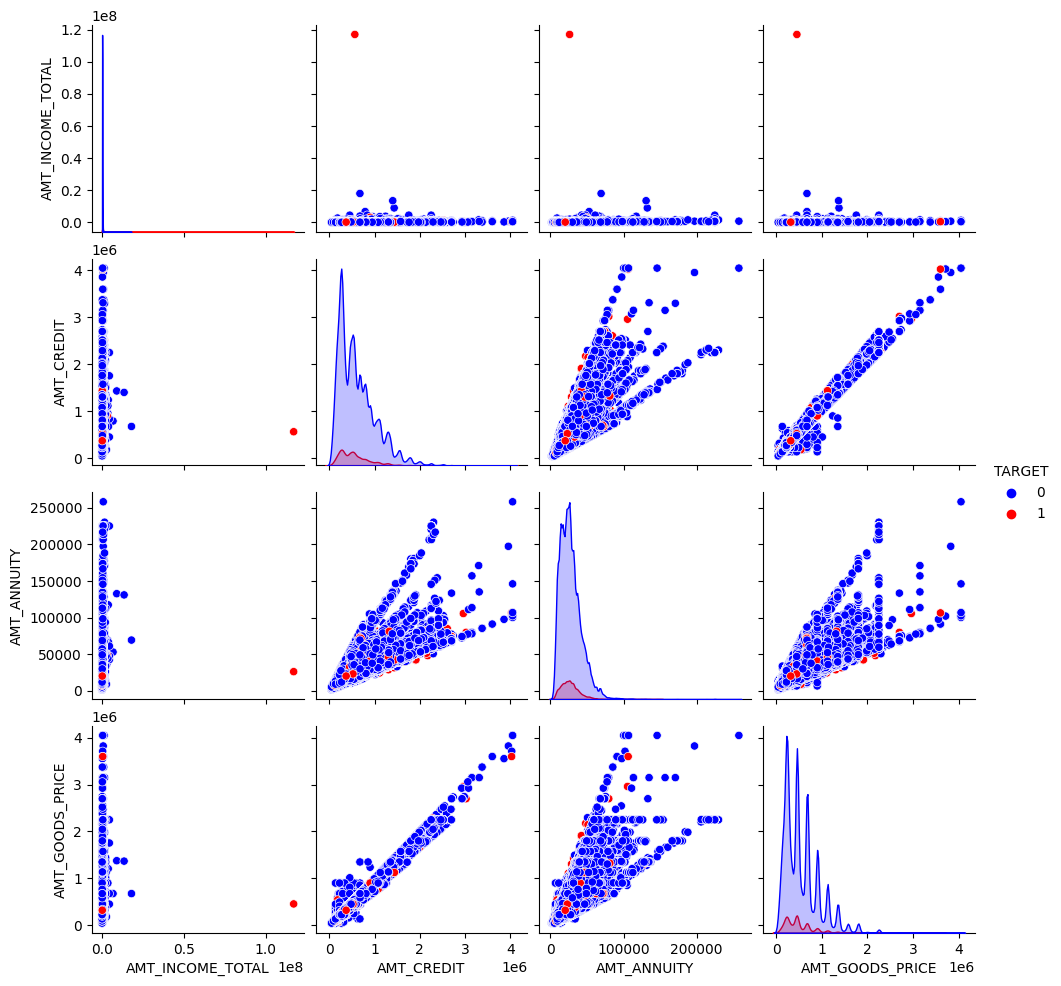

In [ ]:
# Building pairplot for the data with hue = 'TARGET'

cor_df1 = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
cor_df1 = cor_df1[(cor_df1["AMT_GOODS_PRICE"].notnull()) & (cor_df1["AMT_ANNUITY"].notnull())]
ax = sns.pairplot(cor_df1,hue="TARGET",palette=["b","r"])

plt.show()

plt.show()

<Axes: >

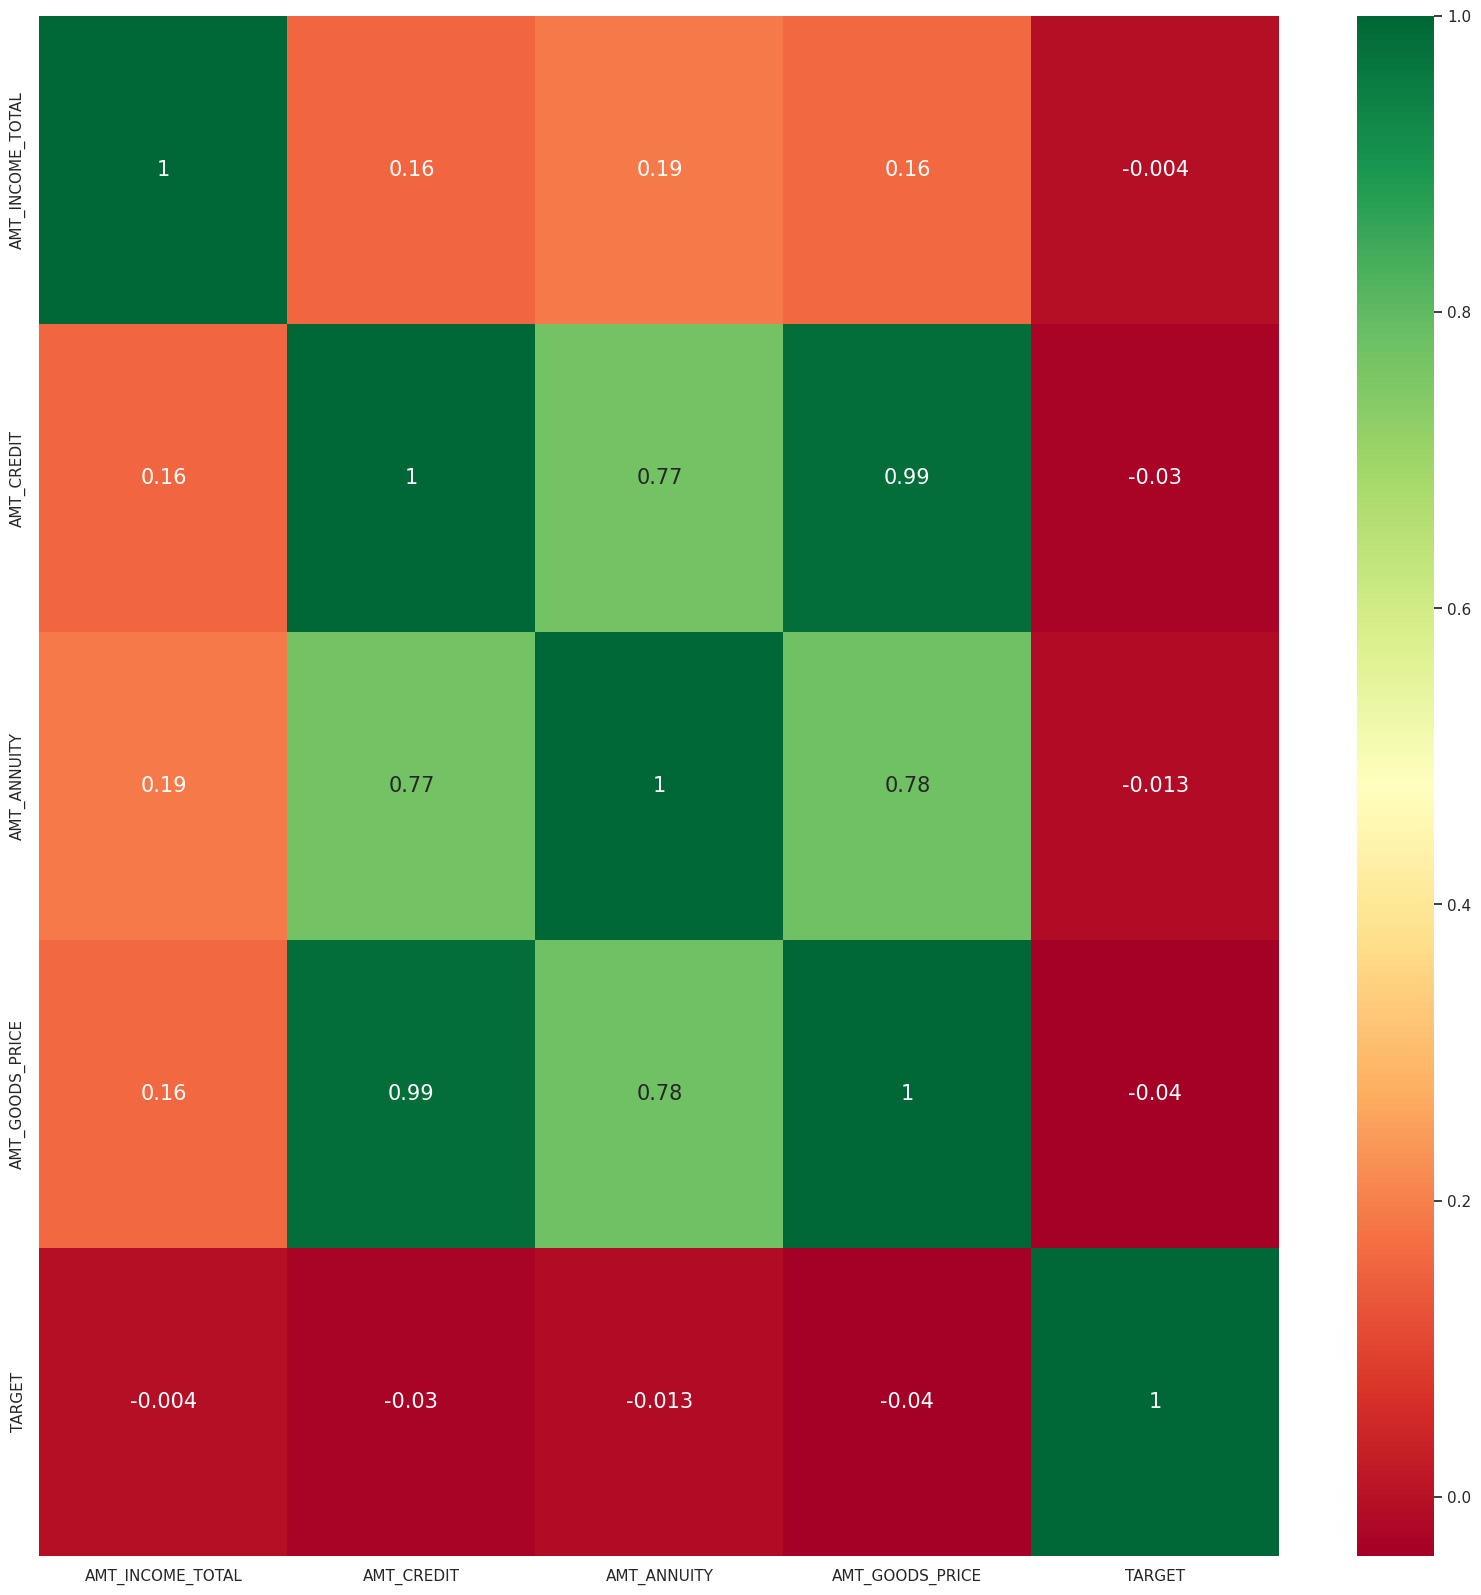

In [ ]:
## Checking correlation

plt.figure(figsize=(20, 20))#canvas size
sns.heatmap(cor_df1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

<Axes: >

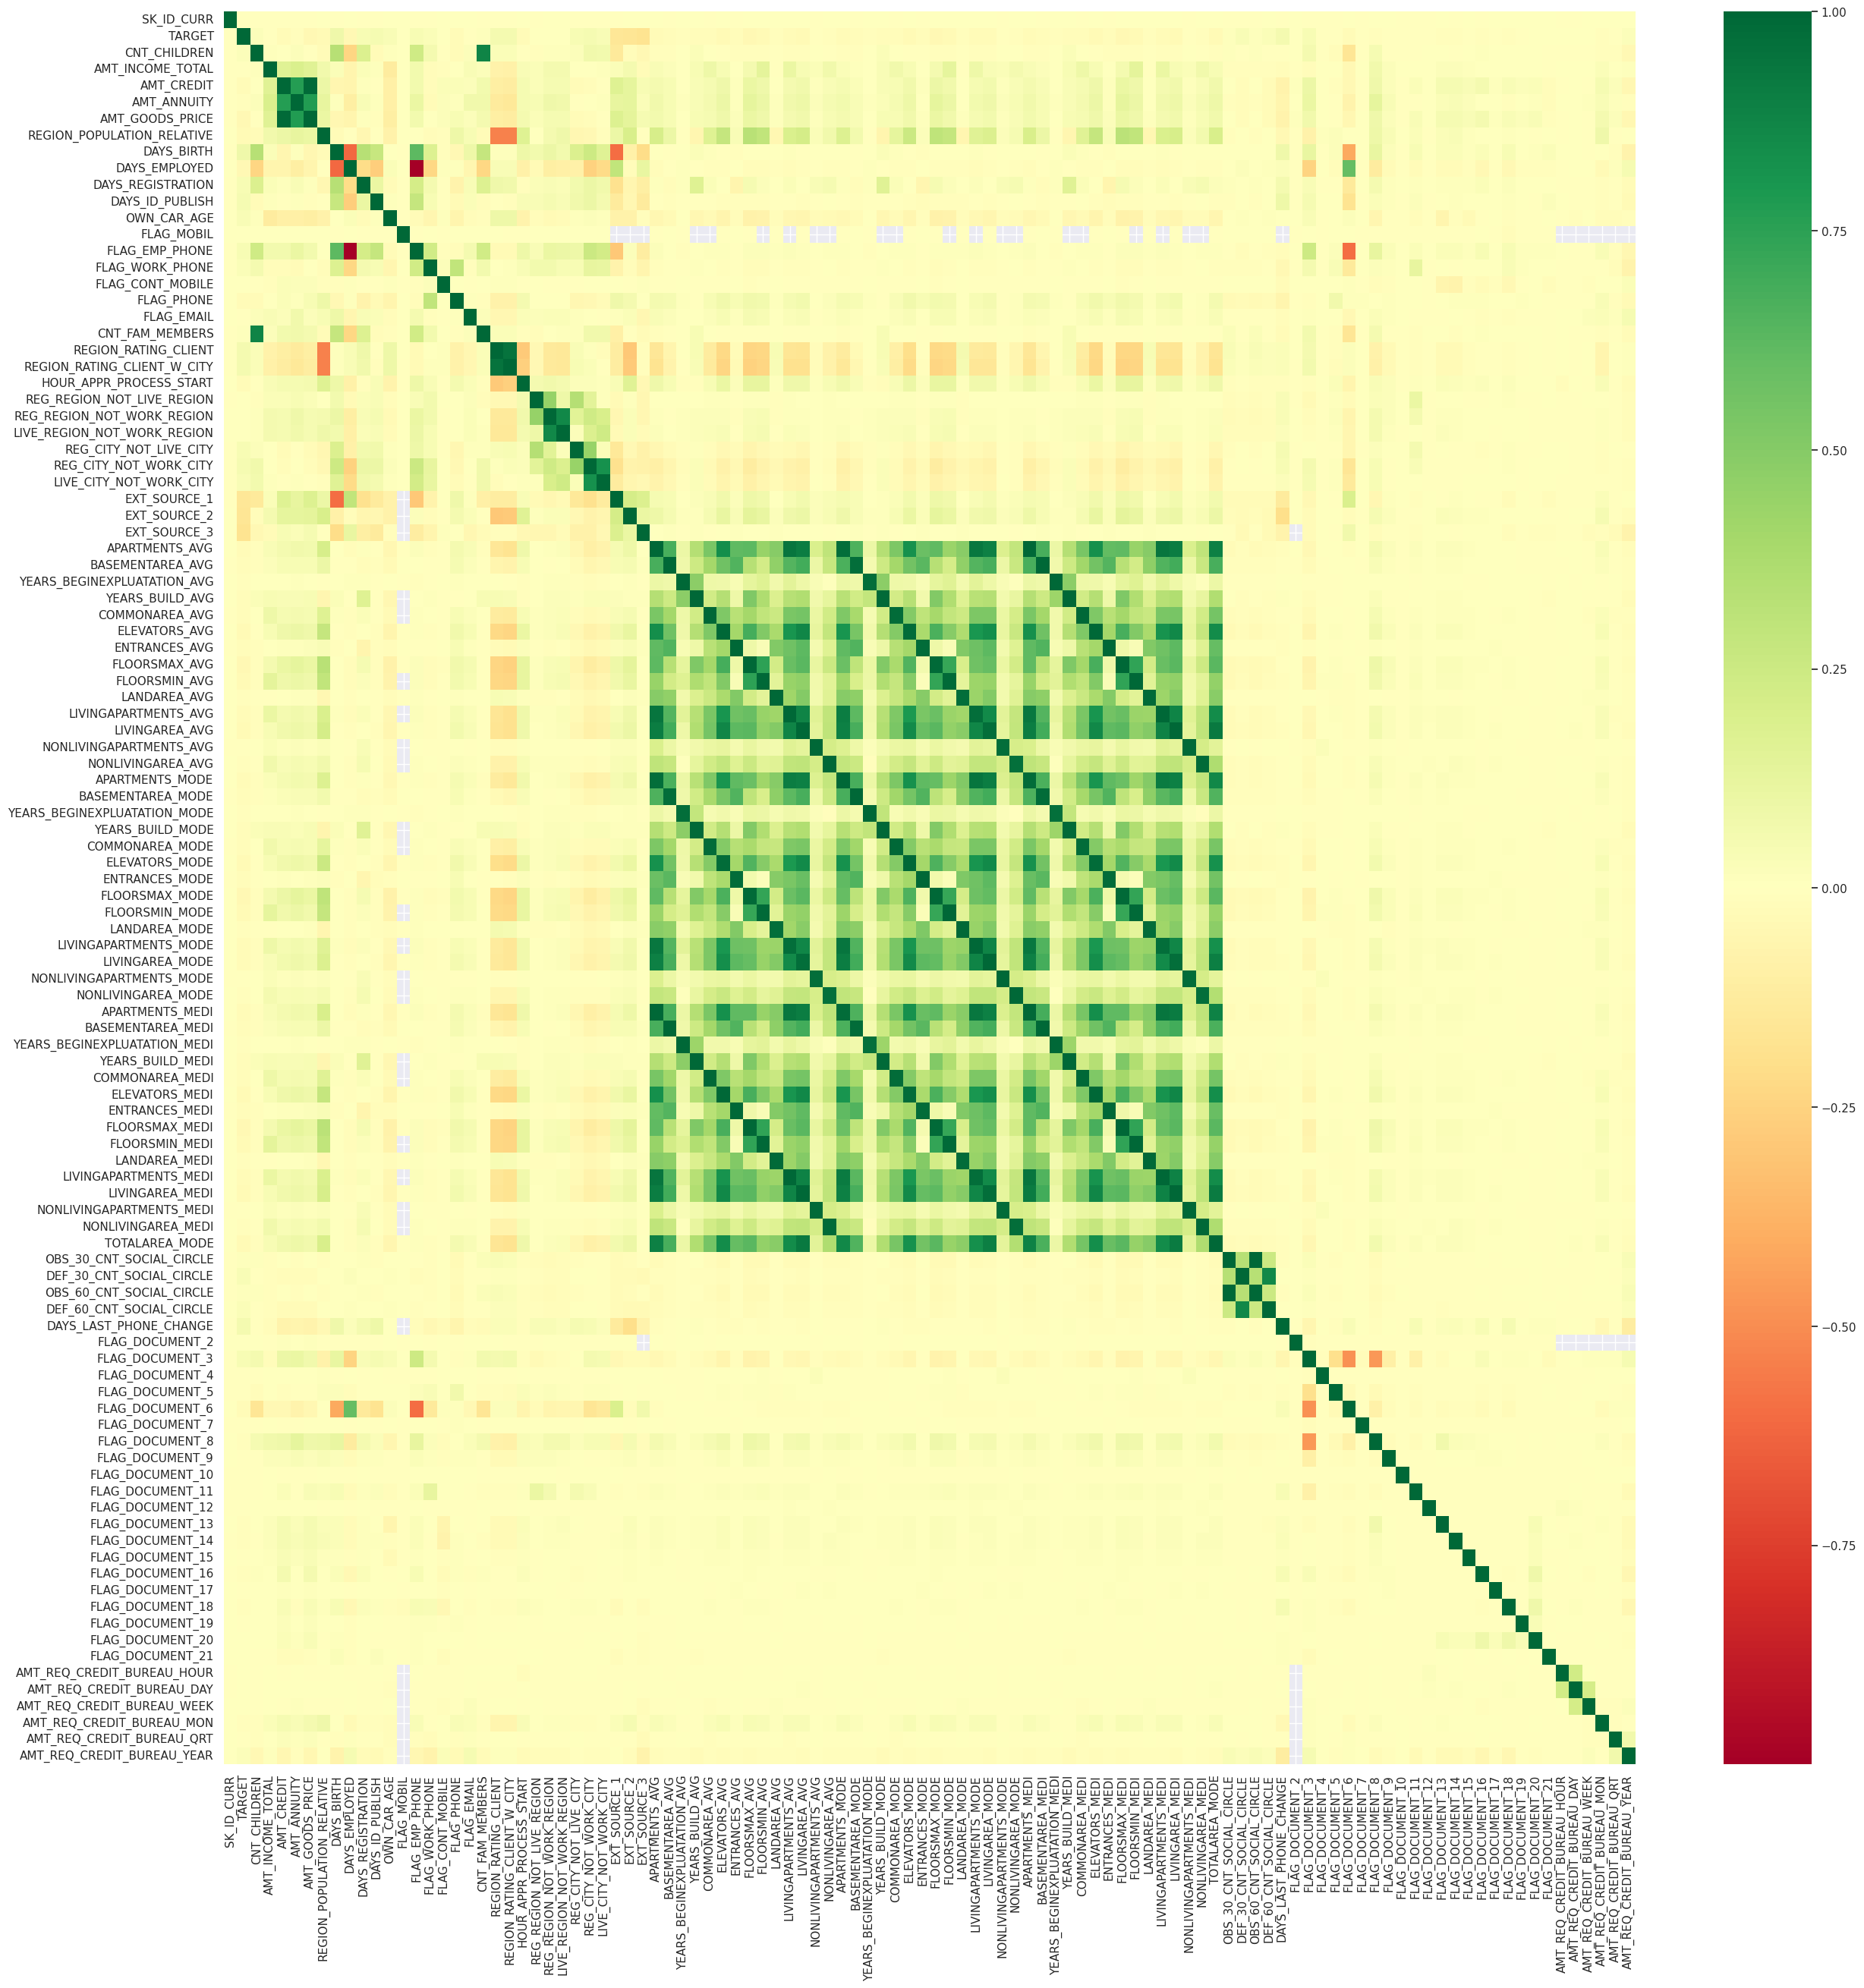

In [ ]:
# Separating numerical variables
num_col = df1.select_dtypes(include=np.number).columns.tolist()
num_col

# Building correlation matrix for numerical columns
corr = df1[num_col].corr()

# plotting the heatmap

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(corr, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [ ]:
corr.shape

(106, 106)

### Identifying outliers in the data using a function


In [ ]:
# get threshold function

def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df1[feature])
    sdev=np.std(df1[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

In [ ]:
thresh_income = get_thresh('AMT_INCOME_TOTAL')
thresh_employment = get_thresh('DAYS_EMPLOYED')

anomalous_employment = df1[df1['DAYS_EMPLOYED'] > 0]
normal_employment = df1[df1['DAYS_EMPLOYED'] < 0]

print('The non-anomalies default on %0.2f%% of loans' % (100 * normal_employment['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_employment['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_employment))

Threshold for AMT_INCOME_TOTAL : 880166.2
Threshold for DAYS_EMPLOYED : 487641.66
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [ ]:
# Replace the anomalous values with nan

df1['DAYS_EMPLOYED'].mask(df1['DAYS_EMPLOYED'] > 0, inplace=True)
df1['AMT_INCOME_TOTAL'].mask(df1['AMT_INCOME_TOTAL'] > thresh_income, inplace=True)

---

### Function to convert features which have days to years

In [ ]:
def create_day_to_year(df,ls_cols,newcol):
    df[newcol] = round(np.abs(df[ls_cols[0]]/365))
    df.drop(columns=ls_cols,inplace=True);
    return df

In [ ]:
# DAYS_BIRTH to AGE
create_day_to_year(df1,['DAYS_BIRTH'],'AGE');

In [ ]:
# DAYS_EMPLOYED to YEARS_EMPLOYED
create_day_to_year(df1,['DAYS_EMPLOYED'],'YEARS_EMPLOYED');

In [ ]:
# DAYS_REGISTRATION to YEAR_REGISTRATION
create_day_to_year(df1,['DAYS_REGISTRATION'],'YEARS_REGISTRATION');

In [ ]:
# DAYS_ID_PUBLISH to YEARS_ID_PUBLISH
create_day_to_year(df1,['DAYS_ID_PUBLISH'],'YEARS_ID_PUBLISH');

In [ ]:
# selected numerical year based columns (yr_vars)
yr_vars = ['AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

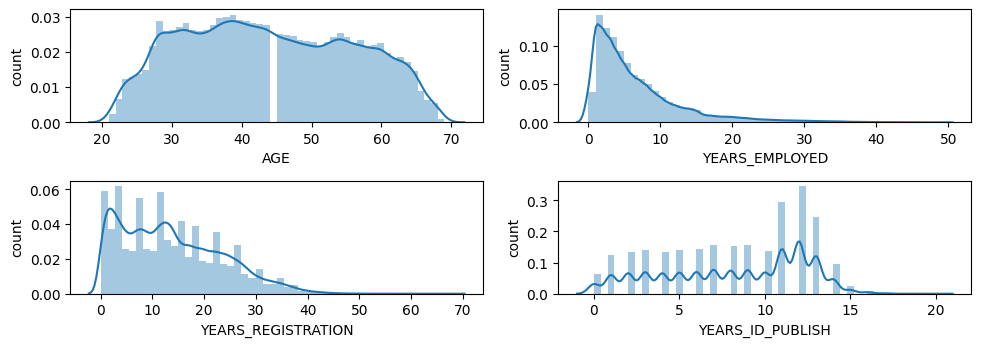

In [ ]:
# plot distribution plots for selected numerical columns (yr_vars)
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=+1
for column in yr_vars:
  if plotnumber<18:
    ax=plt.subplot(6,2,plotnumber)
    sns.distplot(x=df1[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber+=1
plt.tight_layout()

---

In [ ]:
# print the minimum, maximum AMT_INCOME_TOTAL
df1['AMT_INCOME_TOTAL'].min(), df1['AMT_INCOME_TOTAL'].max()

(25650.0, 877500.0)

In [ ]:
# print statistical summary for df1['AMT_INCOME_TOTAL']
df1['AMT_INCOME_TOTAL'].describe()

count    307057.000000
mean     166688.814515
std       87576.546445
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      877500.000000
Name: AMT_INCOME_TOTAL, dtype: float64



---


### Creating Income Bands

In [ ]:
# creating income bands using numpy linspace method (10 equal bands from 0-360000)
df1['INCOME_BAND'] = pd.cut(df1['AMT_INCOME_TOTAL'], bins=np.linspace(0, 900000, 11))
df1['INCOME_BAND']

0         (180000.0, 270000.0]
1         (180000.0, 270000.0]
2               (0.0, 90000.0]
3          (90000.0, 180000.0]
4          (90000.0, 180000.0]
                  ...         
307506     (90000.0, 180000.0]
307507          (0.0, 90000.0]
307508     (90000.0, 180000.0]
307509     (90000.0, 180000.0]
307510     (90000.0, 180000.0]
Name: INCOME_BAND, Length: 307511, dtype: category
Categories (10, interval[float64, right]): [(0.0, 90000.0] < (90000.0, 180000.0] <
                                            (180000.0, 270000.0] < (270000.0, 360000.0] < ... <
                                            (540000.0, 630000.0] < (630000.0, 720000.0] <
                                            (720000.0, 810000.0] < (810000.0, 900000.0]]

TARGET                     0      1     All
INCOME_BAND                                
(0.0, 90000.0]         53188   4734   57922
(90000.0, 180000.0]   144141  13521  157662
(180000.0, 270000.0]   59863   4903   64766
(270000.0, 360000.0]   16551   1108   17659
(360000.0, 450000.0]    5977    386    6363
(450000.0, 540000.0]    1189     76    1265
(540000.0, 630000.0]     404     24     428
(630000.0, 720000.0]     748     40     788
(720000.0, 810000.0]     164      7     171
(810000.0, 900000.0]      31      2      33
All                   282256  24801  307057
------------------------------------------------------------------------------------------------------------------------


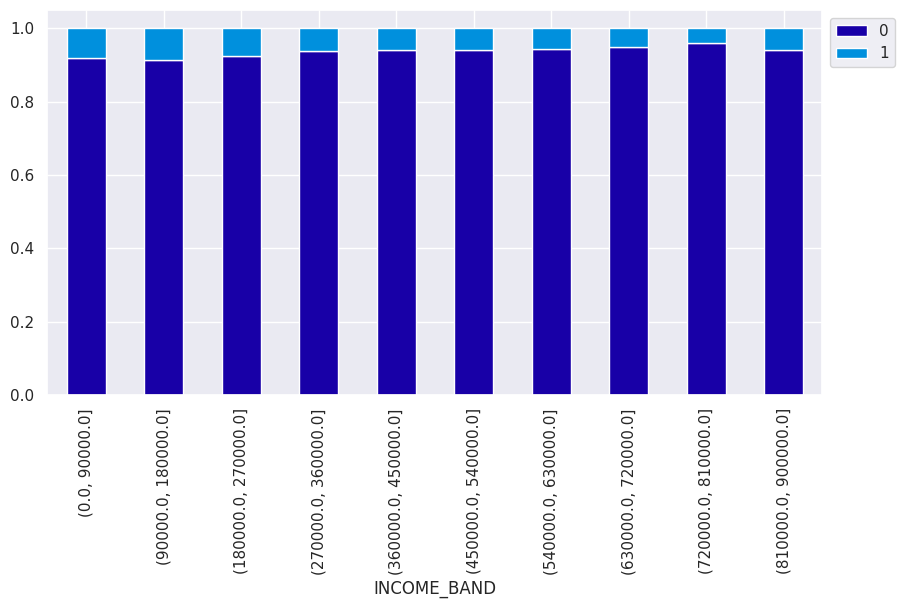

In [ ]:
# use previously defined function to create a stacked plot for defaulters and none defaulters
stacked_plot(df1['INCOME_BAND'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0.0, 90000.0]'),
  Text(1, 0, '(90000.0, 180000.0]'),
  Text(2, 0, '(180000.0, 270000.0]'),
  Text(3, 0, '(270000.0, 360000.0]'),
  Text(4, 0, '(360000.0, 450000.0]'),
  Text(5, 0, '(450000.0, 540000.0]'),
  Text(6, 0, '(540000.0, 630000.0]'),
  Text(7, 0, '(630000.0, 720000.0]'),
  Text(8, 0, '(720000.0, 810000.0]'),
  Text(9, 0, '(810000.0, 900000.0]')])

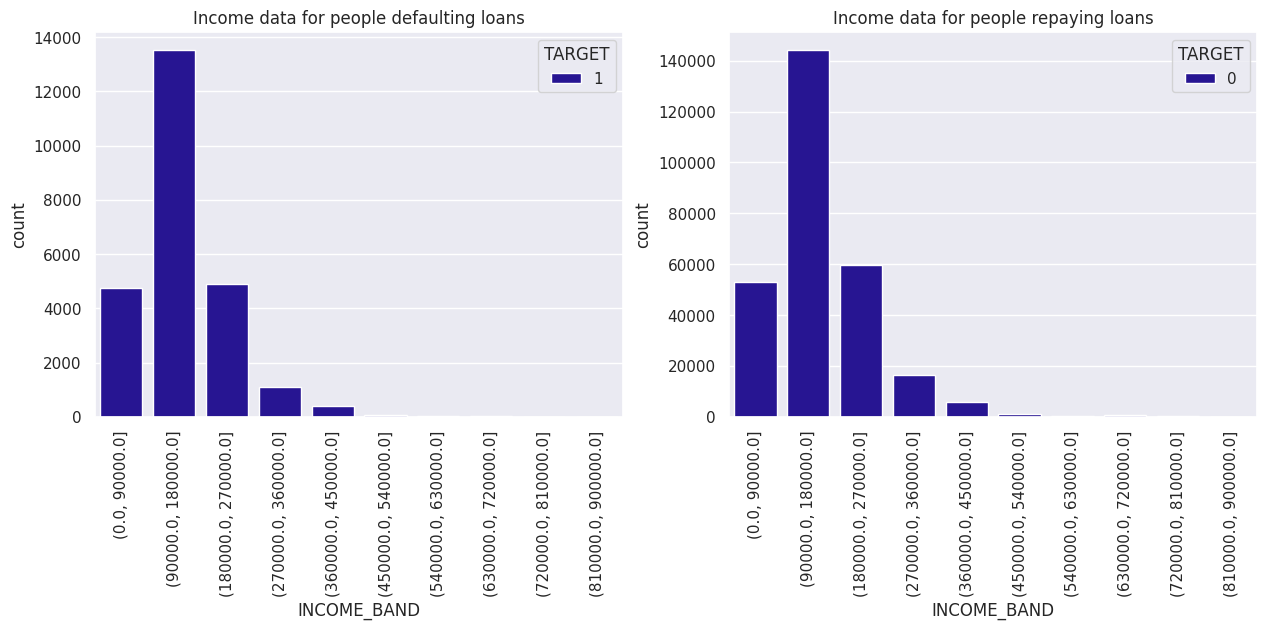

In [ ]:
# count plot for defaulters versus non-defaulters side by side against INCOME_BANDS
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=df1[df1.TARGET==1],x='INCOME_BAND',hue='TARGET').set_title('Income data for people defaulting loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.subplot(122)
sns.countplot(data=df1[df1.TARGET==0],x='INCOME_BAND',hue='TARGET').set_title('Income data for people repaying loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

In [ ]:
# drop the newly created INCOME_BAND column
df1.drop(columns=['INCOME_BAND'],inplace=True);

## Insights
There is no much difference between the defaulters and non-defaulters across income bands


---



## **Exploring relationships in the data model**

### **application_train vs bureau**

In [ ]:
# merge main dataset - application_train with bureau
df1_merge1 = df1.merge(df2, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

# print shape of merged dataset
print("Merged dataset shape: ", df1_merge1.shape)

Merged dataset shape:  (1465325, 138)


TARGET              0      1     All
CREDIT_ACTIVE                       
Active         104687   9118  113805
Bad debt            2      0       2
Closed         176845  15590  192435
Sold             1152    117    1269
All            282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


<Figure size 1500x1000 with 0 Axes>

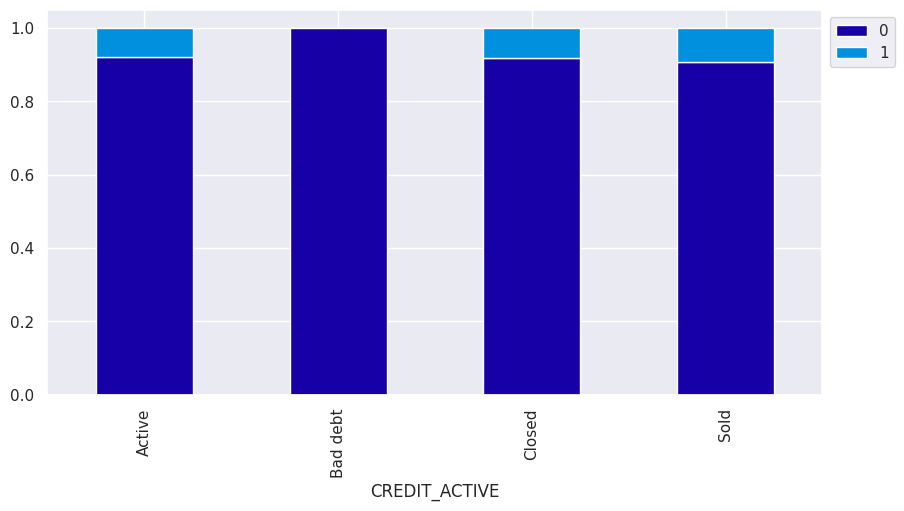

TARGET                0      1     All
CREDIT_CURRENCY                       
currency 1       282452  24813  307265
currency 2          209     11     220
currency 3           24      1      25
currency 4            1      0       1
All              282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


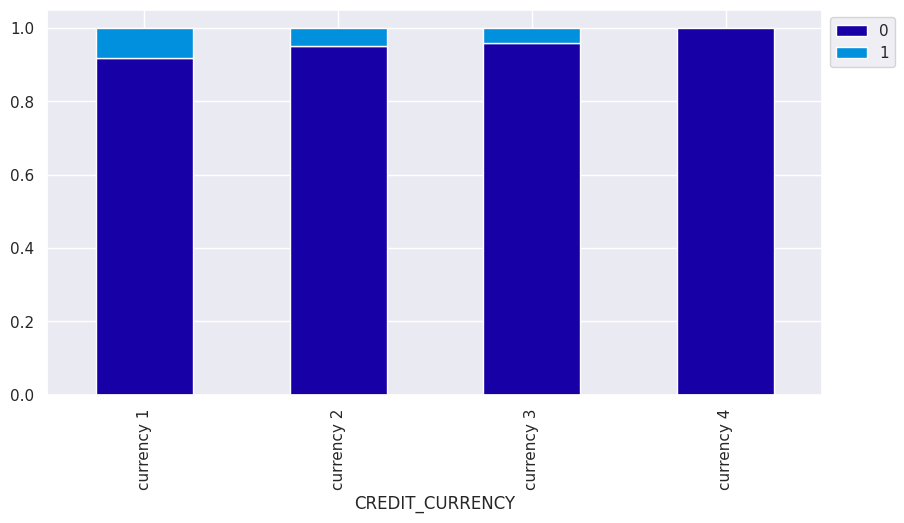

TARGET                                       0      1     All
CREDIT_TYPE                                                  
Another type of loan                       153     15     168
Car loan                                  4460    415    4875
Cash loan (non-earmarked)                    2      2       4
Consumer credit                         206596  18086  224682
Credit card                              66125   5869   71994
Interbank credit                             1      0       1
Loan for business development              326     21     347
Loan for the purchase of equipment           1      0       1
Loan for working capital replenishment      84      7      91
Microloan                                 1798    147    1945
Mortgage                                  3041    256    3297
Real estate loan                             4      1       5
Unknown type of loan                        95      6     101
All                                     282686  24825  307511
--------

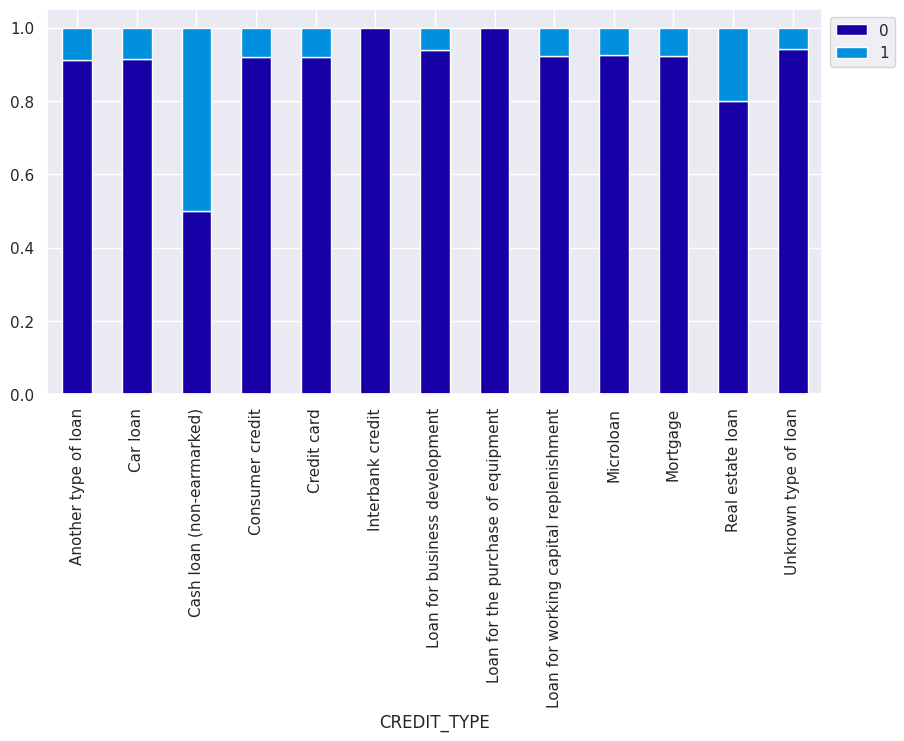

In [ ]:
# use previously defined function to create a stacked plot for defaulters and none defaulters

# select columns of types categorical (object type) in bureau dataset (df2),
cat_df=df2.select_dtypes(include=['object'])
cat_df

plt.figure(figsize=(15,10),facecolor='white')
plotnumber=+1

for column in cat_df.columns:
  stacked_plot(df1_merge1[column])

### Insights
* There are three categorical features from bureau dataset - CREDIT_ACTIVE, CREDIT_CURRENCY, and CREDIT_TYPE.

* CREDIT_ACTIVE: borrowers without active credit are taking most of the loans, whilst borrowers who have bad debt or sold credit fault the most.

* CREDIT_CURRENCY: currency 1 is the most dominant among the loan clients, whilst the other 3 are rare.

* CREDIT_TYPE: consumer credit is the most dominant type, followed by credit card, car loan and mortgage, respectively.   The other 9 types of credit constitute a very small propotion.

* Loans for business development and the unkown type constitute the highest propotion of defaults.

### **application_train vs previous_application**

In [ ]:
# merge main dataset - application_train with previous_application
df1_merge2 = df1.merge(df7, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

# print shape of merged dataset
print("Merged dataset shape: ", df1_merge2.shape)

Merged dataset shape:  (1413701, 158)


In [ ]:
# select columns of types categorical (object type) in previous_application dataset (df7)
cat_df=df7.select_dtypes(include=['object'])
cat_df.columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Feature NAME_CONTRACT_TYPE is duplicated between application_train and previous_application datasets, hence we can drop it from df7 or rename it.

In [ ]:
# rename duplicate column
df7.rename(columns = {"NAME_CONTRACT_TYPE": "NAME_CONTRACT_TYPE_mg"},
          inplace = True)

TARGET                                 0      1     All
NAME_CASH_LOAN_PURPOSE                                 
Building a house or an annex         468     49     517
Business development                  81      6      87
Buying a garage                       21      2      23
Buying a holiday home / land         108     16     124
Buying a home                        157     17     174
Buying a new car                     184     14     198
Buying a used car                    464     39     503
Car repairs                          151     15     166
Education                            272     24     296
Everyday expenses                    413     37     450
Furniture                            116     11     127
Gasification / water supply           48      4      52
Hobby                                  9      5      14
Journey                              202     18     220
Medicine                             413     34     447
Money for a third person               5      0 

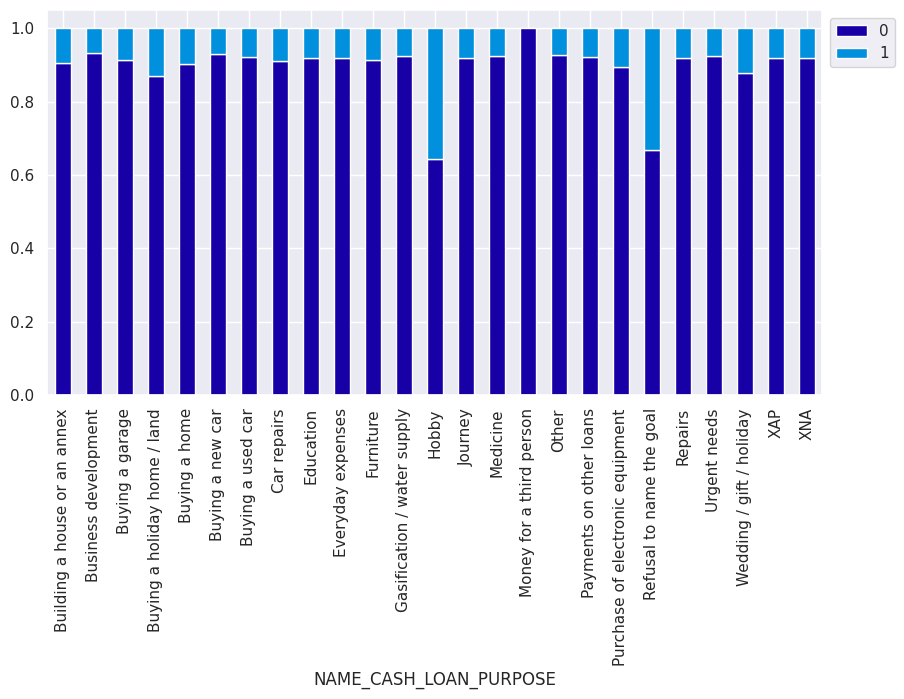

TARGET                     0      1     All
NAME_CONTRACT_STATUS                       
Approved              176979  15652  192631
Canceled               52113   4542   56655
Refused                48995   4231   53226
Unused offer            4599    400    4999
All                   282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


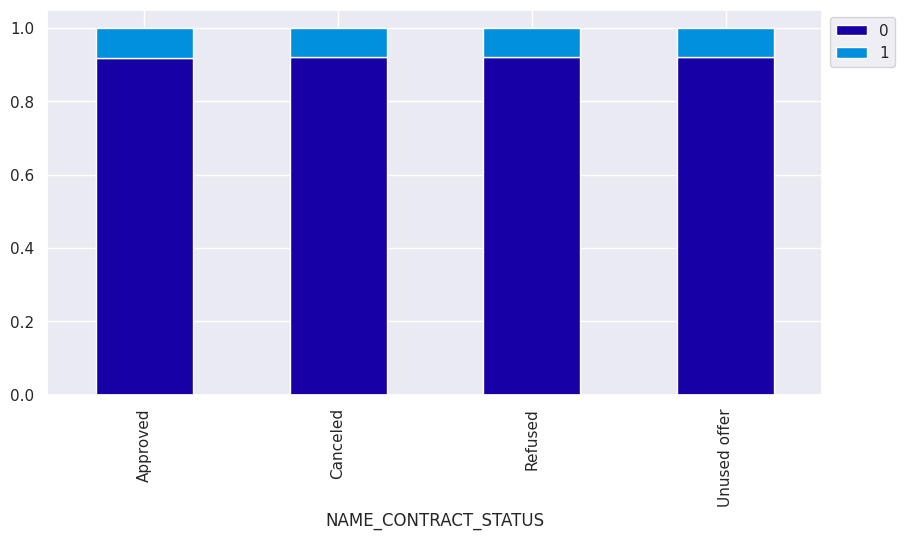

TARGET                                          0      1     All
NAME_PAYMENT_TYPE                                               
Cash through the bank                      176668  15505  192173
Cashless from the account of the employer     201     24     225
Non-cash from your account                   1354    103    1457
XNA                                        104463   9193  113656
All                                        282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


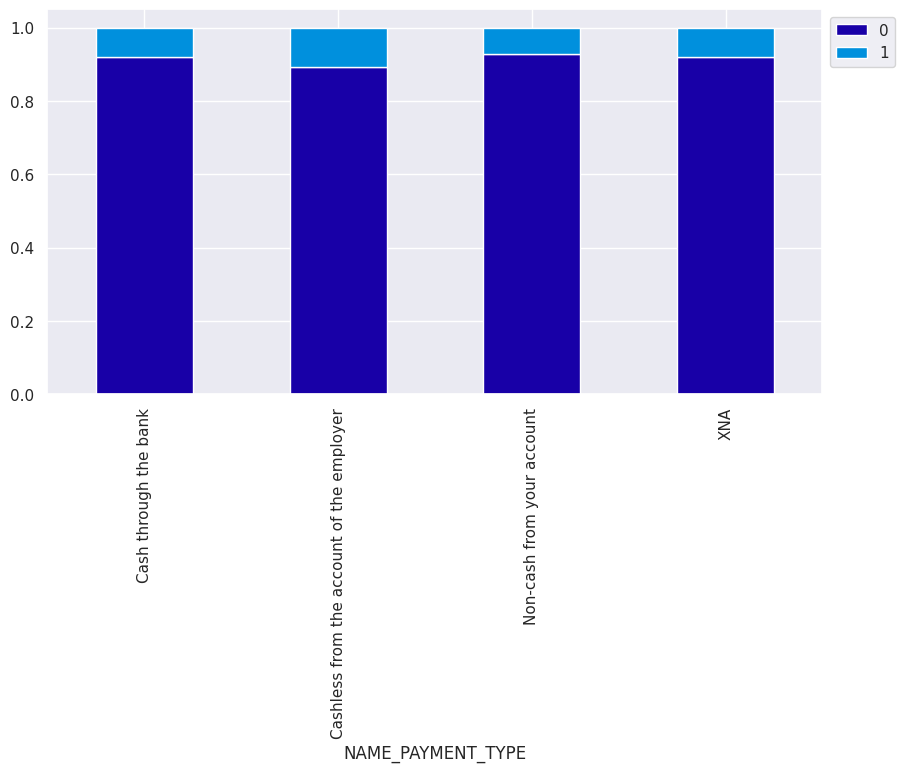

TARGET                 0      1     All
NAME_CLIENT_TYPE                       
New                51936   4555   56491
Refreshed          23327   1996   25323
Repeater          207115  18247  225362
XNA                  308     27     335
All               282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


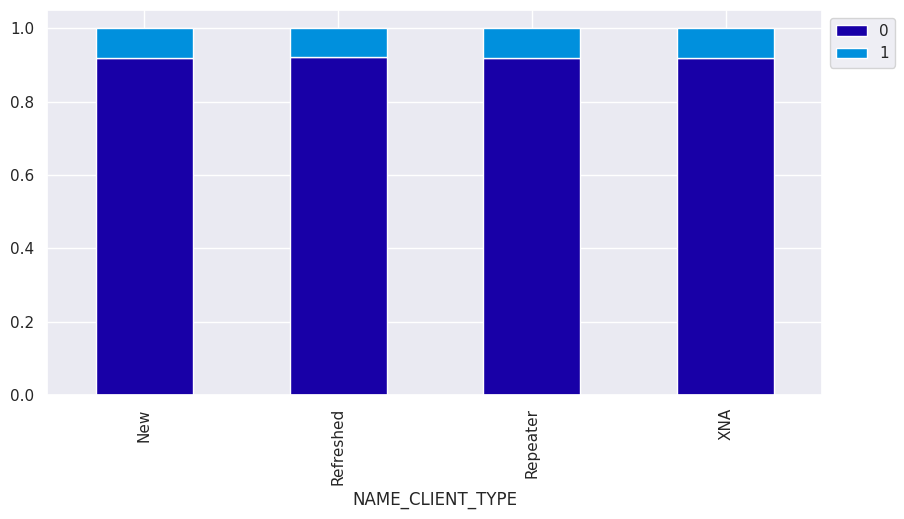

In [ ]:
# Plotting stacked bar plot for TARGET and selected categorical columns
cat_vars = ['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE']

for x in cat_vars:
  stacked_plot(df1_merge2[x])

### Insights

* NAME_CASH_LOAN_PURPOSE: most previous loans were for XAP/XNA and they are more defaulted by those who refuse to name the goal or for hobbies, car repairs.

* NAME_CONTRACT_STATUS: most previous loans were approved and they are more defaulted by those who were refused or canceled.

* NAME_PAYMENT_TYPE: cash through the bank is the most dominant means for loan transactions, whilst cashless from the account of the employer has a slightly bigger propotion of defaulters.

* NAME_CLIENT_TYPE: repeater client types are the largest customers, whilst new borrowers are slightly constituting a bigger propotion of defaults.


---



# **7. Feature Engineering**
This involves replacing outliers, imputing, One-hot encoding, and rescaling data.

In [ ]:
# function to replace the day outliers
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [ ]:
# Replace all the day outliers
df1 = replace_day_outliers(df1)
df2 = replace_day_outliers(df2 )
df3 = replace_day_outliers(df3)
df4 = replace_day_outliers(df4)
df5 = replace_day_outliers(df5 )
df6 = replace_day_outliers(df6 )
df7 = replace_day_outliers(df7 )

In [ ]:
# function to remove columns with null values greater than 60%

def remove_missing_col(df):
   null_val = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
   null_val_col=null_val[null_val[0]>60].index
   data_new  = df[[i for i in df.columns if i not in null_val_col]]
   return data_new

In [ ]:
#Custom imputer for numerical and categorical variables (https://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn)

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

One-hot encoding of categorical variables in the main training dataset (df1).


---



In [ ]:
# one-hot encoding of categorical variables
base_case_train = pd.get_dummies(df1)

Temporarily remove the index variable (SK_ID_CURR) and impute values to replace missing samples, and rescale the features.


---



In [ ]:
# Drop the SK_ID from the training data
skid_temp = df1['SK_ID_CURR']
train = base_case_train.drop(columns = ['SK_ID_CURR'])

# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
base_case_train = pd.DataFrame(data=train, columns=features)

print('Dataset shape: ', base_case_train.shape)

Dataset shape:  (307511, 245)


In [ ]:
# print modified data
base_case_train

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          1.0           0.0          0.207607    0.090287     0.090032   
1          0.0           0.0          0.286846    0.311736     0.132924   
2          0.0           0.0          0.049128    0.022472     0.020025   
3          0.0           0.0          0.128368    0.066837     0.109477   
4          0.0           0.0          0.112520    0.116854     0.078975   
...        ...           ...               ...         ...          ...   
307506     0.0           0.0          0.154781    0.052360     0.101176   
307507     0.0           0.0          0.054411    0.056067     0.040505   
307508     0.0           0.0          0.149498    0.157969     0.110618   
307509     1.0           0.0          0.170629    0.081175     0.072499   
307510     0.0           0.0          0.154781    0.157303     0.185258   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  OWN_CAR_AGE  FLAG_MOBIL  \
0              0.077441                    0.256321     0.098901         1.0   
1              0.271605                    0.045016     0.098901         1.0   
2              0.023569                    0.134897     0.285714         1.0   
3              0.063973                    0.107023     0.098901         1.0   
4              0.117845                    0.392880     0.098901         1.0   
...                 ...                         ...          ...         ...   
307506         0.046016                    0.446855     0.098901         1.0   
307507         0.046016                    0.344429     0.098901         1.0   
307508         0.135802                    0.065247     0.098901         1.0   
307509         0.069585                    0.069553     0.098901         1.0   
307510         0.158249                    0.635991     0.098901         1.0   

        FLAG_EMP_PHONE  ...  HOUSETYPE_MODE_terraced house  \
0                  1.0  ...                            0.0   
1                  1.0  ...                            0.0   
2                  1.0  ...                            0.0   
3                  1.0  ...                            0.0   
4                  1.0  ...                            0.0   
...                ...  ...                            ...   
307506             1.0  ...                            0.0   
307507             0.0  ...                            0.0   
307508             1.0  ...                            0.0   
307509             1.0  ...                            0.0   
307510             1.0  ...                            0.0   

        WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                            0.0                       0.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       0.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                                 0.0                        0.0   
1                                 0.0                        0.0   
2                                 0.0                        0.0   
3                                 0.0                        0.0   
4                                 0.0                        0.0   
...                               ...                        ...   
307506                            0.0                        0.0   
307507                            0.0                        0.0   
307508                            0.0       

Reattach SK_ID_CURR to the dataset


---



In [ ]:
base_case_train['SK_ID_CURR'] = skid_temp

print('Dataset shape: ', base_case_train.shape)

Dataset shape:  (307511, 246)




---


## **Base Case- Logistic Regression**

Before performing advanced feature engineering and connecting other data files, let's run a logistic regression to see how a simple classifier model behaves.

This requires the dataset to be temporarily split into training/test sets.


In [ ]:
# Train-Test split -- temporary
# Logistic regression - basic check

#splitting application_train_newdf into train and test
train,test = train_test_split(base_case_train,test_size=.25,random_state = 123)

#separating dependent and independent variables
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]



---


Create a function for the classifier to train on data, predict using test data, and visualize the metrics and feature importances

In [ ]:
#Model function

def model_base(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    # Extract feature names
    feature_names = list(dtrain_X.columns)
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]

    # Record the feature importances
    feature_importance_values= algorithm.coef_[0]
    feature_importance_values = np.absolute(feature_importance_values)
#     # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    print (algorithm)
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    return feature_importances

### Run the base case - logistic regression model

LogisticRegression()
Accuracy score :  0.9184812300007804
classification report :
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     76746
         1.0       0.01      0.51      0.02       132

    accuracy                           0.92     76878
   macro avg       0.50      0.71      0.49     76878
weighted avg       1.00      0.92      0.96     76878



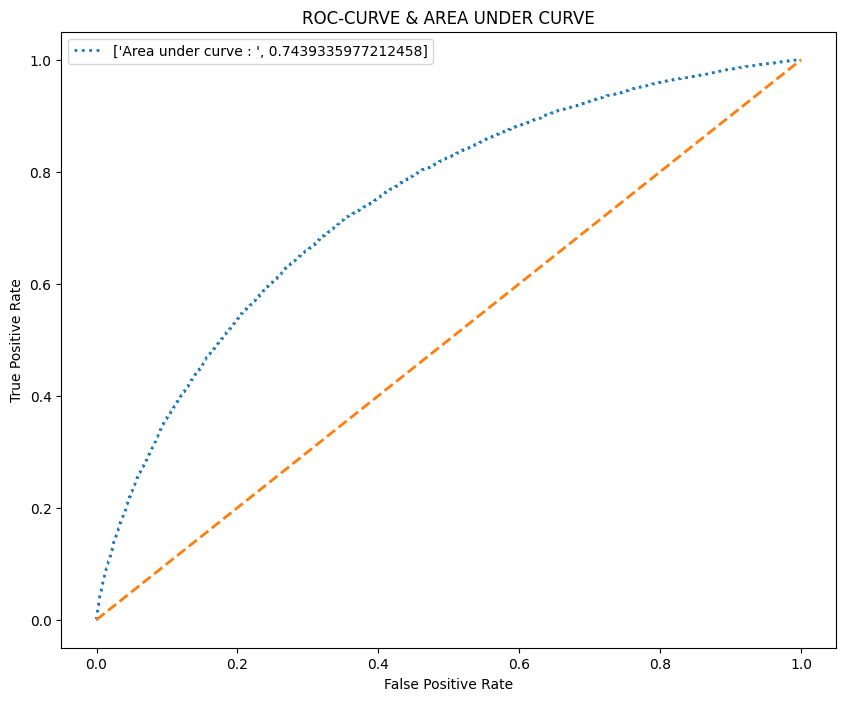

In [ ]:
logit = LogisticRegression()
feature_importances_logit_base = model_base(logit,train_X,train_Y,test_X,test_Y,train_X.columns)

---


The base case - logistic regression model predicts the cases well when loan is repaid (f1-score = 0.96) but does not perform well to predict when loans are defaulted (f1-score = 0.02).

However, since this is an imbalanced dataset, the accuracy score is still high at 0.9184. Hence, it is preferred to use test AUC ROC which does not depend on data imbalance and has a value of 0.7454 for the base case.



---


The Receiver Operating Characteristic Area under curve (ROC AUC) is a metric for which can be suitably applied for imbalanced datasets since it does not generate 0 or 1 predictions, but rather a probability between 0 and 1. It measures the false positive rate (x-axis) vs true positive rate (y-axis). The area under curve (AUC) is the area between a model's ROC curve and the diagonal indicating a model with naive random guessing. If the ROC curve is more to the left/top of the diagonal, is indicates better performance with a higher ROC AUC.



---


After training a base case, we can return to feature engineering.

First we apply our limited domain knowlege to create few more variables, specifically ratios accounting for the credit income %, annuity income %, credit term, and fraction of years employed

In [ ]:
#Calculating metrics for loan field based on banking domain knowledge.

df1['CREDIT_INCOME_PERCENT'] = df1['AMT_CREDIT'] / df1['AMT_INCOME_TOTAL']
df1['ANNUITY_INCOME_PERCENT'] = df1['AMT_ANNUITY'] / df1['AMT_INCOME_TOTAL']
df1['CREDIT_TERM'] = df1['AMT_ANNUITY'] / df1['AMT_CREDIT']
df1['YEARS_EMPLOYED_PERCENT'] = df1['YEARS_EMPLOYED'] / df1['AGE']



---


## **Automated Feature Engineering using Featuretools**

To improve the results over the base case and to fully utilized the different datasets provided, we need to use feature engineering and relational database techniques to connect the various datasets. This will be done using extract, transform, load (ETL) techniques for automated feature engineering using Featuretools

We create a function to identify boolean variables (variables which are recorded as integers (0.0 or 1.0)) in main training data and run it

In [ ]:
# define a function to iterate through the columns and record the Boolean columns

def bool_type(df):

    col_type = {}

    for col in df:
        # If column is a number with only two values, encode it as a Boolean
        if (df[col].dtype != 'object') and (len(df[col].unique()) <= 2):
            col_type[col] = ft.variable_types.Boolean

    print('Number of boolean variables: ', len(col_type))
    return col_type

In [ ]:
train_col_type = bool_type(df1)


Number of boolean variables:  33


Assign ‘Oridinal’ datatype to the columns of ‘app’ data which can have ordered discrete values

In [ ]:
train_col_type['REGION_RATING_CLIENT'] = vtypes.Ordinal
train_col_type['REGION_RATING_CLIENT_W_CITY'] = vtypes.Ordinal
train_col_type['HOUR_APPR_PROCESS_START'] = vtypes.Ordinal



---



Identifying the Boolean variables in the ‘previous_applications’ - df7 dataset.

The steps are similar to those above

In [ ]:
prev_col_type = bool_type(df7)

Number of boolean variables:  1




---


###Connecting the datasets using Featuretools
First create an entity and then add the datasets while connected by a common index (SK_ID_CURR).
For other datasets, indexes are created as necessary

The datasets will be connected together through Featuretools.

We start by creating an entity and then adding the datasets while connected by a common index (SK_ID_CURR).

Indexes will be created for other datasets as necessary.

Defining the “entities”, each of which is one data file or table, and the columns along which they are indexed.

In [ ]:
# Create an entity set
es = ft.EntitySet(id='appls')

Adding tables to this entity set.

We’ll define the datatype of each column (variable) in the table using a dictionary, and pass that to Featuretools’ *entity_from_dataframe* function.

In [ ]:
# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'appl', dataframe = df1, index = 'SK_ID_CURR', variable_types = train_col_type)

es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = df2, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'previous', dataframe = df7, index = 'SK_ID_PREV')

For entities which do not have a unique index, create index too by setting ‘make_index’ to True

In [ ]:
# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_bal', dataframe = df3,
                              make_index = True, index = 'bureaubalance_index')

In [ ]:
# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'cash', dataframe = df6,
                              make_index = True, index = 'cash_index')

In [ ]:
# Split execution on Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'installments', dataframe = df5,
                              make_index = True, index = 'installments_index')

In [ ]:
# Split execution on Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'credit', dataframe = df4,
                              make_index = True, index = 'credit_index')

*EntitySet* is able to track all of the relationships for us. This allows us to work at a higher level of abstraction, thinking about the entire dataset rather than each individual table, greatly increasing our efficiency.

In [ ]:
 #Display the entityset
 es

#Adding Relationships
For each relationship, we need to first specify the parent variable and then the child variable. Altogether, there are a total of 6 relationships between the tables. Below we specify these relationships and then add them to the EntitySet.

In [ ]:
# Relationship between app and bureau
r_appl_bureau = ft.Relationship(es['appl']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau balance
r_bureau_balalance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_bal']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['appl']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

In [ ]:
# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
# Print out the EntitySet
es

#Visualize EntitySet

In [ ]:
es.plot()

#Feature Primitives
A [feature primitive](https://docs.featuretools.com/en/stable/automated_feature_engineering/primitives.html) is an operation applied to a table or a set of tables to create a feature. These represent simple calculations, many of which we already use in manual feature engineering, that can be stacked on top of each other to create complex deep features. Feature primitives fall into two categories:

* Aggregation: function that groups together children for each parent and calculates a statistic such as mean, min, max, or standard deviation across the children. An example is the maximum previous loan amount for each client. An aggregation covers multiple tables using relationships between tables.

* Transformation: an operation applied to one or more columns in a single table. An example would be taking the absolute value of a column, or finding the difference between two columns in one table.
A list of the available features primitives in featuretools can be viewed below.

In [ ]:
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(10)

In [ ]:
primitives[primitives['type'] == 'transform'].head(10)


---
#Deep Feature Synthesis
Deep Feature Synthesis (DFS) is the method Featuretools uses to make new features. DFS stacks feature primitives to form features with a "depth" equal to the number of primitives.


Deep Feature Synthesis is an extremely powerful method that allows us to overcome our human limitations on time and creativity by building features that we would never be able to think of on our own (or would not have the patience to implement). Furthermore, DFS is applicable to any dataset with only very minor changes in syntax. In feature engineering, we generally apply the same functions to multiple datasets, but when we do it by hand, we have to re-write the code because it is problem-specific. Featuretools code can be applied to any dataset because it is written at a higher level of abstraction.


A few default primitives are selected for Deep Feature Synthesis (DFS), which is the process featuretools uses to make new features.

In [ ]:
# Default primitives from featuretools
default_agg_primitives =  ['sum', 'count', 'min', 'max', 'mean', 'mode']
default_trans_primitives =  ['diff', 'cum_sum', 'cum_mean', 'percentile']

# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'appl',
                       trans_primitives = default_trans_primitives,
                       agg_primitives=default_agg_primitives,
                       max_depth = 2, features_only=True)

print('%d Total Features' % len(feature_names))

In [ ]:
# DFS with default primitives

feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'appl',
                                       trans_primitives = default_trans_primitives,
                                       agg_primitives=default_agg_primitives,
                                        max_depth = 2, features_only=False, verbose = True)

pd.options.display.max_columns = 1500
feature_matrix.head(10)

There are a number of different features created, including a number of categorical ones. Moreover, many features have high missing values and other may have a high degree of correlations with each other. Such issues need to be accounted for before training models.

In [ ]:
#We can look at some of the feature names:

feature_names[1000:1020]

## Manual feature engineering

First, we remove the features having more than 60% missing values from the newly constructed dataset

In [ ]:
#Removing columns with missing values more than 60% in new df

feature_matrix = remove_missing_col(feature_matrix)

Then, we separate the reponse feature (TARGET) temporarily before conducting other operations

In [ ]:
#Separate TARGET feature temporarily
target_temp = feature_matrix['TARGET']
feature_matrix = feature_matrix.drop(columns = ['TARGET'])

In [ ]:
The categorical variables are one-hot encoded

# one-hot encoding of categorical variables
feature_matrix = pd.get_dummies(feature_matrix)

The features with low information (only 1 unique value) are removed

In [ ]:
# Remove features with only one unique value
feature_matrix2 = selection.remove_low_information_features(feature_matrix)

print('Removed %d features' % (feature_matrix.shape[1]- feature_matrix2.shape[1]))

In [ ]:
# one-hot encoding has increased the columns even if the other operations reduced them.

feature_matrix2.head()

#Accounting for corelated features
Due to numerous features created (3000+), it is important to account for correlated features which do not add unique information but contribute to the curse of dimensionality.

We can create a correlation matrix to find the correlated features and remove one feature from each correlation pair which is larger than a given threshold (0.8).

In [ ]:
feature_matrix=feature_matrix2.copy()

In [ ]:
# Threshold for removing correlated variables (without TARGET)
threshold = 0.8

# Calculate absolute value correlation matrix
corr_matrix = feature_matrix.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d features to remove.' % (len(collinear_features)))

In [ ]:
#Remove collinear features
feature_matrix = feature_matrix[[col for col in feature_matrix.columns if col not in collinear_features]]

Thus, 1923 correlated features are removed from the dataset and the response feature (TARGET) is reattached.

In [ ]:
feature_matrix['TARGET'] = target_temp

The table below shows the dataset at this stage, and we can see that there are still a number of NaN values and features that require scaling.

In [ ]:
feature_matrix.head()

Hence, imputation of missing values is done, followed by scaling to make the dataset ready for modeling.

In [ ]:
# Feature names
features = list(feature_matrix.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(feature_matrix)
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(feature_matrix.median(), inplace=True)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
feature_matrix = pd.DataFrame(data=train, columns=features)

The dataset is finally ready for training. However, before that we can save it as a checkpoint or load it from this checkpoint

In [ ]:
#save dataset

feature_matrix.to_csv('feature_matrix.csv')

#load dataset

#feature_matrix= pd.read_csv("feature_matrix.csv")


---

# **Classifier Models: Training, Prediction and Comparison**

Now that we’ve generated features using Featuretools, we can use those generated features in a predictive model. We start by performing feature encoding on our generated features. Then, we have to split our features back into training and test datasets, and remove the indicator columns.

##Data split and imbalance correction

First, we split the data into training/testing set in the ratio 75:25

In [ ]:
#splitting application_train_newdf into train and test
train,test = train_test_split(feature_matrix,test_size=.25,random_state = 123)

#separating dependent and independent variables (no under/over sampling)
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

The dataset is imbalanced in the favor of non defaulters (loans repaid with TARGET=1) in a ratio more than 10:1.

We can resample the data, by undersampling the majority class to make the data more balanced. So that we do not lose too much valuable data, the number of majority class samples is kept as twice the number of minority class.

In [ ]:
# Down-sample Majority Class

count = train['TARGET'].value_counts()
num_majority = count[0]
num_minority = count[1]

#Number of undersampled majority class 2 x minority class
num_undersample_majority = 2 * num_minority

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_undersample_majority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_undersampled_Y = df_undersampled[["TARGET"]]

##Making Predictions
We can now run predictive models on the generated features to predict how likely applicants are to default on their loans.

First, we create a function for the classifier to train on data, predict using test data, and visualize the metrics

In [ ]:
#Model function

def model_run(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]

    accuracy = accuracy_score(dtest_Y,predictions)
    classify_metrics = classification_report(dtest_Y,predictions)
    f1=f1_score(dtest_Y,predictions)

    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    auc_score = auc(fpr,tpr)

    print (algorithm)
    print ("Accuracy score : ", accuracy)
    print ("F1 score : ", f1)
    print ("AUC : ", auc_score)
    print ("classification report :\n", classify_metrics)

    return accuracy, classify_metrics, fpr , tpr, auc_score, f1

### **Model 1: Logistic Regression**

In [ ]:
# apply Logistic Regression

logit = LogisticRegression()
accuracy_logit, classify_metrics_logit, fpr_logit , tpr_logit, auc_score_logit, f1_logit = model_run(logit,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

###**Model 2: Random Forest Classifier**

In [ ]:
# apply Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
accuracy_rfc, classify_metrics_rfc, fpr_rfc , tpr_rfc, auc_score_rfc, f1_rfc = model_run(rfc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

###**Model 3: Decision Tree Classifier**

In [ ]:
# apply Decision Tree Classifier

dtc = DecisionTreeClassifier()
accuracy_dtc, classify_metrics_dtc, fpr_dtc , tpr_dtc, auc_score_dtc, f1_dtc = model_run(dtc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)
De

###**Model 4: Gaussian Naive Bayes Classifier**

In [ ]:
# apply Gaussian Naive Bayes Classifier

gnb = GaussianNB()
accuracy_gnb, classify_metrics_gnb, fpr_gnb , tpr_gnb, auc_score_gnb, f1_gnb = model_run(gnb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)
Ga

###**Model 5: XGBoost Classifier**

In [ ]:
# apply XGBoost Classifier

xgb = XGBClassifier()
accuracy_xgb, classify_metrics_xgb, fpr_xgb, tpr_xgb, auc_score_xgb, f1_xgb = model_run(xgb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)
XG

###**Model 6: Gradient Boosting Classifier**

In [ ]:
# apply Gradient Boosting Classifier

gbc = GradientBoostingClassifier()
accuracy_gbc, classify_metrics_gbc, fpr_gbc, tpr_gbc, auc_score_gbc, f1_gbc = model_run(gbc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)
Gr

###**Model 7: LightGBM Classifier**

In [ ]:
# apply Model 7: LightGBM Classifier

model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary',
                                   class_weight = 'balanced', learning_rate = 0.05,
                                   reg_alpha = 0.1, reg_lambda = 0.1,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

#Split into training and evaluation sets
x_train, x_eval, y_train, y_eval = train_test_split(df_undersampled_X, df_undersampled_Y, test_size=0.2, random_state=42)

#Remove possible JSON characters
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_eval = x_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_eval = y_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Train the model
model.fit(x_train, y_train, eval_set = [(x_eval, y_eval)], eval_names =['valid'], eval_metric ='auc', early_stopping_rounds=200);

# prediction
predictions = model.predict(test_X);
prediction_probabilities = model.predict_proba(test_X)[:,1];

# metrics
accuracy_lgbc = accuracy_score(test_Y,predictions)
classify_metrics_lgbc = classification_report(test_Y,predictions)
fpr_lgbc , tpr_lgbc , thresholds   = roc_curve(test_Y,prediction_probabilities)
auc_score_lgbc = auc(fpr_lgbc,tpr_lgbc)
f1_lgbc=f1_score(test_Y,predictions)
[1]	valid's auc: 0

In [ ]:
print ("Accuracy score : ", accuracy_lgbc)
print ("F1 score : ", f1_lgbc)
print ("AUC : ", auc_score_lgbc)
print ("classification report :\n", classify_metrics_lgbc)

## **Classifier model comparison**

After training the different classifier models, we can compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC with functions given below.

In [ ]:
# Combine results together and compare stats for all

classifier_names =['Logistic Regression','Random Forest','Decision Tree','Gaussian Naive Bayes','XGBoost','Gradient Boosting','LightGBM']
accuracy_scores = [accuracy_logit, accuracy_rfc, accuracy_dtc, accuracy_gnb, accuracy_xgb, accuracy_gbc, accuracy_lgbc]
f1_scores = [f1_logit, f1_rfc, f1_dtc, f1_gnb, f1_xgb, f1_gbc, f1_lgbc]
auc_scores = [auc_score_logit, auc_score_rfc, auc_score_dtc, auc_score_gnb, auc_score_xgb, auc_score_gbc, auc_score_lgbc]

In [ ]:
sns.set_color_codes("colorblind")

plt.figure(figsize=(15,18))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, ROC AUC')
s1 = sns.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x = classifier_names, y=f1_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = classifier_names, y=auc_scores)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

We can see from the comparisons of accuracy, F1 score and AUC ROC scores that all models have different rankings. The Logistic Regression and Gaussian Naive Bayes models have highest accuracy, but the lowest F1 scores. This shows that they do not work well for imbalanced data. The XGBoost, Gradient Boosting and LightGBM classifiers give good F1 and AUC ROC results. The AUC ROC scores can be better visualized using the ROC curves.

In [ ]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)

ax.plot(fpr_logit,tpr_logit,label = [classifier_names[0], "AUC ROC :", round(auc_score_logit,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(auc_score_rfc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dtc,tpr_dtc,label = [classifier_names[2], "AUC ROC :", round(auc_score_dtc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gnb,tpr_gnb,label = [classifier_names[3], "AUC ROC :", round(auc_score_gnb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_xgb,tpr_xgb,label = [classifier_names[4], "AUC ROC :", round(auc_score_xgb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gbc,tpr_gbc,label = [classifier_names[5], "AUC ROC :", round(auc_score_gbc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_lgbc,tpr_lgbc,label = [classifier_names[6], "AUC ROC :", round(auc_score_lgbc,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

The AUC ROC scores improve as the curves rise higher above the diagonal. Since, the LightGBM classifier has the best score for AUC ROC (0.781), we can choose it while moving forward.